In [1]:
!pip install av
!pip install mtcnn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39.7/39.7 MB 44.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 24.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 50.6 MB/s eta 0:00:00


In [2]:
# Cell 1: ÂØºÂÖ•Â∫ìÂíåÁéØÂ¢ÉËÆæÁΩÆ

# ÊäëÂà∂CUDAÂíåTensorFlowË≠¶Âëä‰ø°ÊÅØ
import os
import warnings

# ËÆæÁΩÆÁéØÂ¢ÉÂèòÈáè - ÂøÖÈ°ªÂú®ÂØºÂÖ•TensorFlow‰πãÂâçËÆæÁΩÆ
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # ÊäëÂà∂ÊâÄÊúâTensorFlowÊó•Âøó (0=ÂÖ®ÈÉ®, 1=INFO, 2=WARNING, 3=ERROR)
os.environ['CUDA_LAUNCH_BLOCKING'] = '0'  # ÂºÇÊ≠•CUDAÊâßË°å
os.environ['PYTHONWARNINGS'] = 'ignore'   # ÊäëÂà∂PythonË≠¶Âëä

# ÊäëÂà∂CUDAÁõ∏ÂÖ≥Ë≠¶Âëä
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Á¶ÅÁî®oneDNN‰ºòÂåñË≠¶Âëä
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'  # GPUÂÜÖÂ≠òÂä®ÊÄÅÂ¢ûÈïø
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'  # ÊòéÁ°ÆÊåáÂÆöÂèØËßÅÁöÑGPUËÆæÂ§á

# ÊäëÂà∂cuDNN/cuFFT/cuBLASÈáçÂ§çÊ≥®ÂÜåË≠¶Âëä
os.environ['TF_DISABLE_SEGMENT_REDUCTION_OP_DETERMINISM_EXCEPTIONS'] = '1'

# ÊäëÂà∂ÊâÄÊúâË≠¶Âëä
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# ‰øÆÂ§çCUDAÂ§öËøõÁ®ãÈóÆÈ¢ò
import multiprocessing as mp
try:
    mp.set_start_method('spawn', force=True)
except RuntimeError:
    pass  # Â¶ÇÊûúÂ∑≤ÁªèËÆæÁΩÆËøáÔºåÂøΩÁï•ÈîôËØØ

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
import warnings
import gc
import json
import time
import sys
from pathlib import Path
from datetime import datetime
from PIL import Image
warnings.filterwarnings('ignore')

# PyTorchÁõ∏ÂÖ≥
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import transforms
import torchvision.transforms.functional as TF
import torchvision.models as models
from torchvision.io import read_video
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, ReduceLROnPlateau
from torch.cuda.amp import GradScaler, autocast

# ÂàùÂßãÂåñCUDAÂπ∂ÊäëÂà∂Ë≠¶Âëä
if torch.cuda.is_available():
    # ÂàùÂßãÂåñCUDA‰∏ä‰∏ãÊñá‰ª•ÈÅøÂÖçÂêéÁª≠Ë≠¶Âëä
    torch.cuda.init()
    # ËÆæÁΩÆCUDAËÆæÂ§á
    torch.cuda.set_device(0)
    # Ê∏ÖÁêÜCUDAÁºìÂ≠ò
    torch.cuda.empty_cache()
    print(f"üöÄ CUDAÂ∑≤ÂàùÂßãÂåñÔºåÊ£ÄÊµãÂà∞ {torch.cuda.device_count()} ‰∏™GPUËÆæÂ§á")
    for i in range(torch.cuda.device_count()):
        gpu_name = torch.cuda.get_device_name(i)
        gpu_memory = torch.cuda.get_device_properties(i).total_memory / 1024**3
        print(f"   - GPU {i}: {gpu_name} ({gpu_memory:.1f} GB)")
else:
    print("‚ö†Ô∏è CUDA‰∏çÂèØÁî®ÔºåÂ∞Ü‰ΩøÁî®CPUÊ®°Âºè")

# Êú∫Âô®Â≠¶‰π†ÊåáÊ†á
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, balanced_accuracy_score
)
from sklearn.model_selection import train_test_split

# Á≥ªÁªüÁõëÊéßÂíåÊÄßËÉΩÂàÜÊûê
import psutil
import traceback

# È´òÁ≤æÂ∫¶‰∫∫ËÑ∏Ê£ÄÊµã - MTCNN
try:
    # Âú®ÂØºÂÖ•MTCNN‰πãÂâçËøõ‰∏ÄÊ≠•ÊäëÂà∂TensorFlowË≠¶Âëä
    import logging
    logging.getLogger('tensorflow').setLevel(logging.ERROR)
    
    # ÊäëÂà∂abslÊó•Âøó
    try:
        import absl.logging
        absl.logging.set_verbosity(absl.logging.ERROR)
    except ImportError:
        pass
    
    from mtcnn import MTCNN
    MTCNN_AVAILABLE = True
    print("‚úÖ MTCNNÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ´òÁ≤æÂ∫¶‰∫∫ËÑ∏Ê£ÄÊµã")
    print("   - ‰∫∫ËÑ∏Ê£ÄÊµãÁ≤æÂ∫¶: È´ò")
    print("   - Ê£ÄÊµãÁΩÆ‰ø°Â∫¶ÈòàÂÄº: 0.9")
    print("   - APIÁâàÊú¨: Êñ∞ÁâàÊú¨ (v1.0.0+)")
    print("   - TensorFlowË≠¶ÂëäÂ∑≤ÊäëÂà∂")
except ImportError:
    MTCNN_AVAILABLE = False
    print("‚ö†Ô∏è MTCNNÊú™ÂÆâË£ÖÔºåÂ∞Ü‰ΩøÁî®OpenCV‰∫∫ËÑ∏Ê£ÄÊµã")
    print("   - ‰∫∫ËÑ∏Ê£ÄÊµãÁ≤æÂ∫¶: ‰∏≠Á≠â")
    print("   - Âª∫ËÆÆÂÆâË£ÖMTCNN‰ª•Ëé∑ÂæóÊõ¥È´òÁ≤æÂ∫¶:")
    print("   - ÂÆâË£ÖÂëΩ‰ª§: !pip install mtcnn")
    print("   - ÊàñËÄÖ: !pip install mtcnn[tensorflow]")
    print("   - Ê≥®ÊÑè: ÈúÄË¶ÅTensorFlow >= 2.12")
    print("   - ÂΩ±Âìç: ‰∫∫ËÑ∏Ê£ÄÊµãÁ≤æÂ∫¶Áï•ÊúâÈôç‰ΩéÔºå‰ΩÜ‰∏çÂΩ±ÂìçÊï¥‰ΩìËÆ≠ÁªÉ")

# ËßÜÈ¢ëÂ§ÑÁêÜ (PyAV)
try:
    import av
    PYAV_AVAILABLE = True
    print("‚úÖ PyAVÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅGPUËßÜÈ¢ëÂ§ÑÁêÜ")
except ImportError:
    PYAV_AVAILABLE = False
    print("‚ö†Ô∏è PyAVÊú™ÂÆâË£ÖÔºåËßÜÈ¢ëÂ§ÑÁêÜÂ∞ÜÂõûÈÄÄÂà∞CPUÊ®°Âºè")

# Êï∞ÊçÆÂ¢ûÂº∫
try:
    import albumentations as A
    from albumentations.pytorch import ToTensorV2
    ALBUMENTATIONS_AVAILABLE = True
except ImportError:
    ALBUMENTATIONS_AVAILABLE = False
    print("Ë≠¶Âëä: albumentationsÊú™ÂÆâË£ÖÔºåÂ∞Ü‰ΩøÁî®Âü∫Á°ÄÊï∞ÊçÆÂ¢ûÂº∫")

# È¢ëÂüüÂàÜÊûêÊîØÊåÅ
try:
    from scipy import fftpack
    from scipy.signal import butter, filtfilt
    SCIPY_AVAILABLE = True
    print("‚úÖ SciPyÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ¢ëÂüüÂàÜÊûê")
except ImportError:
    SCIPY_AVAILABLE = False
    print("‚ö†Ô∏è SciPyÊú™ÂÆâË£ÖÔºåÈ¢ëÂüüÂàÜÊûêÂäüËÉΩÂèóÈôê")

print("‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê")

üöÄ CUDAÂ∑≤ÂàùÂßãÂåñÔºåÊ£ÄÊµãÂà∞ 2 ‰∏™GPUËÆæÂ§á
   - GPU 0: Tesla T4 (14.7 GB)
   - GPU 1: Tesla T4 (14.7 GB)


E0000 00:00:1753784901.012661      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753784901.121581      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


‚úÖ MTCNNÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ´òÁ≤æÂ∫¶‰∫∫ËÑ∏Ê£ÄÊµã
   - ‰∫∫ËÑ∏Ê£ÄÊµãÁ≤æÂ∫¶: È´ò
   - Ê£ÄÊµãÁΩÆ‰ø°Â∫¶ÈòàÂÄº: 0.9
   - APIÁâàÊú¨: Êñ∞ÁâàÊú¨ (v1.0.0+)
   - TensorFlowË≠¶ÂëäÂ∑≤ÊäëÂà∂
‚úÖ PyAVÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅGPUËßÜÈ¢ëÂ§ÑÁêÜ
‚úÖ SciPyÂ∑≤ÂÆâË£ÖÔºåÊîØÊåÅÈ¢ëÂüüÂàÜÊûê
‚úÖ ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê


In [3]:
# Cell 2: ÂÖ®Â±ÄÈÖçÁΩÆÂíåÂ∑•ÂÖ∑ÂáΩÊï∞ - Kaggle T4 ‰ºòÂåñÁâàÊú¨

def set_seed(seed=42):
    """ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÂèØÈáçÂ§çÊÄß"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    # KaggleÁéØÂ¢É‰ºòÂåñÔºöÂπ≥Ë°°ÊÄßËÉΩÂíåÂèØÈáçÂ§çÊÄß
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True

set_seed(42)

# Kaggle T4 GPUÈÖçÁΩÆ
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"‰ΩøÁî®ËÆæÂ§á: {device}")

if torch.cuda.is_available():
    gpu_count = torch.cuda.device_count()
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    
    print(f"üéÆ GPUÊï∞Èáè: {gpu_count}")
    print(f"üéÆ GPUÂûãÂè∑: {gpu_name}")
    print(f"üíæ ÂçïGPUÂÜÖÂ≠ò: {gpu_memory:.1f} GB")
    print(f"üíæ ÊÄªGPUÂÜÖÂ≠ò: {gpu_memory * gpu_count:.1f} GB")
    
    # Â§öGPUÈÖçÁΩÆ
    USE_MULTI_GPU = gpu_count > 1
    if USE_MULTI_GPU:
        print(f"‚úÖ Ê£ÄÊµãÂà∞ {gpu_count} ‰∏™GPUÔºåÂêØÁî®Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉ")
        # ÂèåT4 GPU‰ºòÂåñÈÖçÁΩÆ
        torch.cuda.set_per_process_memory_fraction(0.8)  # ÂèåT4ÂèØ‰ª•‰ΩøÁî®Êõ¥Â§öÂÜÖÂ≠ò
    else:
        print("üìù ÂçïGPUÊ®°Âºè")
        torch.cuda.set_per_process_memory_fraction(0.7)  # ÂçïGPU‰øùÂÆàÈÖçÁΩÆ
    
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    
    print("‚úÖ Kaggle T4 GPU‰ºòÂåñÈÖçÁΩÆÂ∑≤ÂêØÁî®")
else:
    USE_MULTI_GPU = False

# ÂàõÂª∫ÂøÖË¶ÅÁöÑÁõÆÂΩï
for dir_name in ['./data', './models', './logs', './results']:
    os.makedirs(dir_name, exist_ok=True)

# KaggleÁéØÂ¢ÉÊ£ÄÊµã
IS_KAGGLE = os.path.exists('/kaggle')
BASE_DATA_DIR = '/kaggle/input/ff-c23/FaceForensics++_C23' if IS_KAGGLE else './dataset/FaceForensics++_C23'

# Áªü‰∏ÄÊï∞ÊçÆÁ±ªÂûãÈÖçÁΩÆ - ÂÖ®ÈÉ®‰ΩøÁî®FP32ÊèêÂçáÂÖºÂÆπÊÄß
USE_FP32_ONLY = True  # Âº∫Âà∂‰ΩøÁî®FP32ÔºåÁ°Æ‰øùÊúÄ‰Ω≥ÂÖºÂÆπÊÄß
print(f"Êï∞ÊçÆÁ±ªÂûãÁ≠ñÁï•: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)")

print(f"ÁéØÂ¢É: {'Kaggle' if IS_KAGGLE else 'Êú¨Âú∞'}")
print(f"Êï∞ÊçÆÂü∫Á°ÄË∑ØÂæÑ: {BASE_DATA_DIR}")
print("‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê")

‰ΩøÁî®ËÆæÂ§á: cuda
üéÆ GPUÊï∞Èáè: 2
üéÆ GPUÂûãÂè∑: Tesla T4
üíæ ÂçïGPUÂÜÖÂ≠ò: 14.7 GB
üíæ ÊÄªGPUÂÜÖÂ≠ò: 29.5 GB
‚úÖ Ê£ÄÊµãÂà∞ 2 ‰∏™GPUÔºåÂêØÁî®Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉ
‚úÖ Kaggle T4 GPU‰ºòÂåñÈÖçÁΩÆÂ∑≤ÂêØÁî®
Êï∞ÊçÆÁ±ªÂûãÁ≠ñÁï•: FP32 (ÂÖºÂÆπÊÄß‰ºòÂÖà)
ÁéØÂ¢É: Kaggle
Êï∞ÊçÆÂü∫Á°ÄË∑ØÂæÑ: /kaggle/input/ff-c23/FaceForensics++_C23
‚úÖ ÁéØÂ¢ÉËÆæÁΩÆÂÆåÊàê


In [4]:
# Cell 3: Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞
def extract_frames_gpu_accelerated(video_path, max_frames=16, target_size=(224, 224),
                                  quality_threshold=20, use_gpu=True, use_mtcnn=True):
    """GPUÂä†ÈÄüÁöÑÂ∏ßÊèêÂèñÂáΩÊï∞ - ÈõÜÊàêMTCNN‰∫∫ËÑ∏Ê£ÄÊµã"""
    try:
        # Ê£ÄÊü•PyAVÊòØÂê¶ÂèØÁî®
        if not globals().get('PYAV_AVAILABLE', False):
            print(f"PyAV‰∏çÂèØÁî®Ôºå‰ΩøÁî®CPUÂõûÈÄÄÂ§ÑÁêÜ: {video_path}")
            return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)
            
        # ËÆæÂ§áÈÄâÊã© - ‰ºòÂÖà‰ΩøÁî®GPU
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # ‰ΩøÁî®torchvisionÁöÑGPUÂä†ÈÄüËßÜÈ¢ëËØªÂèñ
        if not use_gpu:
            device = torch.device('cpu')
            
        # ËØªÂèñËßÜÈ¢ëÔºàtorchvisionËá™Âä®Â§ÑÁêÜËß£Á†ÅÔºâ
        try:
            video_tensor, audio, info = read_video(video_path, pts_unit='sec')
            # video_tensor shape: (T, H, W, C)
        except Exception as e:
            print(f"GPUËßÜÈ¢ëËØªÂèñÂ§±Ë¥•ÔºåÂõûÈÄÄÂà∞CPU: {e}")
            return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)
        
        if video_tensor.size(0) == 0:
            return []
            
        # ÁßªÂä®Âà∞GPUËøõË°åÂ§ÑÁêÜ
        video_tensor = video_tensor.to(device, non_blocking=True)
        total_frames = video_tensor.size(0)
        
        # Êô∫ËÉΩÂ∏ßÈááÊ†∑Á≠ñÁï•
        if total_frames <= max_frames:
            frame_indices = torch.arange(0, total_frames, device=device)
        else:
            # ÂùáÂåÄÈááÊ†∑
            step = total_frames / max_frames
            frame_indices = torch.arange(0, total_frames, step, device=device).long()[:max_frames]
        
        # ÊâπÈáèÊèêÂèñÂ∏ß
        selected_frames = video_tensor[frame_indices]  # (max_frames, H, W, C)
        
        # GPU‰∏äËøõË°åË¥®ÈáèÊ£ÄÊµãÔºà‰ΩøÁî®SobelÁÆóÂ≠ê‰ª£ÊõøLaplacianÔºâ
        if quality_threshold > 0:
            # ËΩ¨Êç¢‰∏∫ÁÅ∞Â∫¶ÂõæËøõË°åË¥®ÈáèÊ£ÄÊµãÔºàÂÖàËΩ¨Êç¢‰∏∫floatÁ±ªÂûãÔºâ
            gray_frames = selected_frames.float().mean(dim=-1, keepdim=True)  # (T, H, W, 1)
            gray_frames = gray_frames.permute(0, 3, 1, 2)  # (T, 1, H, W)
            
            # ‰ΩøÁî®SobelÁÆóÂ≠êËÆ°ÁÆóÂõæÂÉèË¥®Èáè
            sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], 
                                 dtype=torch.float32, device=device).view(1, 1, 3, 3)
            sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], 
                                 dtype=torch.float32, device=device).view(1, 1, 3, 3)
            
            grad_x = F.conv2d(gray_frames, sobel_x, padding=1)
            grad_y = F.conv2d(gray_frames, sobel_y, padding=1)
            quality_scores = (grad_x.pow(2) + grad_y.pow(2)).mean(dim=[1, 2, 3])
            
            # ËøáÊª§‰ΩéË¥®ÈáèÂ∏ß
            quality_mask = quality_scores > quality_threshold
            if quality_mask.sum() > 0:
                selected_frames = selected_frames[quality_mask]
            
        # GPU‰∏äËøõË°åÂ∞∫ÂØ∏Ë∞ÉÊï¥
        selected_frames = selected_frames.permute(0, 3, 1, 2).float()  # (T, C, H, W)
        if selected_frames.size(-1) != target_size[0] or selected_frames.size(-2) != target_size[1]:
            selected_frames = F.interpolate(selected_frames, size=target_size, 
                                          mode='bilinear', align_corners=False)
        
        # Á°Æ‰øùÂ∏ßÊï∞Ë∂≥Â§ü
        current_frames = selected_frames.size(0)
        if current_frames < max_frames:
            # ÈáçÂ§çÊúÄÂêé‰∏ÄÂ∏ß
            if current_frames > 0:
                last_frame = selected_frames[-1:].repeat(max_frames - current_frames, 1, 1, 1)
                selected_frames = torch.cat([selected_frames, last_frame], dim=0)
            else:
                # ÂàõÂª∫ÈªëËâ≤Â∏ß
                selected_frames = torch.zeros(max_frames, 3, target_size[0], target_size[1], 
                                            device=device, dtype=torch.float32)
        
        # ÈôêÂà∂Âà∞ÊúÄÂ§ßÂ∏ßÊï∞
        selected_frames = selected_frames[:max_frames]
        
        # ËΩ¨Êç¢ÂõûCPU numpyÊ†ºÂºèÔºà‰∏∫‰∫ÜÂÖºÂÆπÁé∞Êúâ‰ª£Á†ÅÔºâ
        frames_cpu = selected_frames.permute(0, 2, 3, 1).cpu().numpy().astype(np.uint8)
        frames_list = [frame for frame in frames_cpu]
        
        # Â∫îÁî®MTCNN‰∫∫ËÑ∏Ê£ÄÊµãÂíåË£ÅÂâ™
        if use_mtcnn and globals().get('MTCNN_AVAILABLE', False):
            frames_list = apply_mtcnn_face_detection(frames_list, target_size)
        
        return frames_list
        
    except Exception as e:
        print(f"GPUÂ∏ßÊèêÂèñÂ§±Ë¥•ÔºåÂõûÈÄÄÂà∞CPU: {e}")
        return extract_frames_cpu_fallback(video_path, max_frames, target_size, quality_threshold, use_mtcnn)

def apply_mtcnn_face_detection(frames, target_size=(224, 224)):
    """‰ΩøÁî®MTCNNËøõË°å‰∫∫ËÑ∏Ê£ÄÊµãÂíåË£ÅÂâ™ - ÂÖºÂÆπÊñ∞ÁâàÊú¨API"""
    try:
        # Êñ∞ÁâàÊú¨MTCNNÊûÑÈÄ†ÂáΩÊï∞‰∏çÈúÄË¶ÅÂèÇÊï∞
        detector = MTCNN()
        processed_frames = []
        
        for frame in frames:
            # MTCNNÈúÄË¶ÅRGBÊ†ºÂºè
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) if len(frame.shape) == 3 else frame
            
            # Ê£ÄÊµã‰∫∫ËÑ∏ - Êñ∞ÁâàÊú¨APIÂú®detect_facesÊñπÊ≥ï‰∏≠‰º†ÈÄíÂèÇÊï∞
            results = detector.detect_faces(
                frame_rgb,
                min_face_size=40,  # ÊúÄÂ∞è‰∫∫ËÑ∏Â∞∫ÂØ∏
                threshold_pnet=0.6,  # PNetÈòàÂÄº
                threshold_rnet=0.7,  # RNetÈòàÂÄº  
                threshold_onet=0.8   # ONetÈòàÂÄº
            )
            
            if results and len(results) > 0:
                # ÈÄâÊã©ÁΩÆ‰ø°Â∫¶ÊúÄÈ´òÁöÑ‰∫∫ËÑ∏
                best_face = max(results, key=lambda x: x['confidence'])
                
                if best_face['confidence'] > 0.9:  # È´òÁΩÆ‰ø°Â∫¶ÈòàÂÄº
                    # ÊèêÂèñ‰∫∫ËÑ∏Âå∫Âüü
                    x, y, w, h = best_face['box']
                    
                    # Êâ©Â±ïËæπÁïåÊ°Ü‰ª•ÂåÖÂê´Êõ¥Â§ö‰∏ä‰∏ãÊñá
                    margin = 0.2
                    x_margin = int(w * margin)
                    y_margin = int(h * margin)
                    
                    x1 = max(0, x - x_margin)
                    y1 = max(0, y - y_margin)
                    x2 = min(frame_rgb.shape[1], x + w + x_margin)
                    y2 = min(frame_rgb.shape[0], y + h + y_margin)
                    
                    # Ë£ÅÂâ™‰∫∫ËÑ∏
                    face_crop = frame_rgb[y1:y2, x1:x2]
                    
                    # ‰ΩøÁî®Áªü‰∏ÄÁöÑÂ∏ßÂ§ÑÁêÜÂáΩÊï∞
                    processed_frame = resize_and_validate_frame(face_crop, target_size, 0)  # MTCNN‰∏çÈúÄË¶ÅÈ¢ùÂ§ñË¥®ÈáèÊ£ÄÊü•
                    if processed_frame is None:
                        processed_frames.append(cv2.resize(face_crop, target_size))  # Â¶ÇÊûúÂ§ÑÁêÜÂ§±Ë¥•ÔºåËøîÂõûÂéüÂ∏ß
                    else:
                        processed_frames.append(processed_frame)
                else:
                    # ÁΩÆ‰ø°Â∫¶‰∏çÂ§üÔºå‰ΩøÁî®ÂéüÂßãÂ∏ß
                    processed_frames.append(cv2.resize(frame_rgb, target_size))
            else:
                # Ê≤°ÊúâÊ£ÄÊµãÂà∞‰∫∫ËÑ∏Ôºå‰ΩøÁî®ÂéüÂßãÂ∏ß
                processed_frames.append(cv2.resize(frame_rgb, target_size))
        
        return processed_frames
        
    except Exception as e:
        print(f"MTCNN‰∫∫ËÑ∏Ê£ÄÊµãÂ§±Ë¥•Ôºå‰ΩøÁî®ÂéüÂßãÂ∏ß: {e}")
        return [cv2.resize(frame, target_size) for frame in frames]

def resize_and_validate_frame(frame, target_size, quality_threshold=20):
    """Áªü‰∏ÄÁöÑÂ∏ßÂ§ÑÁêÜÂáΩÊï∞ÔºöË∞ÉÊï¥Â§ßÂ∞èÂπ∂È™åËØÅË¥®Èáè"""
    if frame is None:
        return None
    
    # Ë∞ÉÊï¥Â∞∫ÂØ∏
    resized_frame = cv2.resize(frame, target_size)
    
    # Ë¥®ÈáèÊ£ÄÊü•
    if quality_threshold > 0:
        # ËÆ°ÁÆóÂõæÂÉèÁöÑÊñπÂ∑Æ‰Ωú‰∏∫Ë¥®ÈáèÊåáÊ†á
        gray = cv2.cvtColor(resized_frame, cv2.COLOR_RGB2GRAY) if len(resized_frame.shape) == 3 else resized_frame
        variance = cv2.Laplacian(gray, cv2.CV_64F).var()
        if variance < quality_threshold:
            return None
    
    return resized_frame

def extract_frames_cpu_fallback(video_path, max_frames=16, target_size=(224, 224), quality_threshold=20, use_mtcnn=True):
    """CPUÂõûÈÄÄÁöÑÂ∏ßÊèêÂèñÂáΩÊï∞ - ÈõÜÊàêMTCNN"""
    cap = cv2.VideoCapture(video_path)
    frames = []

    if not cap.isOpened():
        print(f"Êó†Ê≥ïÊâìÂºÄËßÜÈ¢ë: {video_path}")
        return frames

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        cap.release()
        return frames

    # ÂùáÂåÄÈááÊ†∑Á≠ñÁï•
    if total_frames <= max_frames:
        frame_indices = list(range(0, total_frames, max(1, total_frames // max_frames)))
    else:
        step = max(1, total_frames // max_frames)
        frame_indices = list(range(0, total_frames, step))[:max_frames]

    frame_count = 0
    for frame_idx in frame_indices:
        if frame_count >= max_frames:
            break

        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # ‰ΩøÁî®Áªü‰∏ÄÁöÑÂ∏ßÂ§ÑÁêÜÂáΩÊï∞
            processed_frame = resize_and_validate_frame(frame, target_size, quality_threshold)
            if processed_frame is None:
                continue
            frame = processed_frame
            frames.append(frame)
            frame_count += 1

    cap.release()

    # Â¶ÇÊûúÂ∏ßÊï∞‰∏çË∂≥ÔºåÈáçÂ§çÊúÄÂêé‰∏ÄÂ∏ß
    while len(frames) < max_frames and len(frames) > 0:
        frames.append(frames[-1].copy())

    # Â∫îÁî®MTCNN‰∫∫ËÑ∏Ê£ÄÊµã
    if use_mtcnn and globals().get('MTCNN_AVAILABLE', False):
        frames = apply_mtcnn_face_detection(frames, target_size)

    return frames[:max_frames]

# ‰∏∫‰∫ÜÂêëÂêéÂÖºÂÆπÔºå‰øùÁïôÂéüÂáΩÊï∞ÂêçÔºå‰ΩÜÁßªÈô§ÂÜó‰ΩôÂèÇÊï∞
def extract_frames_memory_efficient(video_path, max_frames=16, target_size=(224, 224),
                                   quality_threshold=20, use_mtcnn=True):
    """ÂÖºÂÆπÊÄßÂåÖË£ÖÂáΩÊï∞Ôºå‰ºòÂÖà‰ΩøÁî®GPUÂä†ÈÄüÔºåÈõÜÊàêMTCNN
    Ê≥®ÊÑèÔºöskip_framesÂèÇÊï∞Â∑≤ÁßªÈô§ÔºåÂõ†‰∏∫GPUÁâàÊú¨‰ΩøÁî®Êõ¥Êô∫ËÉΩÁöÑÈááÊ†∑Á≠ñÁï•
    """
    return extract_frames_gpu_accelerated(video_path, max_frames, target_size, quality_threshold, use_mtcnn=use_mtcnn)

def process_videos_simple(base_data_dir, max_videos_per_class=60, max_frames=16, max_real=None, max_fake=None):
    """ÁÆÄÂåñÁöÑËßÜÈ¢ëÂ§ÑÁêÜÂáΩÊï∞ - ‰ºòÂåñÂÅáËßÜÈ¢ëÂπ≥ÂùáÂàÜÈÖç"""
    # ÊâìÂç∞ËÆæÂ§á‰ø°ÊÅØÔºàÂè™ÊâìÂç∞‰∏ÄÊ¨°Ôºâ
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"üì± Êï∞ÊçÆÂ§ÑÁêÜ‰ΩøÁî®ËÆæÂ§á: {device}")
    
    # ÂêëÂêéÂÖºÂÆπÔºöÂ¶ÇÊûúÊåáÂÆö‰∫ÜÊñ∞ÂèÇÊï∞Ôºå‰ΩøÁî®Êñ∞ÂèÇÊï∞ÔºõÂê¶Âàô‰ΩøÁî®ÊóßÂèÇÊï∞
    if max_real is None:
        max_real = max_videos_per_class
    if max_fake is None:
        max_fake = max_videos_per_class
    
    data_list = []
    fake_methods = ['Deepfakes', 'Face2Face', 'FaceShifter', 'FaceSwap', 'NeuralTextures', 'DeepFakeDetection']

    print("ÂºÄÂßãÂ§ÑÁêÜÁúüÂÆûËßÜÈ¢ë...")
    # Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë
    original_dir = os.path.join(base_data_dir, 'original')
    if os.path.exists(original_dir):
        video_files = [f for f in os.listdir(original_dir)
                      if f.endswith(('.mp4', '.avi', '.mov'))]
        
        if len(video_files) > max_real:
            video_files = random.sample(video_files, max_real)

        print(f"ÊâæÂà∞ {len(video_files)} ‰∏™ÁúüÂÆûËßÜÈ¢ë")

        for video_file in tqdm(video_files, desc="Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë"):
            try:
                video_path = os.path.join(original_dir, video_file)
                frames = extract_frames_memory_efficient(video_path, max_frames)
                
                if len(frames) >= max_frames // 2:  # Ëá≥Â∞ëË¶ÅÊúâ‰∏ÄÂçäÁöÑÂ∏ß
                    data_list.append({
                        'video_path': video_path,
                        'frames': frames,
                        'label': 0,  # ÁúüÂÆûËßÜÈ¢ë
                        'method': 'original'
                    })
            except Exception as e:
                print(f"Â§ÑÁêÜËßÜÈ¢ë {video_file} Êó∂Âá∫Èîô: {e}")
                continue

    # Â§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë - Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•
    print("ÂºÄÂßãÂ§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë...")
    
    # ÁªüËÆ°ÊØèÁßçÊñπÊ≥ïÁöÑÂèØÁî®ËßÜÈ¢ëÊï∞Èáè
    method_videos = {}
    total_available_fake = 0
    
    for method in fake_methods:
        method_dir = os.path.join(base_data_dir, method)
        if os.path.exists(method_dir):
            videos = [os.path.join(method_dir, f) for f in os.listdir(method_dir) 
                     if f.endswith(('.mp4', '.avi', '.mov'))]
            method_videos[method] = videos
            total_available_fake += len(videos)
            print(f"  {method}: {len(videos)} ‰∏™ËßÜÈ¢ë")
        else:
            method_videos[method] = []
            print(f"  {method}: ÁõÆÂΩï‰∏çÂ≠òÂú®")
    
    print(f"ÊÄªÂÖ±ÂèØÁî®ÂÅáËßÜÈ¢ë: {total_available_fake} ‰∏™")
    
    # ËÆ°ÁÆóÊØèÁßçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑËßÜÈ¢ëÊï∞ÈáèÔºàÂπ≥ÂùáÂàÜÈÖçÔºâ
    available_methods = [method for method in fake_methods if len(method_videos[method]) > 0]
    if not available_methods:
        print("‚ùå Êú™ÊâæÂà∞‰ªª‰ΩïÂÅáËßÜÈ¢ëÊñπÊ≥ï")
        return data_list
    
    videos_per_method = max_fake // len(available_methods)
    remaining_videos = max_fake % len(available_methods)
    
    print(f"Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•: ÊØèÁßçÊñπÊ≥ï {videos_per_method} ‰∏™ËßÜÈ¢ë")
    if remaining_videos > 0:
        print(f"Ââ©‰Ωô {remaining_videos} ‰∏™ËßÜÈ¢ëÂ∞ÜÂàÜÈÖçÁªôÂâç {remaining_videos} ÁßçÊñπÊ≥ï")
    
    # ‰∏∫ÊØèÁßçÊñπÊ≥ïÈááÊ†∑ËßÜÈ¢ë
    selected_fake_videos = []
    for i, method in enumerate(available_methods):
        # ËÆ°ÁÆóÂΩìÂâçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑÊï∞Èáè
        current_method_quota = videos_per_method
        if i < remaining_videos:  # ÂâçÂá†ÁßçÊñπÊ≥ïÂ§öÂàÜÈÖç‰∏Ä‰∏™
            current_method_quota += 1
        
        available_videos = method_videos[method]
        
        # Â¶ÇÊûúÂèØÁî®ËßÜÈ¢ëÊï∞ÈáèÂ∞ë‰∫éÈÖçÈ¢ùÔºåÂÖ®ÈÉ®‰ΩøÁî®
        if len(available_videos) <= current_method_quota:
            method_selected = available_videos
            print(f"  {method}: ‰ΩøÁî®ÂÖ®ÈÉ® {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        else:
            # ÈöèÊú∫ÈááÊ†∑ÊåáÂÆöÊï∞Èáè
            method_selected = random.sample(available_videos, current_method_quota)
            print(f"  {method}: ÈááÊ†∑ {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        
        selected_fake_videos.extend([(v, method) for v in method_selected])
    
    print(f"ÊÄªÂÖ±ÈÄâÊã© {len(selected_fake_videos)} ‰∏™ÂÅáËßÜÈ¢ëËøõË°åÂ§ÑÁêÜ")
    
    # Êâì‰π±ÈÄâÊã©ÁöÑÂÅáËßÜÈ¢ëÈ°∫Â∫è
    random.shuffle(selected_fake_videos)
    
    # Â§ÑÁêÜÈÄâÊã©ÁöÑÂÅáËßÜÈ¢ë
    for video_path, method in tqdm(selected_fake_videos, desc="Â§ÑÁêÜ‰º™ÈÄ†ËßÜÈ¢ë"):
        try:
            frames = extract_frames_memory_efficient(video_path, max_frames)
            
            if len(frames) >= max_frames // 2:
                data_list.append({
                    'video_path': video_path,
                    'frames': frames,
                    'label': 1,  # ‰º™ÈÄ†ËßÜÈ¢ë
                    'method': method
                })
        except Exception as e:
            print(f"Â§ÑÁêÜËßÜÈ¢ë {os.path.basename(video_path)} Êó∂Âá∫Èîô: {e}")
            continue

    # ÁªüËÆ°ÊúÄÁªàÁªìÊûú
    method_counts = {}
    for item in data_list:
        if item['label'] == 1:  # Âè™ÁªüËÆ°ÂÅáËßÜÈ¢ë
            method = item['method']
            method_counts[method] = method_counts.get(method, 0) + 1
    
    print(f"\n‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂÆåÊàêÔºåÂÖ±Â§ÑÁêÜ {len(data_list)} ‰∏™ËßÜÈ¢ë")
    print("ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É:")
    for method, count in method_counts.items():
        print(f"  {method}: {count} ‰∏™ËßÜÈ¢ë")
    
    return data_list

def create_dataset_split(data_list, test_size=0.2, val_size=0.1):
    """ÂàõÂª∫Êï∞ÊçÆÈõÜÂàíÂàÜ"""
    # ÂàÜÁ¶ªÁúüÂÆûÂíå‰º™ÈÄ†Êï∞ÊçÆ
    real_data = [item for item in data_list if item['label'] == 0]
    fake_data = [item for item in data_list if item['label'] == 1]
    
    print(f"ÁúüÂÆûËßÜÈ¢ë: {len(real_data)} ‰∏™")
    print(f"‰º™ÈÄ†ËßÜÈ¢ë: {len(fake_data)} ‰∏™")
    
    # ÂàÜÂà´ÂàíÂàÜÁúüÂÆûÂíå‰º™ÈÄ†Êï∞ÊçÆ
    real_train, real_temp = train_test_split(real_data, test_size=test_size+val_size, random_state=42)
    real_val, real_test = train_test_split(real_temp, test_size=test_size/(test_size+val_size), random_state=42)
    
    fake_train, fake_temp = train_test_split(fake_data, test_size=test_size+val_size, random_state=42)
    fake_val, fake_test = train_test_split(fake_temp, test_size=test_size/(test_size+val_size), random_state=42)
    
    # ÂêàÂπ∂Êï∞ÊçÆ
    train_data = real_train + fake_train
    val_data = real_val + fake_val
    test_data = real_test + fake_test
    
    # Êâì‰π±Êï∞ÊçÆ
    random.shuffle(train_data)
    random.shuffle(val_data)
    random.shuffle(test_data)
    
    return train_data, val_data, test_data

def save_dataset_to_csv(data_list, filename):
    """Â∞ÜÊï∞ÊçÆÈõÜ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂ - ÊîØÊåÅÈ¢ÑÊèêÂèñÂ∏ßË∑ØÂæÑ"""
    df_data = []
    for item in data_list:
        # Ê£ÄÊü•ÊòØÂê¶‰∏∫È¢ÑÊèêÂèñÁöÑÂ∏ßÊï∞ÊçÆ
        if 'frame_path' in item:
            df_data.append({
                'frame_path': item['frame_path'],
                'label': item['label'],
                'method': item['method'],
                'num_frames': item.get('num_frames', 16)
            })
        else:
            # ÂêëÂêéÂÖºÂÆπÔºöÂéüÂßãËßÜÈ¢ëË∑ØÂæÑÊ†ºÂºè
            df_data.append({
                'video_path': item['video_path'],
                'label': item['label'],
                'method': item['method'],
                'num_frames': len(item['frames'])
            })
    
    df = pd.DataFrame(df_data)
    df.to_csv(filename, index=False)
    print(f"Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: {filename}")
    return df

print("‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‚úÖ Êï∞ÊçÆÂ§ÑÁêÜÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


In [5]:
# Cell 4: Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâ

# ÂøÖË¶ÅÁöÑÂØºÂÖ•
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from PIL import Image

class DeepfakeVideoDataset(Dataset):
    """Ê∑±Â∫¶‰º™ÈÄ†ËßÜÈ¢ëÊï∞ÊçÆÈõÜÁ±ª - ÊîØÊåÅÈ¢ÑÊèêÂèñÂ∏ßÂíåÂ§öÊ®°ÊÄÅÁâπÂæÅ"""
    
    def __init__(self, csv_file, max_frames=16, gpu_preprocessing=True, 
                 extract_fourier=True, extract_compression=True, transform=None):
        """
        ÂàùÂßãÂåñÊï∞ÊçÆÈõÜ - ‰∏ìÁî®‰∫éÈ¢ÑÊèêÂèñÂ∏ßÁöÑGPUÈ¢ÑÂ§ÑÁêÜ
        
        Args:
            csv_file: CSVÊñá‰ª∂Ë∑ØÂæÑÔºàÂøÖÈ°ªÂåÖÂê´frame_pathÂàóÔºâ
            max_frames: ÊúÄÂ§ßÂ∏ßÊï∞
            gpu_preprocessing: ÊòØÂê¶ÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜ
            extract_fourier: ÊòØÂê¶ÊèêÂèñÂÇÖÈáåÂè∂ÁâπÂæÅ
            extract_compression: ÊòØÂê¶ÊèêÂèñÂéãÁº©ÁâπÂæÅ
            transform: Êï∞ÊçÆÂèòÊç¢ÔºàÂèØÈÄâÔºâ
        """
        self.csv_file = csv_file
        self.max_frames = max_frames
        self.gpu_preprocessing = gpu_preprocessing
        self.extract_fourier = extract_fourier
        self.extract_compression = extract_compression
        self.transform = transform  # Ê∑ªÂä†transformÂ±ûÊÄß
        
        # Âä†ËΩΩÊï∞ÊçÆ
        self.df = pd.read_csv(csv_file)
        
        # È™åËØÅÂøÖÈ°ªÂåÖÂê´frame_pathÂàó
        if 'frame_path' not in self.df.columns:
            raise ValueError(f"CSVÊñá‰ª∂ {csv_file} ÂøÖÈ°ªÂåÖÂê´ 'frame_path' Âàó„ÄÇËØ∑ÂÖàËøêË°åÈ¢ÑÊèêÂèñÊµÅÁ®ã„ÄÇ")
        
        print(f"‚úÖ È¢ÑÊèêÂèñÂ∏ßÊ®°ÂºèÔºåÂÖ± {len(self.df)} ‰∏™Ê†∑Êú¨")
        
        # GPUËÆæÂ§á
        self.device = torch.device('cuda' if torch.cuda.is_available() and gpu_preprocessing else 'cpu')
        
        # È¢ÑËÆ°ÁÆóÁöÑÊ†áÂáÜÂåñÂèÇÊï∞ÔºàImageNetÊ†áÂáÜÔºâ
        self.mean_tensor = torch.tensor([0.485, 0.456, 0.406], device=self.device).view(1, 3, 1, 1)
        self.std_tensor = torch.tensor([0.229, 0.224, 0.225], device=self.device).view(1, 3, 1, 1)
        
        # È¢ÑËÆ°ÁÆóÊï∞ÊçÆÁªüËÆ°‰ø°ÊÅØ
        self._compute_dataset_stats()
        
        print(f"‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: {len(self)} ‰∏™Ê†∑Êú¨")
        print(f"üöÄ GPUÈ¢ÑÂ§ÑÁêÜ: {self.gpu_preprocessing} (ËÆæÂ§á: {self.device})")
        if self.extract_fourier:
            print("üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ")
        if self.extract_compression:
            print("üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê")

    def _compute_dataset_stats(self):
        """È¢ÑËÆ°ÁÆóÊï∞ÊçÆÈõÜÁªüËÆ°‰ø°ÊÅØ"""
        try:
            self.real_count = len(self.df[self.df['label'] == 0])
            self.fake_count = len(self.df[self.df['label'] == 1])
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ°ÁÆóÊï∞ÊçÆÁªüËÆ°Êó∂Âá∫Èîô: {e}")
            self.real_count = 0
            self.fake_count = 0
        
        print(f"üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû={self.real_count}, ‰º™ÈÄ†={self.fake_count}")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        """Ëé∑ÂèñÊï∞ÊçÆÈ°π - ‰∏ìÁî®‰∫éÈ¢ÑÊèêÂèñÂ∏ßÁöÑGPUÈ¢ÑÂ§ÑÁêÜ"""
        try:
            row = self.df.iloc[idx]
            label = row['label']
            frame_path = row['frame_path']

            # ‰ªéÈ¢ÑÊèêÂèñÁöÑÂ∏ßÊñá‰ª∂Âä†ËΩΩ
            video_tensor = self._load_preextracted_frames(frame_path)
            
            # Á°Æ‰øùÂ∏ßÊï∞‰∏ÄËá¥
            video_tensor = self._ensure_frame_count(video_tensor)
            
            # GPUÈ¢ÑÂ§ÑÁêÜ
            if self.gpu_preprocessing and video_tensor.device != self.device:
                video_tensor = video_tensor.to(self.device, non_blocking=True)
            
            # Ê†áÂáÜÂåñ
            video_tensor = self._normalize_frames(video_tensor)
            
            # Â∫îÁî®ÂèòÊç¢ÔºàÂ¶ÇÊûúÊúâÔºâ
            if self.transform:
                video_tensor = self._apply_transforms(video_tensor)

            # ÊèêÂèñÂ§öÊ®°ÊÄÅÁâπÂæÅ
            additional_features = self._extract_additional_features(video_tensor)

            label_tensor = torch.tensor(label, dtype=torch.float32)
            
            # Ê∏ÖÁêÜGPUÂÜÖÂ≠ò
            if self.gpu_preprocessing:
                torch.cuda.empty_cache()
            
            # ËøîÂõûÊï∞ÊçÆÂíåÈ¢ùÂ§ñÁâπÂæÅ
            if additional_features:
                return video_tensor, label_tensor, additional_features
            else:
                return video_tensor, label_tensor
            
        except Exception as e:
            print(f"‚ö†Ô∏è Ëé∑ÂèñÊï∞ÊçÆÈ°π {idx} Êó∂Âá∫Èîô: {e}")
            # ËøîÂõûÈªòËÆ§Êï∞ÊçÆ
            return self._get_default_item()

    def _extract_additional_features(self, frames_tensor):
        """ÊèêÂèñÈ¢ùÂ§ñÁöÑÂ§öÊ®°ÊÄÅÁâπÂæÅ"""
        features = {}
        
        try:
            # Â∞ÜtensorËΩ¨Êç¢‰∏∫numpyËøõË°åÁâπÂæÅÊèêÂèñ
            if frames_tensor.device != torch.device('cpu'):
                frames_np = frames_tensor.cpu().numpy()
            else:
                frames_np = frames_tensor.numpy()
            
            # ÂèçÊ†áÂáÜÂåñ‰ª•Ëé∑ÂæóÂéüÂßãÂÉèÁ¥†ÂÄº
            mean_np = self.mean_tensor.cpu().numpy().reshape(1, 3, 1, 1)
            std_np = self.std_tensor.cpu().numpy().reshape(1, 3, 1, 1)
            frames_np = frames_np * std_np + mean_np
            frames_np = np.clip(frames_np * 255.0, 0, 255).astype(np.uint8)
            
            if self.extract_fourier:
                # ÊèêÂèñÈ¢ëÂüüÁâπÂæÅÔºà‰ΩøÁî®‰∏≠Èó¥Â∏ßÔºâ
                mid_frame_idx = len(frames_np) // 2
                mid_frame = frames_np[mid_frame_idx].transpose(1, 2, 0)  # CHW -> HWC
                
                try:
                    # Ê£ÄÊü•ÂáΩÊï∞ÊòØÂê¶Â≠òÂú®
                    if 'extract_fourier_features' in globals():
                        fourier_features = extract_fourier_features(mid_frame)
                        if fourier_features:
                            features['fourier'] = fourier_features
                    else:
                        # Â¶ÇÊûúÂáΩÊï∞‰∏çÂ≠òÂú®ÔºåÂàõÂª∫ÁÆÄÂçïÁöÑÈ¢ëÂüüÁâπÂæÅÊõø‰ª£
                        gray_frame = np.mean(mid_frame, axis=2)
                        fft = np.fft.fft2(gray_frame)
                        fft_magnitude = np.abs(fft)
                        features['fourier'] = {
                            'mean_magnitude': float(np.mean(fft_magnitude)),
                            'std_magnitude': float(np.std(fft_magnitude)),
                            'max_magnitude': float(np.max(fft_magnitude))
                        }
                except Exception as e:
                    print(f"‚ö†Ô∏è È¢ëÂüüÁâπÂæÅÊèêÂèñÂ§±Ë¥•: {e}")
            
            if self.extract_compression:
                # ÊèêÂèñÂéãÁº©‰º™ÂΩ±ÁâπÂæÅ
                compression_features = []
                for i in range(0, len(frames_np), 4):  # ÊØè4Â∏ßÈááÊ†∑‰∏ÄÊ¨°
                    frame = frames_np[i].transpose(1, 2, 0)  # CHW -> HWC
                    try:
                        # Ê£ÄÊü•ÂáΩÊï∞ÊòØÂê¶Â≠òÂú®
                        if 'analyze_compression_artifacts' in globals():
                            comp_feat = analyze_compression_artifacts(frame)
                            if comp_feat:
                                compression_features.append(comp_feat)
                        else:
                            # Â¶ÇÊûúÂáΩÊï∞‰∏çÂ≠òÂú®ÔºåÂàõÂª∫ÁÆÄÂçïÁöÑÂéãÁº©ÁâπÂæÅÊõø‰ª£
                            gray_frame = np.mean(frame, axis=2)
                            # ÁÆÄÂçïÁöÑDCTËÉΩÈáèËÆ°ÁÆó
                            dct_energy = float(np.var(gray_frame))
                            # ÁÆÄÂçïÁöÑËæπÁºòÂØÜÂ∫¶ËÆ°ÁÆó
                            edges = np.abs(np.gradient(gray_frame.astype(float)))
                            edge_density = float(np.mean(edges[0]**2 + edges[1]**2))
                            
                            comp_feat = {
                                'dct_energy': dct_energy,
                                'edge_density': edge_density,
                                'dct_mean': dct_energy,
                                'high_freq_energy': dct_energy * 0.1
                            }
                            compression_features.append(comp_feat)
                    except Exception as e:
                        print(f"‚ö†Ô∏è ÂéãÁº©ÁâπÂæÅÊèêÂèñÂ§±Ë¥•: {e}")
                        continue
                
                if compression_features:
                    # ËÅöÂêàÂéãÁº©ÁâπÂæÅ
                    features['compression'] = {
                        'dct_mean': np.mean([f.get('dct_mean', f.get('dct_energy', 0)) for f in compression_features]),
                        'dct_std': np.std([f.get('dct_mean', f.get('dct_energy', 0)) for f in compression_features]),
                        'dct_energy': np.mean([f.get('dct_energy', 0) for f in compression_features]),
                        'high_freq_energy': np.mean([f.get('high_freq_energy', f.get('dct_energy', 0) * 0.1) for f in compression_features]),
                        'edge_density': np.mean([f.get('edge_density', 0) for f in compression_features])
                    }
            
            # ËÆ°ÁÆóÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅ
            if len(frames_np) > 1:
                temporal_features = self._compute_temporal_consistency_tensor(frames_np)
                if temporal_features:
                    features['temporal'] = temporal_features
            
            return features if features else None
            
        except Exception as e:
            print(f"‚ö†Ô∏è ÊèêÂèñÈ¢ùÂ§ñÁâπÂæÅÂ§±Ë¥•: {e}")
            return None

    def _compute_temporal_consistency(self, frames):
        """ËÆ°ÁÆóÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅÔºàÂêëÂêéÂÖºÂÆπÔºâ"""
        try:
            # ËÆ°ÁÆóÁõ∏ÈÇªÂ∏ß‰πãÈó¥ÁöÑÂ∑ÆÂºÇ
            frame_diffs = []
            for i in range(len(frames) - 1):
                diff = np.mean(np.abs(frames[i+1].astype(float) - frames[i].astype(float)))
                frame_diffs.append(diff)
            
            if frame_diffs:
                return {
                    'mean_frame_diff': np.mean(frame_diffs),
                    'std_frame_diff': np.std(frame_diffs),
                    'max_frame_diff': np.max(frame_diffs),
                    'temporal_smoothness': 1.0 / (1.0 + np.std(frame_diffs))
                }
            
            return None
            
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ°ÁÆóÊó∂Â∫èÁâπÂæÅÂ§±Ë¥•: {e}")
            return None
    
    def _compute_temporal_consistency_tensor(self, frames_np):
        """ËÆ°ÁÆóÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅÔºàtensorÁâàÊú¨Ôºâ"""
        try:
            # ËÆ°ÁÆóÁõ∏ÈÇªÂ∏ß‰πãÈó¥ÁöÑÂ∑ÆÂºÇ
            frame_diffs = []
            for i in range(len(frames_np) - 1):
                diff = np.mean(np.abs(frames_np[i+1].astype(float) - frames_np[i].astype(float)))
                frame_diffs.append(diff)
            
            if frame_diffs:
                return {
                    'mean_frame_diff': np.mean(frame_diffs),
                    'std_frame_diff': np.std(frame_diffs),
                    'max_frame_diff': np.max(frame_diffs),
                    'temporal_smoothness': 1.0 / (1.0 + np.std(frame_diffs))
                }
            
            return None
            
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ°ÁÆóÊó∂Â∫èÁâπÂæÅÂ§±Ë¥•: {e}")
            return None

    def _load_preextracted_frames(self, frame_path):
        """‰ªéÈ¢ÑÊèêÂèñÁöÑÂ∏ßÊñá‰ª∂Âä†ËΩΩÊï∞ÊçÆ"""
        try:
            # Áõ¥Êé•Âä†ËΩΩtensorÔºàÊï∞ÊçÆÂáÜÂ§áÈò∂ÊÆµ‰øùÂ≠òÁöÑÊ†ºÂºèÔºâ
            frames_tensor = torch.load(frame_path, map_location='cpu')
            
            # Â¶ÇÊûúÂä†ËΩΩÁöÑÊòØÂ≠óÂÖ∏Ê†ºÂºèÔºåÊèêÂèñframes
            if isinstance(frames_tensor, dict):
                frames_tensor = frames_tensor['frames']
            
            # Á°Æ‰øùÊï∞ÊçÆÁ±ªÂûãÂíåËåÉÂõ¥Ê≠£Á°Æ
            if frames_tensor.dtype != torch.float32:
                frames_tensor = frames_tensor.float()
            
            # Êï∞ÊçÆÂáÜÂ§áÈò∂ÊÆµÂ∑≤ÁªèÂ∞ÜÂÉèÁ¥†ÂÄºÊ†áÂáÜÂåñÂà∞[0,1]ÔºåËøôÈáåÈúÄË¶ÅÊÅ¢Â§çÂà∞[0,255]
            if frames_tensor.max() <= 1.0:
                frames_tensor = frames_tensor * 255.0
            
            return frames_tensor
            
        except Exception as e:
            print(f"Âä†ËΩΩÈ¢ÑÊèêÂèñÂ∏ßÂ§±Ë¥• {frame_path}: {e}")
            return self._create_default_frames_tensor()
    

    
    def _create_default_frames_tensor(self):
        """ÂàõÂª∫ÈªòËÆ§Â∏ßÂº†Èáè"""
        # ÂàõÂª∫ÈöèÊú∫Âô™Â£∞Â∏ßËÄå‰∏çÊòØÂÖ®Èõ∂Â∏ßÔºå‰ΩøËÆ≠ÁªÉÊõ¥ÊúâÊÑè‰πâ
        frames_tensor = torch.randint(0, 50, (self.max_frames, 3, 224, 224), dtype=torch.float32)
        return frames_tensor
    
    def _ensure_frame_count(self, frames_tensor):
        """Á°Æ‰øùÂ∏ßÊï∞‰∏ÄËá¥"""
        current_frames = frames_tensor.shape[0]
        
        if current_frames < self.max_frames:
            # ÈáçÂ§çÊúÄÂêé‰∏ÄÂ∏ß
            last_frame = frames_tensor[-1:]
            repeat_count = self.max_frames - current_frames
            repeated_frames = last_frame.repeat(repeat_count, 1, 1, 1)
            frames_tensor = torch.cat([frames_tensor, repeated_frames], dim=0)
        elif current_frames > self.max_frames:
            # Êà™ÂèñÂâçmax_framesÂ∏ß
            frames_tensor = frames_tensor[:self.max_frames]
        
        return frames_tensor
    
    def _normalize_frames(self, frames_tensor):
        """Ê†áÂáÜÂåñÂ∏ßÊï∞ÊçÆ"""
        # Á°Æ‰øùÂÉèÁ¥†ÂÄºÂú®[0, 1]ËåÉÂõ¥ÂÜÖ
        if frames_tensor.max() > 1.0:
            frames_tensor = frames_tensor / 255.0
        
        # ÁßªÂä®Ê†áÂáÜÂåñÂèÇÊï∞Âà∞Ê≠£Á°ÆËÆæÂ§á
        if self.mean_tensor.device != frames_tensor.device:
            self.mean_tensor = self.mean_tensor.to(frames_tensor.device)
            self.std_tensor = self.std_tensor.to(frames_tensor.device)
        
        # ImageNetÊ†áÂáÜÂåñ
        frames_tensor = (frames_tensor - self.mean_tensor) / self.std_tensor
        
        # ÈôêÂà∂Êï∞ÂÄºËåÉÂõ¥Èò≤Ê≠¢Ê¢ØÂ∫¶ÁàÜÁÇ∏
        frames_tensor = torch.clamp(frames_tensor, -10, 10)
        
        return frames_tensor
    
    def _apply_transforms(self, frames_tensor):
        """Â∫îÁî®Êï∞ÊçÆÂèòÊç¢"""
        try:
            # Â∞ÜtensorËΩ¨Êç¢ÂõûPILÊ†ºÂºèËøõË°åÂèòÊç¢
            transformed_frames = []
            
            # ÂèçÊ†áÂáÜÂåñ‰ª•Ëé∑ÂæóÂéüÂßãÂÉèÁ¥†ÂÄº
            denorm_tensor = frames_tensor * self.std_tensor + self.mean_tensor
            denorm_tensor = torch.clamp(denorm_tensor * 255.0, 0, 255)
            
            for i in range(frames_tensor.shape[0]):
                frame = denorm_tensor[i].permute(1, 2, 0).cpu().numpy().astype(np.uint8)
                frame_pil = Image.fromarray(frame)
                transformed_frame = self.transform(frame_pil)
                
                # Ê£ÄÊü•ÂèòÊç¢ÂêéÊòØÂê¶ÊúâNaNÊàñÊó†Á©∑ÂÄº
                if torch.isnan(transformed_frame).any() or torch.isinf(transformed_frame).any():
                    print(f"‚ö†Ô∏è Ê£ÄÊµãÂà∞NaN/InfÂÄºÔºåË∑≥ËøáÂèòÊç¢")
                    return frames_tensor
                
                transformed_frames.append(transformed_frame)
            
            return torch.stack(transformed_frames)
            
        except Exception as e:
            print(f"‚ö†Ô∏è Êï∞ÊçÆÂèòÊç¢Â§±Ë¥•Ôºå‰ΩøÁî®ÂéüÂßãÊï∞ÊçÆ: {e}")
            return frames_tensor
    


    def _get_default_item(self):
        """Ëé∑ÂèñÈªòËÆ§Êï∞ÊçÆÈ°πÔºàÁî®‰∫éÈîôËØØÊÅ¢Â§çÔºâ"""
        frames = self._create_default_frames()
        video_tensor = torch.stack([
            torch.from_numpy(frame).permute(2, 0, 1) for frame in frames
        ]).float() / 255.0
        
        # Ê†áÂáÜÂåñ
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)
        video_tensor = (video_tensor - mean) / std
        
        label_tensor = torch.tensor(0.0, dtype=torch.float32)
        return video_tensor, label_tensor

    def _create_default_frames(self):
        """ÂàõÂª∫ÈªòËÆ§Â∏ßÊï∞ÊçÆÔºànumpyÊ†ºÂºèÔºâ"""
        # ÂàõÂª∫ÈöèÊú∫Âô™Â£∞Â∏ßËÄå‰∏çÊòØÂÖ®Èõ∂Â∏ßÔºå‰ΩøËÆ≠ÁªÉÊõ¥ÊúâÊÑè‰πâ
        frames = []
        for _ in range(self.max_frames):
            # ÂàõÂª∫224x224x3ÁöÑÈöèÊú∫Â∏ßÔºåÂÄºÂú®[0, 50]ËåÉÂõ¥ÂÜÖÔºà‰ΩéÂô™Â£∞Ôºâ
            frame = np.random.randint(0, 50, (224, 224, 3), dtype=np.uint8)
            frames.append(frame)
        return frames



    def enable_ensemble_mode(self):
        """ÂêØÁî®ÈõÜÊàêÊ®°ÂºèÔºåÊèêÂèñÊâÄÊúâÂèØÁî®ÁâπÂæÅ"""
        self.extract_fourier = True
        self.extract_compression = True
        print("üéØ ÂêØÁî®ÈõÜÊàêÊ®°ÂºèÔºöÊâÄÊúâÁâπÂæÅÊèêÂèñÂ∑≤ÊøÄÊ¥ª")

print("‚úÖ Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâÂÆåÊàê")

‚úÖ Êï∞ÊçÆÈõÜÁ±ªÂÆö‰πâÂÆåÊàê


In [6]:
# Cell 5: Ê®°ÂûãÂÆö‰πâ - ÈõÜÊàêÂ§öÊ®°ÊÄÅÁâπÂæÅÂíåEnsembleÁ≠ñÁï•
class OptimizedDeepfakeDetector(nn.Module):
    """‰ºòÂåñÁöÑÊ∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÂô® - ÈõÜÊàêÂ§öÊ®°ÊÄÅÁâπÂæÅÂíåEnsembleÁ≠ñÁï•"""
    
    def __init__(self, num_classes=1, dropout_rate=0.3, use_attention=True, 
                 use_multimodal=False, ensemble_mode=False):
        super(OptimizedDeepfakeDetector, self).__init__()
        
        self.use_attention = use_attention
        self.use_multimodal = use_multimodal
        self.ensemble_mode = ensemble_mode
        
        # ‰∏ªÂπ≤ÁΩëÁªú - ResNet50
        self.backbone = models.resnet50(pretrained=True)
        backbone_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()  # ÁßªÈô§ÊúÄÂêéÁöÑÂàÜÁ±ªÂ±Ç
        
        # Êó∂Â∫èÁâπÂæÅÊèêÂèñ
        self.temporal_conv = nn.Sequential(
            nn.Conv3d(3, 64, kernel_size=(3, 3, 3), padding=(1, 1, 1)),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool3d((1, 7, 7))
        )
        
        # Ê≥®ÊÑèÂäõÊú∫Âà∂
        if use_attention:
            self.attention = nn.MultiheadAttention(
                embed_dim=backbone_features, 
                num_heads=8, 
                dropout=dropout_rate,
                batch_first=True
            )
            self.attention_norm = nn.LayerNorm(backbone_features)
        
        # Â§öÊ®°ÊÄÅÁâπÂæÅËûçÂêà
        if use_multimodal:
            # È¢ëÂüüÁâπÂæÅÂ§ÑÁêÜ - ‰øÆÊ≠£ËæìÂÖ•Áª¥Â∫¶
            self.fourier_fc = nn.Sequential(
                nn.Linear(5, 256),  # È¢ëÂüüÁâπÂæÅÂÆûÈôÖÁª¥Â∫¶‰∏∫5 (mean, std, max, energy, entropy)
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(256, 128)
            )
            
            # ÂéãÁº©‰º™ÂΩ±ÁâπÂæÅÂ§ÑÁêÜ - ‰øÆÊ≠£ËæìÂÖ•Áª¥Â∫¶
            self.compression_fc = nn.Sequential(
                nn.Linear(32, 64),  # ÂéãÁº©ÁâπÂæÅÊâ©Â±ï‰∏∫32Áª¥
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 32)
            )
            
            # Êó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅÂ§ÑÁêÜ
            self.temporal_fc = nn.Sequential(
                nn.Linear(4, 64),  # Êó∂Â∫èÁâπÂæÅÁª¥Â∫¶‰∏∫4
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 32)
            )
            
            # ÁâπÂæÅËûçÂêàÂ±Ç - Âä®ÊÄÅËÆ°ÁÆóËæìÂÖ•Áª¥Â∫¶
            # Âü∫Á°ÄÁâπÂæÅ: backbone_features (2048)
            # È¢ëÂüüÁâπÂæÅ: 128 (fourier_fcËæìÂá∫)
            # ÂéãÁº©ÁâπÂæÅ: 32 (compression_fcËæìÂá∫)  
            # Êó∂Â∫èÁâπÂæÅ: 32 (temporal_fcËæìÂá∫)
            fusion_dim = backbone_features + 128 + 32 + 32  # 2048 + 128 + 32 + 32 = 2240
            self.fusion_layer = nn.Sequential(
                nn.Linear(fusion_dim, 512),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(512, 256)
            )
            final_features = 256
        else:
            final_features = backbone_features
        
        # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰∏™ÂàÜÁ±ªÂ§¥
        if ensemble_mode:
            # ‰∏ªÂàÜÁ±ªÂô®
            self.main_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 128),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
            
            # ËæÖÂä©ÂàÜÁ±ªÂô®1 - ‰∏ìÊ≥®‰∫éÁ©∫Èó¥ÁâπÂæÅ
            self.spatial_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 64),
                nn.ReLU(inplace=True),
                nn.Linear(64, num_classes)
            )
            
            # ËæÖÂä©ÂàÜÁ±ªÂô®2 - ‰∏ìÊ≥®‰∫éÊó∂Â∫èÁâπÂæÅ
            self.temporal_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 64),
                nn.ReLU(inplace=True),
                nn.Linear(64, num_classes)
            )
            
            # ÈõÜÊàêÊùÉÈáçÔºàÂèØÂ≠¶‰π†Ôºâ
            self.ensemble_weights = nn.Parameter(torch.ones(3) / 3)
            
        else:
            # Âçï‰∏ÄÂàÜÁ±ªÂô®
            self.classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(final_features, 256),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(256, 128),
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
            
            # Ê∑ªÂä†Âçï‰∏ÄÂàÜÁ±ªÂô®Áî®‰∫éÂ§ÑÁêÜÂü∫Á°ÄÁâπÂæÅÔºàÂΩìÂ§öÊ®°ÊÄÅÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•Êó∂Ôºâ
            self.single_classifier = nn.Sequential(
                nn.Dropout(dropout_rate),
                nn.Linear(backbone_features, 128),  # Áõ¥Êé•Â§ÑÁêÜbackboneÁâπÂæÅ
                nn.ReLU(inplace=True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, num_classes)
            )
        
        # ÂàùÂßãÂåñÊùÉÈáç
        self._initialize_weights()
        
        print(f"‚úÖ Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàê")
        print(f"   - Ê≥®ÊÑèÂäõÊú∫Âà∂: {'ÂêØÁî®' if use_attention else 'Á¶ÅÁî®'}")
        print(f"   - Â§öÊ®°ÊÄÅËûçÂêà: {'ÂêØÁî®' if use_multimodal else 'Á¶ÅÁî®'}")
        print(f"   - ÈõÜÊàêÊ®°Âºè: {'ÂêØÁî®' if ensemble_mode else 'Á¶ÅÁî®'}")

    def _initialize_weights(self):
        """ÂàùÂßãÂåñÊùÉÈáç"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

    def forward(self, x, additional_features=None):
        """
        ÂâçÂêë‰º†Êí≠
        Args:
            x: ËßÜÈ¢ëÂº†Èáè (B, T, C, H, W)
            additional_features: È¢ùÂ§ñÁâπÂæÅÂ≠óÂÖ∏
        """
        batch_size, num_frames, channels, height, width = x.shape
        
        # ÊèêÂèñÊØèÂ∏ßÁöÑÁ©∫Èó¥ÁâπÂæÅ
        x_reshaped = x.view(batch_size * num_frames, channels, height, width)
        spatial_features = self.backbone(x_reshaped)  # (B*T, features)
        spatial_features = spatial_features.view(batch_size, num_frames, -1)  # (B, T, features)
        
        # Êó∂Â∫èÁâπÂæÅËÅöÂêà
        if self.use_attention:
            # ‰ΩøÁî®Ê≥®ÊÑèÂäõÊú∫Âà∂ËÅöÂêàÊó∂Â∫èÁâπÂæÅ
            attended_features, attention_weights = self.attention(
                spatial_features, spatial_features, spatial_features
            )
            attended_features = self.attention_norm(attended_features + spatial_features)
            # ÂÖ®Â±ÄÂπ≥ÂùáÊ±†Âåñ
            temporal_features = torch.mean(attended_features, dim=1)  # (B, features)
        else:
            # ÁÆÄÂçïÂπ≥ÂùáÊ±†Âåñ
            temporal_features = torch.mean(spatial_features, dim=1)  # (B, features)
        
        # Â§öÊ®°ÊÄÅÁâπÂæÅËûçÂêà
        if self.use_multimodal and additional_features is not None:
            fusion_features = [temporal_features]
            
            # Â§ÑÁêÜÈ¢ëÂüüÁâπÂæÅ
            if 'fourier' in additional_features:
                try:
                    fourier_feat = additional_features['fourier']
                    if isinstance(fourier_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÊï∞ÂÄºÁâπÂæÅ
                        fourier_values = []
                        for value in fourier_feat.values():
                            if isinstance(value, (int, float)):
                                fourier_values.append(float(value))
                            elif isinstance(value, torch.Tensor):
                                if value.numel() == 1:
                                    fourier_values.append(float(value.item()))
                                else:
                                    fourier_values.append(float(value.mean().item()))
                            elif isinstance(value, np.ndarray):
                                if value.size == 1:
                                    fourier_values.append(float(value.item()))
                                else:
                                    fourier_values.append(float(value.mean()))
                            else:
                                fourier_values.append(0.0)  # ÈªòËÆ§ÂÄº
                        
                        # Á°Æ‰øùÊúâË∂≥Â§üÁöÑÁâπÂæÅÁª¥Â∫¶
                        if len(fourier_values) < 5:  # fourier_fcÊúüÊúõ5Áª¥ËæìÂÖ•
                            fourier_values.extend([0.0] * (5 - len(fourier_values)))
                        elif len(fourier_values) > 5:
                            fourier_values = fourier_values[:5]
                        
                        fourier_tensor = torch.tensor([fourier_values] * batch_size, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    else:
                        # Â¶ÇÊûúÂ∑≤ÁªèÊòØÂº†ÈáèÔºåÁ°Æ‰øùÊ≠£Á°ÆÁöÑÂΩ¢Áä∂
                        if isinstance(fourier_feat, torch.Tensor):
                            fourier_tensor = fourier_feat.to(temporal_features.device)
                            if fourier_tensor.dim() == 1:
                                fourier_tensor = fourier_tensor.unsqueeze(0).repeat(batch_size, 1)
                        else:
                            # ÂàõÂª∫ÈªòËÆ§Âº†Èáè
                            fourier_tensor = torch.zeros(batch_size, 5, 
                                                        dtype=torch.float32, 
                                                        device=temporal_features.device)
                    
                    fourier_processed = self.fourier_fc(fourier_tensor)
                    fusion_features.append(fourier_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è È¢ëÂüüÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    # ‰ΩøÁî®ÈªòËÆ§ÁâπÂæÅ
                    fourier_tensor = torch.zeros(batch_size, 5, 
                                                dtype=torch.float32, 
                                                device=temporal_features.device)
                    fourier_processed = self.fourier_fc(fourier_tensor)
                    fusion_features.append(fourier_processed)
            
            # Â§ÑÁêÜÂéãÁº©‰º™ÂΩ±ÁâπÂæÅ
            if 'compression' in additional_features:
                try:
                    comp_feat = additional_features['compression']
                    if isinstance(comp_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÂéãÁº©ÁâπÂæÅ - ‰øÆÊ≠£‰∏∫5‰∏™ÁâπÂæÅ
                        comp_values = []
                        for key in ['dct_mean', 'dct_std', 'dct_energy', 'high_freq_energy', 'edge_density']:
                            if key in comp_feat:
                                value = comp_feat[key]
                                if isinstance(value, (int, float)):
                                    comp_values.append(float(value))
                                elif isinstance(value, torch.Tensor):
                                    comp_values.append(float(value.item() if value.numel() == 1 else value.mean().item()))
                                elif isinstance(value, np.ndarray):
                                    comp_values.append(float(value.item() if value.size == 1 else value.mean()))
                                else:
                                    comp_values.append(0.0)
                            else:
                                comp_values.append(0.0)
                        
                        # Êâ©Â±ïÂà∞32Áª¥ÔºöÈáçÂ§çÂü∫Á°ÄÁâπÂæÅÂπ∂Ê∑ªÂä†Ê¥æÁîüÁâπÂæÅ
                        extended_values = comp_values.copy()
                        # Ê∑ªÂä†Ê¥æÁîüÁâπÂæÅ
                        extended_values.extend([
                            comp_values[0] * comp_values[1],  # mean * std
                            comp_values[2] / (comp_values[3] + 1e-8),  # energy ratio
                            comp_values[4] * comp_values[0],  # edge * mean
                            np.sqrt(abs(comp_values[2])),  # sqrt energy
                            comp_values[1] / (comp_values[0] + 1e-8),  # std/mean ratio
                        ])
                        # ÈáçÂ§çÂ°´ÂÖÖÂà∞32Áª¥
                        while len(extended_values) < 32:
                            extended_values.extend(comp_values[:min(5, 32 - len(extended_values))])
                        
                        comp_tensor = torch.tensor([extended_values[:32]] * batch_size, 
                                                 dtype=torch.float32, 
                                                 device=temporal_features.device)
                    else:
                        if isinstance(comp_feat, torch.Tensor):
                            comp_tensor = comp_feat.to(temporal_features.device)
                            if comp_tensor.dim() == 1:
                                comp_tensor = comp_tensor.unsqueeze(0).repeat(batch_size, 1)
                            # Á°Æ‰øùÊòØ32Áª¥
                            if comp_tensor.size(-1) < 32:
                                padding = torch.zeros(batch_size, 32 - comp_tensor.size(-1), 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                                comp_tensor = torch.cat([comp_tensor, padding], dim=-1)
                            elif comp_tensor.size(-1) > 32:
                                comp_tensor = comp_tensor[:, :32]
                        else:
                            comp_tensor = torch.zeros(batch_size, 32, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    
                    comp_processed = self.compression_fc(comp_tensor)
                    fusion_features.append(comp_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è ÂéãÁº©ÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    comp_tensor = torch.zeros(batch_size, 32, 
                                            dtype=torch.float32, 
                                            device=temporal_features.device)
                    comp_processed = self.compression_fc(comp_tensor)
                    fusion_features.append(comp_processed)
            
            # Â§ÑÁêÜÊó∂Â∫è‰∏ÄËá¥ÊÄßÁâπÂæÅ
            if 'temporal' in additional_features:
                try:
                    temp_feat = additional_features['temporal']
                    if isinstance(temp_feat, dict):
                        # ÂÆâÂÖ®Âú∞ÊèêÂèñÊó∂Â∫èÁâπÂæÅ
                        temp_values = []
                        for key in ['mean_frame_diff', 'std_frame_diff', 'max_frame_diff', 'temporal_smoothness']:
                            if key in temp_feat:
                                value = temp_feat[key]
                                if isinstance(value, (int, float)):
                                    temp_values.append(float(value))
                                elif isinstance(value, torch.Tensor):
                                    temp_values.append(float(value.item() if value.numel() == 1 else value.mean().item()))
                                elif isinstance(value, np.ndarray):
                                    temp_values.append(float(value.item() if value.size == 1 else value.mean()))
                                else:
                                    temp_values.append(0.0)
                            else:
                                temp_values.append(0.0)
                        
                        temp_tensor = torch.tensor([temp_values] * batch_size, 
                                                 dtype=torch.float32, 
                                                 device=temporal_features.device)
                    else:
                        if isinstance(temp_feat, torch.Tensor):
                            temp_tensor = temp_feat.to(temporal_features.device)
                            if temp_tensor.dim() == 1:
                                temp_tensor = temp_tensor.unsqueeze(0).repeat(batch_size, 1)
                        else:
                            temp_tensor = torch.zeros(batch_size, 4, 
                                                    dtype=torch.float32, 
                                                    device=temporal_features.device)
                    
                    temp_processed = self.temporal_fc(temp_tensor)
                    fusion_features.append(temp_processed)
                except Exception as e:
                    print(f"‚ö†Ô∏è Êó∂Â∫èÁâπÂæÅÂ§ÑÁêÜÂ§±Ë¥•: {e}")
                    temp_tensor = torch.zeros(batch_size, 4, 
                                            dtype=torch.float32, 
                                            device=temporal_features.device)
                    temp_processed = self.temporal_fc(temp_tensor)
                    fusion_features.append(temp_processed)
            
            # ÁâπÂæÅËûçÂêà - Á°Æ‰øùÁª¥Â∫¶‰∏ÄËá¥ÊÄß
            if len(fusion_features) > 1:
                try:
                    # Ê£ÄÊü•ÊØè‰∏™ÁâπÂæÅÁöÑÁª¥Â∫¶
                    feature_dims = [f.shape[1] for f in fusion_features]
                    total_dim = sum(feature_dims)
                    expected_dim = self.fusion_layer[0].in_features
                    
                    if total_dim == expected_dim:
                        # Áª¥Â∫¶ÂåπÈÖçÔºåÁõ¥Êé•ËûçÂêà
                        fused_features = torch.cat(fusion_features, dim=1)
                        final_features = self.fusion_layer(fused_features)
                    else:
                        # Áª¥Â∫¶‰∏çÂåπÈÖçÊó∂ËøõË°åË∞ÉÊï¥ÔºàËøôÊòØÊ≠£Â∏∏ÁöÑÂ§öÊ®°ÊÄÅÁâπÂæÅÂ§ÑÁêÜÔºâ
                        if total_dim < expected_dim:
                            # Áª¥Â∫¶‰∏çË∂≥ÔºåÁî®Èõ∂Â°´ÂÖÖ
                            padding_dim = expected_dim - total_dim
                            fused_features = torch.cat(fusion_features, dim=1)
                            padding = torch.zeros(batch_size, padding_dim, 
                                                dtype=fused_features.dtype, 
                                                device=fused_features.device)
                            fused_features = torch.cat([fused_features, padding], dim=1)
                            final_features = self.fusion_layer(fused_features)
                            # Âè™Âú®Ë∞ÉËØïÊ®°Âºè‰∏ãËæìÂá∫ËØ¶ÁªÜ‰ø°ÊÅØ
                            if hasattr(self, 'debug_mode') and self.debug_mode:
                                print(f"üîß ÁâπÂæÅÂ°´ÂÖÖ: {total_dim} -> {expected_dim}")
                        elif total_dim > expected_dim:
                            # Áª¥Â∫¶ËøáÂ§öÔºåÊà™Êñ≠Âà∞ÊúüÊúõÁª¥Â∫¶
                            fused_features = torch.cat(fusion_features, dim=1)
                            fused_features = fused_features[:, :expected_dim]
                            final_features = self.fusion_layer(fused_features)
                            # Âè™Âú®Ë∞ÉËØïÊ®°Âºè‰∏ãËæìÂá∫ËØ¶ÁªÜ‰ø°ÊÅØ
                            if hasattr(self, 'debug_mode') and self.debug_mode:
                                print(f"üîß ÁâπÂæÅÊà™Êñ≠: {total_dim} -> {expected_dim}")
                        else:
                            # ÁêÜËÆ∫‰∏ä‰∏çÂ∫îËØ•Âà∞ËææËøôÈáå
                            print(f"‚ö†Ô∏è ÁâπÂæÅËûçÂêàÂºÇÂ∏∏Ôºå‰ΩøÁî®Âü∫Á°ÄÁâπÂæÅ")
                            final_features = temporal_features
                            
                except Exception as e:
                    print(f"‚ö†Ô∏è ÁâπÂæÅËûçÂêàÂ§±Ë¥•: {e}")
                    final_features = temporal_features
            else:
                final_features = temporal_features
        else:
            final_features = temporal_features
        
        # ÂàÜÁ±ªÈ¢ÑÊµã - Ê†πÊçÆÁâπÂæÅÁª¥Â∫¶ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
        if self.ensemble_mode:
            # ÈõÜÊàêÈ¢ÑÊµã
            main_pred = self.main_classifier(final_features)
            spatial_pred = self.spatial_classifier(final_features)
            temporal_pred = self.temporal_classifier(final_features)
            
            # Âä†ÊùÉËûçÂêà
            weights = F.softmax(self.ensemble_weights, dim=0)
            ensemble_pred = (weights[0] * main_pred + 
                           weights[1] * spatial_pred + 
                           weights[2] * temporal_pred)
            
            if self.training:
                # ËÆ≠ÁªÉÊó∂ËøîÂõûÊâÄÊúâÈ¢ÑÊµãÁî®‰∫éÂ§ö‰ªªÂä°Â≠¶‰π†
                return {
                    'main': main_pred,
                    'spatial': spatial_pred,
                    'temporal': temporal_pred,
                    'ensemble': ensemble_pred
                }
            else:
                # Êé®ÁêÜÊó∂Âè™ËøîÂõûÈõÜÊàêÁªìÊûú
                return ensemble_pred
        else:
            # Ê£ÄÊü•ÁâπÂæÅÁª¥Â∫¶Âπ∂ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
            feature_dim = final_features.shape[1]
            
            # Ëé∑ÂèñÂàÜÁ±ªÂô®ÁöÑËæìÂÖ•Áª¥Â∫¶
            classifier_input_dim = None
            single_classifier_input_dim = None
            
            # ÊâæÂà∞Á¨¨‰∏Ä‰∏™LinearÂ±ÇÊù•Ëé∑ÂèñËæìÂÖ•Áª¥Â∫¶
            for layer in self.classifier:
                if isinstance(layer, nn.Linear):
                    classifier_input_dim = layer.in_features
                    break
            
            for layer in self.single_classifier:
                if isinstance(layer, nn.Linear):
                    single_classifier_input_dim = layer.in_features
                    break
            
            # Ê†πÊçÆÁâπÂæÅÁª¥Â∫¶ÈÄâÊã©ÂêàÈÄÇÁöÑÂàÜÁ±ªÂô®
            if classifier_input_dim and feature_dim == classifier_input_dim:
                logits = self.classifier(final_features)
            elif single_classifier_input_dim and feature_dim == single_classifier_input_dim:
                logits = self.single_classifier(final_features)
            else:
                # Â¶ÇÊûúÈÉΩ‰∏çÂåπÈÖçÔºåÂ∞ùËØï‰ΩøÁî®Âçï‰∏ÄÂàÜÁ±ªÂô®ÔºàÈÄöÂ∏∏Â§ÑÁêÜÂü∫Á°ÄÁâπÂæÅÔºâ
                print(f"‚ö†Ô∏è ÁâπÂæÅÁª¥Â∫¶ {feature_dim} ‰∏çÂåπÈÖç‰ªª‰ΩïÂàÜÁ±ªÂô®Ôºå‰ΩøÁî®Âçï‰∏ÄÂàÜÁ±ªÂô®")
                logits = self.single_classifier(final_features)
            
            # Ê£ÄÊü•ËæìÂá∫ÊòØÂê¶ÂåÖÂê´NaNÊàñÊó†Á©∑ÂÄº
            if torch.isnan(logits).any() or torch.isinf(logits).any():
                print("‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫")
                # ËøîÂõûÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫Ôºà‰∏≠ÊÄßÈ¢ÑÊµãÔºâ
                batch_size = logits.shape[0]
                device = logits.device
                logits = torch.zeros(batch_size, 1, device=device, dtype=torch.float32)
            
            # ÈôêÂà∂logitsÁöÑÊï∞ÂÄºËåÉÂõ¥ÔºåÈÅøÂÖçÊûÅÁ´ØÂÄº
            logits = torch.clamp(logits, -10, 10)
            
            return logits

    def get_attention_weights(self, x):
        """Ëé∑ÂèñÊ≥®ÊÑèÂäõÊùÉÈáçÔºàÁî®‰∫éÂèØËßÜÂåñÔºâ"""
        if not self.use_attention:
            return None
        
        batch_size, num_frames, channels, height, width = x.shape
        x_reshaped = x.view(batch_size * num_frames, channels, height, width)
        spatial_features = self.backbone(x_reshaped)
        spatial_features = spatial_features.view(batch_size, num_frames, -1)
        
        _, attention_weights = self.attention(
            spatial_features, spatial_features, spatial_features
        )
        
        return attention_weights

    def enable_ensemble_mode(self):
        """ÂêØÁî®ÈõÜÊàêÊ®°Âºè"""
        self.ensemble_mode = True
        print("üéØ ÈõÜÊàêÊ®°ÂºèÂ∑≤ÂêØÁî®")

    def disable_ensemble_mode(self):
        """Á¶ÅÁî®ÈõÜÊàêÊ®°Âºè"""
        self.ensemble_mode = False
        print("üéØ ÈõÜÊàêÊ®°ÂºèÂ∑≤Á¶ÅÁî®")

    def get_model_info(self):
        """Ëé∑ÂèñÊ®°Âûã‰ø°ÊÅØ"""
        total_params = sum(p.numel() for p in self.parameters())
        trainable_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        
        return {
            'total_parameters': total_params,
            'trainable_parameters': trainable_params,
            'use_attention': self.use_attention,
            'use_multimodal': self.use_multimodal,
            'ensemble_mode': self.ensemble_mode
        }

def create_ensemble_models(num_models=3, **kwargs):
    """ÂàõÂª∫Â§ö‰∏™Ê®°ÂûãÁî®‰∫éÈõÜÊàêÂ≠¶‰π†"""
    models = []
    for i in range(num_models):
        # ‰∏∫ÊØè‰∏™Ê®°Âûã‰ΩøÁî®‰∏çÂêåÁöÑÈÖçÁΩÆ
        model_kwargs = kwargs.copy()
        if i == 0:
            model_kwargs.update({'use_attention': True, 'dropout_rate': 0.3})
        elif i == 1:
            model_kwargs.update({'use_attention': False, 'dropout_rate': 0.4})
        else:
            model_kwargs.update({'use_attention': True, 'dropout_rate': 0.2})
        
        model = OptimizedDeepfakeDetector(**model_kwargs)
        models.append(model)
    
    print(f"‚úÖ ÂàõÂª∫‰∫Ü {num_models} ‰∏™ÈõÜÊàêÊ®°Âûã")
    return models

print("‚úÖ ‰ºòÂåñÊ®°ÂûãÂÆö‰πâÂÆåÊàê")

‚úÖ ‰ºòÂåñÊ®°ÂûãÂÆö‰πâÂÆåÊàê


In [7]:
# Cell 6: ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ª

class FocalLoss(nn.Module):
    """ÁÑ¶ÁÇπÊçüÂ§±ÂáΩÊï∞ - Ëß£ÂÜ≥Á±ªÂà´‰∏çÂπ≥Ë°°ÈóÆÈ¢òÔºà‰øÆÂ§çÁâàÊú¨Ôºâ"""
    
    def __init__(self, alpha=0.25, gamma=2.0, pos_weight=None, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.pos_weight = pos_weight
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Ê∑ªÂä†Êï∞ÂÄºÁ®≥ÂÆöÊÄßÊ£ÄÊü•
        inputs = torch.clamp(inputs, min=-10, max=10)  # Èò≤Ê≠¢ÊûÅÂÄºÂØºËá¥NaN
        
        # ‰ΩøÁî® BCEWithLogitsLoss ‰ª•ÂÖºÂÆπ autocastÔºåÊîØÊåÅpos_weight
        ce_loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='none')(inputs, targets)
        
        # Ê∑ªÂä†Êï∞ÂÄºÁ®≥ÂÆöÊÄß
        ce_loss = torch.clamp(ce_loss, min=1e-8, max=100)
        
        # ËÆ°ÁÆóÊ¶ÇÁéáÁî®‰∫éfocal weight
        pt = torch.exp(-ce_loss)
        pt = torch.clamp(pt, min=1e-8, max=1-1e-8)  # Èò≤Ê≠¢ÊûÅÂÄº
        
        # Âä®ÊÄÅalphaÔºöÂØπ‰∫éÊ≠£Ê†∑Êú¨‰ΩøÁî®alphaÔºåË¥üÊ†∑Êú¨‰ΩøÁî®(1-alpha)
        alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        focal_loss = alpha_t * (1 - pt) ** self.gamma * ce_loss
        
        # Ê£ÄÊü•NaNÂπ∂ÊõøÊç¢
        focal_loss = torch.where(torch.isnan(focal_loss), torch.zeros_like(focal_loss), focal_loss)

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    """Ê†áÁ≠æÂπ≥ÊªëÊçüÂ§±ÂáΩÊï∞"""
    
    def __init__(self, smoothing=0.1, pos_weight=None):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing = smoothing
        self.pos_weight = pos_weight
    
    def forward(self, inputs, targets):
        # Ê†áÁ≠æÂπ≥Êªë
        targets_smooth = targets * (1 - self.smoothing) + 0.5 * self.smoothing
        
        # ‰ΩøÁî®BCEWithLogitsLoss
        loss = nn.BCEWithLogitsLoss(pos_weight=self.pos_weight, reduction='mean')(inputs, targets_smooth)
        return loss

class CombinedLoss(nn.Module):
    """ÁªÑÂêàÊçüÂ§±ÂáΩÊï∞ÔºöFocal Loss + Label Smoothing"""
    
    def __init__(self, focal_weight=0.7, smooth_weight=0.3, alpha=0.25, gamma=2.0, 
                 smoothing=0.1, pos_weight=None):
        super(CombinedLoss, self).__init__()
        self.focal_weight = focal_weight
        self.smooth_weight = smooth_weight
        self.focal_loss = FocalLoss(alpha=alpha, gamma=gamma, pos_weight=pos_weight)
        self.smooth_loss = LabelSmoothingLoss(smoothing=smoothing, pos_weight=pos_weight)
    
    def forward(self, inputs, targets):
        focal = self.focal_loss(inputs, targets)
        smooth = self.smooth_loss(inputs, targets)
        return self.focal_weight * focal + self.smooth_weight * smooth

class EarlyStopping:
    """Êó©ÂÅúÊú∫Âà∂"""
    
    def __init__(self, patience=7, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        if self.counter >= self.patience:
            if self.restore_best_weights:
                model.load_state_dict(self.best_weights)
            return True
        return False

    def save_checkpoint(self, model):
        self.best_weights = model.state_dict().copy()

def get_transforms(mode='train', image_size=224):
    """Ëé∑Âèñ‰ºòÂåñÁöÑÊï∞ÊçÆÂèòÊç¢ """
    if mode == 'train':
        return transforms.Compose([
            transforms.Resize((int(image_size * 1.1), int(image_size * 1.1))),
            transforms.RandomCrop((image_size, image_size)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.RandomRotation(degrees=10),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Ê∑ªÂä†Âπ≥Áßª
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            transforms.RandomErasing(p=0.1, scale=(0.02, 0.1))
        ])
    else:
        return transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

def compute_class_weights(dataset):
    """ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáç"""
    if hasattr(dataset, 'real_count') and hasattr(dataset, 'fake_count'):
        real_count = dataset.real_count
        fake_count = dataset.fake_count
    else:
        # ÂõûÈÄÄÊñπÊ°à
        real_count = 1
        fake_count = 1
    
    total = real_count + fake_count
    weight_real = total / (2 * real_count) if real_count > 0 else 1.0
    weight_fake = total / (2 * fake_count) if fake_count > 0 else 1.0
    
    return torch.tensor([weight_fake / weight_real])  # pos_weight for BCEWithLogitsLoss

print("‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ªÂÆö‰πâÂÆåÊàê")

‚úÖ ÊçüÂ§±ÂáΩÊï∞ÂíåÂ∑•ÂÖ∑Á±ªÂÆö‰πâÂÆåÊàê


In [8]:
# Cell 7: ËÆ≠ÁªÉÂáΩÊï∞ - ÈõÜÊàêÂ§ö‰ªªÂä°Â≠¶‰π†ÂíåÈ´òÁ∫ß‰ºòÂåñÁ≠ñÁï•

def train_epoch(model, train_loader, criterion, optimizer, device, scheduler=None, 
                use_amp=False, gradient_clip=1.0, ensemble_mode=False):
    """
    ËÆ≠ÁªÉ‰∏Ä‰∏™epoch - ÊîØÊåÅÈõÜÊàêÂ≠¶‰π†ÂíåÂ§ö‰ªªÂä°Â≠¶‰π†
    
    Args:
        model: Ê®°Âûã
        train_loader: ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        optimizer: ‰ºòÂåñÂô®
        device: ËÆæÂ§á
        scheduler: Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®
        use_amp: ÊòØÂê¶‰ΩøÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
        gradient_clip: Ê¢ØÂ∫¶Ë£ÅÂâ™ÈòàÂÄº
        ensemble_mode: ÊòØÂê¶‰∏∫ÈõÜÊàêÊ®°Âºè
    """
    model.train()
    total_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    
    # ÈõÜÊàêÊ®°ÂºèÁöÑÊçüÂ§±ÁªüËÆ°
    if ensemble_mode:
        ensemble_losses = {
            'main': 0.0,
            'spatial': 0.0,
            'temporal': 0.0,
            'ensemble': 0.0
        }
    
    # Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
    if use_amp:
        scaler = torch.cuda.amp.GradScaler()
    
    progress_bar = tqdm(train_loader, desc="ËÆ≠ÁªÉ‰∏≠", leave=False)
    
    # Ê∑ªÂä†ËÆ≠ÁªÉÂºÄÂßãÁöÑË∞ÉËØï‰ø°ÊÅØ
    print(f"üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:")
    print(f"   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: {len(train_loader)}")
    print(f"   - ÂΩìÂâçÂ≠¶‰π†Áéá: {optimizer.param_groups[0]['lr']:.2e}")
    print(f"   - ËÆæÂ§á: {device}")
    print(f"   - Ê∑∑ÂêàÁ≤æÂ∫¶: {'ÂêØÁî®' if use_amp else 'Á¶ÅÁî®'}")
    
    for batch_idx, batch_data in enumerate(progress_bar):
        # ÂÆöÊúüÊ∏ÖÁêÜGPUÂÜÖÂ≠ò
        if batch_idx % 10 == 0 and torch.cuda.is_available():
            torch.cuda.empty_cache()
            
        # ÂÜÖÂ≠òÁõëÊéß
        if batch_idx % 20 == 0 and torch.cuda.is_available():
            memory_allocated = torch.cuda.memory_allocated() / 1024**3
            memory_reserved = torch.cuda.memory_reserved() / 1024**3
            print(f"üìä ÊâπÊ¨° {batch_idx}: GPUÂÜÖÂ≠ò {memory_allocated:.1f}GB / {memory_reserved:.1f}GB")
        
        # Â§ÑÁêÜ‰∏çÂêåÁöÑÊï∞ÊçÆÊ†ºÂºè
        if len(batch_data) == 3:
            # ÂåÖÂê´È¢ùÂ§ñÁâπÂæÅ
            videos, labels, additional_features = batch_data
            videos = videos.to(device)
            labels = labels.to(device)
            
            # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅ
            if additional_features and isinstance(additional_features, dict):
                for key, value in additional_features.items():
                    if isinstance(value, torch.Tensor):
                        additional_features[key] = value.to(device)
        else:
            # Ê†áÂáÜÊ†ºÂºè
            videos, labels = batch_data
            videos = videos.to(device)
            labels = labels.to(device)
            additional_features = None
        
        optimizer.zero_grad()
        
        try:
            if use_amp:
                # Ê∑∑ÂêàÁ≤æÂ∫¶ÂâçÂêë‰º†Êí≠
                with torch.cuda.amp.autocast():
                    if additional_features is not None:
                        outputs = model(videos, additional_features)
                    else:
                        outputs = model(videos)
                    
                    # Ê£ÄÊü•Ê®°ÂûãËæìÂá∫ÊòØÂê¶ÂåÖÂê´NaN
                    if isinstance(outputs, dict):
                        for key, output in outputs.items():
                            if torch.isnan(output).any() or torch.isinf(output).any():
                                print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: Ê®°ÂûãËæìÂá∫ {key} ÂåÖÂê´NaN/Inf")
                                raise ValueError(f"Model output {key} contains NaN/Inf")
                    else:
                        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                            print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/Inf")
                            raise ValueError("Model output contains NaN/Inf")
                    
                    # ËÆ°ÁÆóÊçüÂ§±
                    if ensemble_mode and isinstance(outputs, dict):
                        # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰ªªÂä°ÊçüÂ§±
                        losses = {}
                        total_ensemble_loss = 0
                        
                        for key, pred in outputs.items():
                            if pred.dim() > 1:
                                pred = pred.squeeze(-1)
                            loss = criterion(pred, labels)
                            losses[key] = loss
                            
                            # ‰∏çÂêå‰ªªÂä°ÁöÑÊùÉÈáç
                            if key == 'ensemble':
                                weight = 0.5  # ÈõÜÊàêÈ¢ÑÊµãÊùÉÈáçÊúÄÈ´ò
                            elif key == 'main':
                                weight = 0.3
                            else:
                                weight = 0.1  # ËæÖÂä©‰ªªÂä°ÊùÉÈáçËæÉ‰Ωé
                            
                            total_ensemble_loss += weight * loss
                        
                        loss = total_ensemble_loss
                        pred_probs = torch.sigmoid(outputs['ensemble'])
                        
                        # Êõ¥Êñ∞ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
                        for key, l in losses.items():
                            ensemble_losses[key] += l.item()
                    else:
                        # Ê†áÂáÜÊ®°Âºè
                        if outputs.dim() > 1:
                            outputs = outputs.squeeze(-1)
                        loss = criterion(outputs, labels)
                        pred_probs = torch.sigmoid(outputs)
                    
                    # Ê£ÄÊü•ÊçüÂ§±ÊòØÂê¶‰∏∫NaN
                    if torch.isnan(loss) or torch.isinf(loss):
                        print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: ÊçüÂ§±‰∏∫NaN/InfÔºåË∑≥ËøáÊ≠§ÊâπÊ¨°")
                        raise ValueError("Loss is NaN/Inf")
                
                # Ê∑∑ÂêàÁ≤æÂ∫¶ÂèçÂêë‰º†Êí≠
                scaler.scale(loss).backward()
                
                # Ê¢ØÂ∫¶Ë£ÅÂâ™
                if gradient_clip > 0:
                    scaler.unscale_(optimizer)
                    torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
                
                scaler.step(optimizer)
                scaler.update()
            else:
                # Ê†áÂáÜÁ≤æÂ∫¶ËÆ≠ÁªÉ
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                # Ê£ÄÊü•Ê®°ÂûãËæìÂá∫ÊòØÂê¶ÂåÖÂê´NaN
                if isinstance(outputs, dict):
                    for key, output in outputs.items():
                        if torch.isnan(output).any() or torch.isinf(output).any():
                            print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: Ê®°ÂûãËæìÂá∫ {key} ÂåÖÂê´NaN/Inf")
                            raise ValueError(f"Model output {key} contains NaN/Inf")
                else:
                    if torch.isnan(outputs).any() or torch.isinf(outputs).any():
                        print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/Inf")
                        raise ValueError("Model output contains NaN/Inf")
                
                # ËÆ°ÁÆóÊçüÂ§±
                if ensemble_mode and isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°ÂºèÁöÑÂ§ö‰ªªÂä°ÊçüÂ§±
                    losses = {}
                    total_ensemble_loss = 0
                    
                    for key, pred in outputs.items():
                        if pred.dim() > 1:
                            pred = pred.squeeze(-1)
                        loss_item = criterion(pred, labels)
                        losses[key] = loss_item
                        
                        # ‰∏çÂêå‰ªªÂä°ÁöÑÊùÉÈáç
                        if key == 'ensemble':
                            weight = 0.5
                        elif key == 'main':
                            weight = 0.3
                        else:
                            weight = 0.1
                        
                        total_ensemble_loss += weight * loss_item
                    
                    loss = total_ensemble_loss
                    pred_probs = torch.sigmoid(outputs['ensemble'])
                    
                    # Êõ¥Êñ∞ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
                    for key, l in losses.items():
                        ensemble_losses[key] += l.item()
                else:
                    # Ê†áÂáÜÊ®°Âºè
                    if outputs.dim() > 1:
                        outputs = outputs.squeeze(-1)
                    loss = criterion(outputs, labels)
                    pred_probs = torch.sigmoid(outputs)
                
                # Ê£ÄÊü•ÊçüÂ§±ÊòØÂê¶‰∏∫NaN
                if torch.isnan(loss) or torch.isinf(loss):
                    print(f"‚ö†Ô∏è ÊâπÊ¨° {batch_idx}: ÊçüÂ§±‰∏∫NaN/InfÔºåË∑≥ËøáÊ≠§ÊâπÊ¨°")
                    raise ValueError("Loss is NaN/Inf")
                
                loss.backward()
                
                # Ê¢ØÂ∫¶Ë£ÅÂâ™
                if gradient_clip > 0:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
                
                optimizer.step()
            
            # Á°Æ‰øùpred_probsÊòØÊ≠£Á°ÆÁöÑÂº†ÈáèÊ†ºÂºè
            if pred_probs.dim() > 1:
                pred_probs = pred_probs.squeeze(-1)
            
            # ËÆ°ÁÆóÂáÜÁ°ÆÁéá
            predictions = (pred_probs > 0.5).float()
            correct_predictions += (predictions == labels).sum().item()
            
            # Êõ¥Êñ∞ÁªüËÆ°
            total_loss += loss.item()
            total_samples += labels.size(0)
            
            # Ê∑ªÂä†ÊàêÂäüÊâπÊ¨°ÁöÑË∞ÉËØï‰ø°ÊÅØÔºà‰ªÖÂâç3‰∏™ÊâπÊ¨°Ôºâ
            if batch_idx < 3:
                print(f"üîç ÊâπÊ¨° {batch_idx} ÊàêÂäü:")
                print(f"   - ÊçüÂ§±ÂÄº: {loss.item():.6f}")
                print(f"   - Ê†∑Êú¨Êï∞: {labels.size(0)}")
                print(f"   - È¢ÑÊµãÊ¶ÇÁéáËåÉÂõ¥: [{pred_probs.min().item():.4f}, {pred_probs.max().item():.4f}]")
                print(f"   - Ê†áÁ≠æÂàÜÂ∏É: {labels.sum().item()}/{labels.size(0)}")
            
            # Êõ¥Êñ∞ËøõÂ∫¶Êù°
            avg_loss = total_loss / (batch_idx + 1)
            accuracy = correct_predictions / total_samples
            
            if ensemble_mode:
                progress_bar.set_postfix({
                    'Loss': f'{avg_loss:.4f}',
                    'Acc': f'{accuracy:.4f}',
                    'Ensemble': f'{ensemble_losses["ensemble"]/(batch_idx+1):.4f}'
                })
            else:
                progress_bar.set_postfix({
                    'Loss': f'{avg_loss:.4f}',
                    'Acc': f'{accuracy:.4f}'
                })
            
            # ÊØè‰∏™ÊâπÊ¨°ÂêéÊ∏ÖÁêÜÂèòÈáè
            del videos, labels
            if additional_features is not None:
                del additional_features
            if 'outputs' in locals():
                del outputs
            if 'pred_probs' in locals():
                del pred_probs
            
        except Exception as e:
            print(f"‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° {batch_idx} Âá∫Èîô: {e}")
            import traceback
            print(f"ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: {traceback.format_exc()}")
            # Ê∑ªÂä†Ë∞ÉËØï‰ø°ÊÅØ
            print(f"üîç Ë∞ÉËØï‰ø°ÊÅØ - ÂΩìÂâçÊâπÊ¨°: {batch_idx}, ÊÄªÊ†∑Êú¨Êï∞: {total_samples}, ÊÄªÊçüÂ§±: {total_loss}")
            # Ê∏ÖÁêÜGPUÂÜÖÂ≠ò
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            continue
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊúâÊïàÁöÑËÆ≠ÁªÉÊï∞ÊçÆ
    if total_samples == 0:
        print("‚ö†Ô∏è Ë≠¶Âëä: Ê≤°ÊúâÊàêÂäüÂ§ÑÁêÜ‰ªª‰ΩïËÆ≠ÁªÉÊâπÊ¨°!")
        return {
            'loss': float('inf'),
            'accuracy': 0.0,
            'learning_rate': optimizer.param_groups[0]['lr']
        }
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    if scheduler is not None:
        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            scheduler.step(total_loss / max(len(train_loader), 1))
        else:
            scheduler.step()
    
    # ËøîÂõûËÆ≠ÁªÉÁªìÊûú
    avg_loss = total_loss / max(len(train_loader), 1)
    accuracy = correct_predictions / max(total_samples, 1)
    
    # Ê∑ªÂä†ËØ¶ÁªÜË∞ÉËØï‰ø°ÊÅØ
    print(f"üîç ËÆ≠ÁªÉÁªìÊûúË∞ÉËØï:")
    print(f"   - ÊÄªÊçüÂ§±: {total_loss}")
    print(f"   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: {len(train_loader)}")
    print(f"   - Âπ≥ÂùáÊçüÂ§±: {avg_loss}")
    print(f"   - Ê≠£Á°ÆÈ¢ÑÊµãÊï∞: {correct_predictions}")
    print(f"   - ÊÄªÊ†∑Êú¨Êï∞: {total_samples}")
    print(f"   - ÂáÜÁ°ÆÁéá: {accuracy}")
    
    results = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'learning_rate': optimizer.param_groups[0]['lr']
    }
    
    if ensemble_mode:
        # Ê∑ªÂä†ÈõÜÊàêÊçüÂ§±ÁªüËÆ°
        for key in ensemble_losses:
            results[f'{key}_loss'] = ensemble_losses[key] / len(train_loader)
    
    return results

def validate_epoch(model, val_loader, criterion, device, ensemble_mode=False):
    """
    È™åËØÅ‰∏Ä‰∏™epoch - ÊîØÊåÅÈõÜÊàêÂ≠¶‰π†ËØÑ‰º∞
    
    Args:
        model: Ê®°Âûã
        val_loader: È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        device: ËÆæÂ§á
        ensemble_mode: ÊòØÂê¶‰∏∫ÈõÜÊàêÊ®°Âºè
    """
    model.eval()
    total_loss = 0.0
    total_samples = 0
    correct_predictions = 0
    all_predictions = []
    all_labels = []
    
    # ÈõÜÊàêÊ®°ÂºèÁöÑÊçüÂ§±ÁªüËÆ°
    if ensemble_mode:
        ensemble_losses = {
            'main': 0.0,
            'spatial': 0.0,
            'temporal': 0.0,
            'ensemble': 0.0
        }
        ensemble_predictions = {
            'main': [],
            'spatial': [],
            'temporal': [],
            'ensemble': []
        }
    
    progress_bar = tqdm(val_loader, desc="È™åËØÅ‰∏≠", leave=False)
    
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(progress_bar):
            try:
                # Â§ÑÁêÜ‰∏çÂêåÁöÑÊï∞ÊçÆÊ†ºÂºè
                if len(batch_data) == 3:
                    videos, labels, additional_features = batch_data
                    videos = videos.to(device)
                    labels = labels.to(device)
                    
                    # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅ
                    if additional_features and isinstance(additional_features, dict):
                        for key, value in additional_features.items():
                            if isinstance(value, torch.Tensor):
                                additional_features[key] = value.to(device)
                else:
                    videos, labels = batch_data
                    videos = videos.to(device)
                    labels = labels.to(device)
                    additional_features = None
                
                # ÂâçÂêë‰º†Êí≠
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                # ËÆ°ÁÆóÊçüÂ§±ÂíåÈ¢ÑÊµã
                if ensemble_mode and isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°Âºè
                    losses = {}
                    total_ensemble_loss = 0
                    
                    for key, pred in outputs.items():
                        if pred.dim() > 1:
                            pred = pred.squeeze(-1)
                        loss_item = criterion(pred, labels)
                        losses[key] = loss_item
                        
                        # ÊùÉÈáç‰∏éËÆ≠ÁªÉÊó∂‰øùÊåÅ‰∏ÄËá¥
                        if key == 'ensemble':
                            weight = 0.5
                        elif key == 'main':
                            weight = 0.3
                        else:
                            weight = 0.1
                        
                        total_ensemble_loss += weight * loss_item
                        
                        # ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
                        pred_probs_item = torch.sigmoid(pred)
                        ensemble_predictions[key].extend(pred_probs_item.cpu().numpy())
                        ensemble_losses[key] += loss_item.item()
                    
                    loss = total_ensemble_loss
                    pred_probs = torch.sigmoid(outputs['ensemble'])
                else:
                    # Ê†áÂáÜÊ®°Âºè
                    if outputs.dim() > 1:
                        outputs = outputs.squeeze(-1)
                    loss = criterion(outputs, labels)
                    pred_probs = torch.sigmoid(outputs)
                
                # Á°Æ‰øùpred_probsÊòØÊ≠£Á°ÆÁöÑÂº†ÈáèÊ†ºÂºè
                if pred_probs.dim() > 1:
                    pred_probs = pred_probs.squeeze(-1)
                
                # ËÆ°ÁÆóÂáÜÁ°ÆÁéá
                predictions = (pred_probs > 0.5).float()
                correct_predictions += (predictions == labels).sum().item()
                
                # ‰øùÂ≠òÈ¢ÑÊµãÂíåÊ†áÁ≠æÁî®‰∫éËØ¶ÁªÜËØÑ‰º∞
                all_predictions.extend(pred_probs.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
                # Êõ¥Êñ∞ÁªüËÆ°
                total_loss += loss.item()
                total_samples += labels.size(0)
                
                # Êõ¥Êñ∞ËøõÂ∫¶Êù°
                avg_loss = total_loss / (batch_idx + 1)
                accuracy = correct_predictions / total_samples
                progress_bar.set_postfix({
                    'Val Loss': f'{avg_loss:.4f}',
                    'Val Acc': f'{accuracy:.4f}'
                })
                
            except Exception as e:
                print(f"‚ö†Ô∏è È™åËØÅÊâπÊ¨° {batch_idx} Âá∫Èîô: {e}")
                import traceback
                print(f"ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: {traceback.format_exc()}")
                continue
    
    # Ê£ÄÊü•ÊòØÂê¶ÊúâÊúâÊïàÁöÑÈ™åËØÅÊï∞ÊçÆ
    if total_samples == 0:
        print("‚ö†Ô∏è Ë≠¶Âëä: Ê≤°ÊúâÊàêÂäüÂ§ÑÁêÜ‰ªª‰ΩïÈ™åËØÅÊâπÊ¨°!")
        return {
            'loss': float('inf'),
            'accuracy': 0.0,
            'auc': 0.0,
            'precision': 0.0,
            'recall': 0.0,
            'f1': 0.0,
            'predictions': [],
            'labels': []
        }
    
    # ËÆ°ÁÆóÊúÄÁªàÊåáÊ†á
    avg_loss = total_loss / max(len(val_loader), 1)
    accuracy = correct_predictions / max(total_samples, 1)
    
    # ËÆ°ÁÆóAUCÁ≠âÈ´òÁ∫ßÊåáÊ†á
    try:
        from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
        auc_score = roc_auc_score(all_labels, all_predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_labels, 
            np.array(all_predictions) > 0.5, 
            average='binary'
        )
    except Exception as e:
        print(f"‚ö†Ô∏è ËÆ°ÁÆóÈ´òÁ∫ßÊåáÊ†áÂ§±Ë¥•: {e}")
        auc_score = 0.0
        precision = recall = f1 = 0.0
    
    results = {
        'loss': avg_loss,
        'accuracy': accuracy,
        'auc': auc_score,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': all_predictions,
        'labels': all_labels
    }
    
    if ensemble_mode:
        # Ê∑ªÂä†ÈõÜÊàêËØÑ‰º∞ÁªìÊûú
        for key in ensemble_losses:
            results[f'{key}_loss'] = ensemble_losses[key] / len(val_loader)
            results[f'{key}_predictions'] = ensemble_predictions[key]
        
        # ËÆ°ÁÆóÈõÜÊàêÊ®°ÂûãÁöÑAUC
        try:
            ensemble_auc = roc_auc_score(all_labels, ensemble_predictions['ensemble'])
            results['ensemble_auc'] = ensemble_auc
        except:
            results['ensemble_auc'] = 0.0
    
    return results

def train_ensemble_models(models, train_loader, val_loader, criterion, optimizers, 
                         device, num_epochs=10, schedulers=None, use_amp=False):
    """
    ËÆ≠ÁªÉÂ§ö‰∏™Ê®°ÂûãËøõË°åÈõÜÊàêÂ≠¶‰π†
    
    Args:
        models: Ê®°ÂûãÂàóË°®
        train_loader: ËÆ≠ÁªÉÊï∞ÊçÆÂä†ËΩΩÂô®
        val_loader: È™åËØÅÊï∞ÊçÆÂä†ËΩΩÂô®
        criterion: ÊçüÂ§±ÂáΩÊï∞
        optimizers: ‰ºòÂåñÂô®ÂàóË°®
        device: ËÆæÂ§á
        num_epochs: ËÆ≠ÁªÉËΩÆÊï∞
        schedulers: Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô®ÂàóË°®
        use_amp: ÊòØÂê¶‰ΩøÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ
    """
    ensemble_results = []
    
    for i, (model, optimizer) in enumerate(zip(models, optimizers)):
        print(f"\nüöÄ ËÆ≠ÁªÉÈõÜÊàêÊ®°Âûã {i+1}/{len(models)}")
        
        scheduler = schedulers[i] if schedulers else None
        model_results = {'train_history': [], 'val_history': []}
        
        best_val_auc = 0.0
        best_model_state = None
        
        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs}")
            
            # ËÆ≠ÁªÉ
            train_results = train_epoch(
                model, train_loader, criterion, optimizer, device,
                scheduler=scheduler, use_amp=use_amp
            )
            
            # È™åËØÅ
            val_results = validate_epoch(model, val_loader, criterion, device)
            
            # ‰øùÂ≠òÂéÜÂè≤
            model_results['train_history'].append(train_results)
            model_results['val_history'].append(val_results)
            
            # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
            if val_results['auc'] > best_val_auc:
                best_val_auc = val_results['auc']
                best_model_state = model.state_dict().copy()
            
            print(f"ËÆ≠ÁªÉ - Loss: {train_results['loss']:.4f}, Acc: {train_results['accuracy']:.4f}")
            print(f"È™åËØÅ - Loss: {val_results['loss']:.4f}, Acc: {val_results['accuracy']:.4f}, AUC: {val_results['auc']:.4f}")
        
        # Âä†ËΩΩÊúÄ‰Ω≥Ê®°ÂûãÊùÉÈáç
        if best_model_state is not None:
            model.load_state_dict(best_model_state)
        
        model_results['best_val_auc'] = best_val_auc
        ensemble_results.append(model_results)
        
        print(f"‚úÖ Ê®°Âûã {i+1} ËÆ≠ÁªÉÂÆåÊàêÔºåÊúÄ‰Ω≥È™åËØÅAUC: {best_val_auc:.4f}")
    
    return ensemble_results

def ensemble_predict(models, data_loader, device, weights=None):
    """
    ‰ΩøÁî®Â§ö‰∏™Ê®°ÂûãËøõË°åÈõÜÊàêÈ¢ÑÊµã
    
    Args:
        models: Ê®°ÂûãÂàóË°®
        data_loader: Êï∞ÊçÆÂä†ËΩΩÂô®
        device: ËÆæÂ§á
        weights: Ê®°ÂûãÊùÉÈáçÔºàÂ¶ÇÊûú‰∏∫NoneÂàô‰ΩøÁî®Âπ≥ÂùáÊùÉÈáçÔºâ
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_predictions = []
    all_labels = []
    
    # ËÆæÁΩÆÊâÄÊúâÊ®°Âûã‰∏∫ËØÑ‰º∞Ê®°Âºè
    for model in models:
        model.eval()
    
    with torch.no_grad():
        for batch_data in tqdm(data_loader, desc="ÈõÜÊàêÈ¢ÑÊµã‰∏≠"):
            if len(batch_data) == 3:
                videos, labels, additional_features = batch_data
                videos = videos.to(device)
                labels = labels.to(device)
                
                if additional_features and isinstance(additional_features, dict):
                    for key, value in additional_features.items():
                        if isinstance(value, torch.Tensor):
                            additional_features[key] = value.to(device)
            else:
                videos, labels = batch_data
                videos = videos.to(device)
                labels = labels.to(device)
                additional_features = None
            
            # Êî∂ÈõÜÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµã
            batch_predictions = []
            for model in models:
                if additional_features is not None:
                    outputs = model(videos, additional_features)
                else:
                    outputs = model(videos)
                
                if isinstance(outputs, dict):
                    # ÈõÜÊàêÊ®°ÂºèÔºå‰ΩøÁî®ensembleËæìÂá∫
                    pred = outputs['ensemble']
                else:
                    pred = outputs
                
                if pred.dim() > 1:
                    pred = pred.squeeze(-1)
                
                pred_probs = torch.sigmoid(pred)
                batch_predictions.append(pred_probs.cpu().numpy())
            
            # Âä†ÊùÉÂπ≥Âùá
            ensemble_pred = np.average(batch_predictions, axis=0, weights=weights)
            all_predictions.extend(ensemble_pred)
            all_labels.extend(labels.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_labels)

print("‚úÖ ‰ºòÂåñËÆ≠ÁªÉÂáΩÊï∞ÂÆö‰πâÂÆåÊàê")

‚úÖ ‰ºòÂåñËÆ≠ÁªÉÂáΩÊï∞ÂÆö‰πâÂÆåÊàê


In [9]:
# Cell 8: ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñ

def evaluate_model_optimized(model, test_loader, criterion, device):
    """‰ºòÂåñÁöÑÊ®°ÂûãËØÑ‰º∞ÂáΩÊï∞"""
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_targets = []
    all_scores = []
    
    inference_times = []
    
    print("üöÄ ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...")
    
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(tqdm(test_loader, desc="ËØÑ‰º∞ËøõÂ∫¶")):
            # Â§ÑÁêÜ‰∏çÂêåÁöÑËøîÂõûÊ†ºÂºèÔºö(data, target) Êàñ (data, target, additional_features)
            if len(batch_data) == 2:
                data, target = batch_data
                additional_features = None
            elif len(batch_data) == 3:
                data, target, additional_features = batch_data
            else:
                raise ValueError(f"Êï∞ÊçÆÂä†ËΩΩÂô®ËøîÂõû‰∫ÜÊÑèÂ§ñÁöÑÊï∞ÊçÆÊ†ºÂºèÔºåÈïøÂ∫¶‰∏∫ {len(batch_data)}")
            
            data, target = data.to(device), target.to(device)
            
            # Â§ÑÁêÜÈ¢ùÂ§ñÁâπÂæÅÁöÑËÆæÂ§áËΩ¨Áßª
            if additional_features is not None:
                if isinstance(additional_features, dict):
                    for key, value in additional_features.items():
                        if isinstance(value, torch.Tensor):
                            additional_features[key] = value.to(device)
            
            # ËÆ∞ÂΩïÊé®ÁêÜÊó∂Èó¥
            start_time = time.time()
            
            # Â§ÑÁêÜÊ®°ÂûãËæìÂá∫ - Ê®°ÂûãÂèØËÉΩËøîÂõûÂçï‰∏™Âº†ÈáèÊàñÂ≠óÂÖ∏
            if additional_features is not None:
                model_output = model(data, additional_features)
            else:
                model_output = model(data)
            
            inference_time = time.time() - start_time
            inference_times.append(inference_time)
            
            # Â§ÑÁêÜ‰∏çÂêåÁöÑËæìÂá∫Ê†ºÂºè
            if isinstance(model_output, dict):
                # ÈõÜÊàêÊ®°ÂºèÔºå‰ΩøÁî®ensembleËæìÂá∫
                output = model_output.get('ensemble', model_output.get('main', list(model_output.values())[0]))
            else:
                # Ê†áÂáÜÊ®°ÂºèÔºåÁõ¥Êé•‰ΩøÁî®ËæìÂá∫
                output = model_output
            
            # Á°Æ‰øùËæìÂá∫ÂíåÁõÆÊ†áÁöÑÁª¥Â∫¶ÂåπÈÖç
            if output.dim() > 1:
                output = output.squeeze(-1)  # Â∞Ü [batch, 1] ÂéãÁº©‰∏∫ [batch]
            
            # Á°Æ‰øùÁõÆÊ†áÊ†áÁ≠æÊòØÊ≠£Á°ÆÁöÑÊï∞ÊçÆÁ±ªÂûãÂíåÁª¥Â∫¶
            if target.dim() > 1:
                target = target.squeeze(-1)  # Â∞Ü [batch, 1] ÂéãÁº©‰∏∫ [batch]
            target = target.float()  # Á°Æ‰øùÊòØfloatÁ±ªÂûã
            
            # ËÆ°ÁÆóÊçüÂ§±
            loss = criterion(output, target)
            total_loss += loss.item()
            
            # Êî∂ÈõÜÈ¢ÑÊµãÁªìÊûú (Â∫îÁî® sigmoid Ëé∑ÂæóÊ¶ÇÁéá)
            probs = torch.sigmoid(output)
            predictions = (probs > 0.5).float()
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_scores.extend(probs.cpu().numpy())
    
    avg_loss = total_loss / len(test_loader)
    avg_inference_time = np.mean(inference_times)
    total_inference_time = np.sum(inference_times)
    
    print(f"‚úÖ ËØÑ‰º∞ÂÆåÊàê")
    print(f"Âπ≥ÂùáÊçüÂ§±: {avg_loss:.4f}")
    print(f"Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: {avg_inference_time*1000:.2f} ms/batch")
    
    return {
        'loss': avg_loss,
        'predictions': np.array(all_predictions),
        'targets': np.array(all_targets),
        'scores': np.array(all_scores),
        'avg_inference_time': avg_inference_time,
        'total_inference_time': total_inference_time
    }

def calculate_comprehensive_metrics(predictions, targets, scores):
    """ËÆ°ÁÆóÂÖ®Èù¢ÁöÑËØÑ‰º∞ÊåáÊ†áÔºåÂåÖÂê´Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûê"""
    # Âü∫Á°ÄÊåáÊ†á
    accuracy = accuracy_score(targets, predictions)
    balanced_acc = balanced_accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions, zero_division=0)
    recall = recall_score(targets, predictions, zero_division=0)
    f1 = f1_score(targets, predictions, zero_division=0)
    
    # Ê∑∑Ê∑ÜÁü©Èòµ
    cm = confusion_matrix(targets, predictions)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)
    
    # ÁâπÂºÇÊÄßÂíåË¥üÈ¢ÑÊµãÂÄº
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    # Á±ªÂà´ÁâπÂÆöÊåáÊ†á
    real_total = np.sum(targets == 0)
    fake_total = np.sum(targets == 1)
    real_correct = tn  # ÁúüÂÆûËßÜÈ¢ëÊ≠£Á°ÆÈ¢ÑÊµã‰∏∫ÁúüÂÆû
    fake_correct = tp  # ‰º™ÈÄ†ËßÜÈ¢ëÊ≠£Á°ÆÈ¢ÑÊµã‰∏∫‰º™ÈÄ†
    
    real_accuracy = real_correct / real_total if real_total > 0 else 0
    fake_accuracy = fake_correct / fake_total if fake_total > 0 else 0
    
    # Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûê
    class_distribution = {
        'real_samples': int(real_total),
        'fake_samples': int(fake_total),
        'imbalance_ratio': fake_total / real_total if real_total > 0 else float('inf')
    }
    
    # AUCÊåáÊ†á
    try:
        auc_roc = roc_auc_score(targets, scores)
    except:
        auc_roc = 0.0
    
    try:
        precision_curve, recall_curve, _ = precision_recall_curve(targets, scores)
        auc_pr = auc(recall_curve, precision_curve)
    except:
        auc_pr = 0.0
    
    return {
        'accuracy': accuracy,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1': f1,
        'auc_roc': auc_roc,
        'auc_pr': auc_pr,
        'npv': npv,
        'confusion_matrix': cm,
        'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,
        'real_accuracy': real_accuracy,
        'fake_accuracy': fake_accuracy,
        'class_distribution': class_distribution
    }

def plot_enhanced_confusion_matrix(cm, save_path):
    """ÁªòÂà∂Â¢ûÂº∫ÁöÑÊ∑∑Ê∑ÜÁü©Èòµ"""
    plt.figure(figsize=(10, 8))
    
    # ËÆ°ÁÆóÁôæÂàÜÊØî
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # ÂàõÂª∫Ê†áÁ≠æ
    labels = np.array([[
        f'{cm[i,j]}\n({cm_percent[i,j]:.1f}%)' 
        for j in range(cm.shape[1])
    ] for i in range(cm.shape[0])])
    
    # ÁªòÂà∂ÁÉ≠Âõæ
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', 
                xticklabels=['ÁúüÂÆû', '‰º™ÈÄ†'],
                yticklabels=['ÁúüÂÆû', '‰º™ÈÄ†'],
                cbar_kws={'label': 'Ê†∑Êú¨Êï∞Èáè'})
    
    plt.title('Â¢ûÂº∫Ê∑∑Ê∑ÜÁü©Èòµ', fontsize=16, fontweight='bold')
    plt.xlabel('È¢ÑÊµãÊ†áÁ≠æ', fontsize=12)
    plt.ylabel('ÁúüÂÆûÊ†áÁ≠æ', fontsize=12)
    
    # Ê∑ªÂä†ÁªüËÆ°‰ø°ÊÅØ
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    stats_text = f'ÂáÜÁ°ÆÁéá: {accuracy:.3f}\nÁ≤æÁ°ÆÁéá: {precision:.3f}\nÂè¨ÂõûÁéá: {recall:.3f}\nF1ÂàÜÊï∞: {f1:.3f}'
    plt.text(2.1, 0.5, stats_text, fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠òÂà∞: {save_path}")

def plot_roc_pr_curves(targets, scores, save_path):
    """ÁªòÂà∂ROCÂíåPRÊõ≤Á∫ø"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # ROCÊõ≤Á∫ø
    fpr, tpr, _ = roc_curve(targets, scores)
    roc_auc = auc(fpr, tpr)
    
    ax1.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROCÊõ≤Á∫ø (AUC = {roc_auc:.4f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('ÂÅáÊ≠£Áéá')
    ax1.set_ylabel('ÁúüÊ≠£Áéá')
    ax1.set_title('ROCÊõ≤Á∫ø')
    ax1.legend(loc='lower right')
    ax1.grid(True, alpha=0.3)
    
    # PRÊõ≤Á∫ø
    precision_curve, recall_curve, _ = precision_recall_curve(targets, scores)
    pr_auc = auc(recall_curve, precision_curve)
    
    ax2.plot(recall_curve, precision_curve, color='darkgreen', lw=2,
             label=f'PRÊõ≤Á∫ø (AUC = {pr_auc:.4f})')
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Âè¨ÂõûÁéá')
    ax2.set_ylabel('Á≤æÁ°ÆÁéá')
    ax2.set_title('Á≤æÁ°ÆÁéá-Âè¨ÂõûÁéáÊõ≤Á∫ø')
    ax2.legend(loc='lower left')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"ROC/PRÊõ≤Á∫øÂ∑≤‰øùÂ≠òÂà∞: {save_path}")

def generate_class_imbalance_report(metrics):
    """ÁîüÊàêËØ¶ÁªÜÁöÑÁ±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä"""
    print("\n" + "="*60)
    print("üìä Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä")
    print("="*60)
    
    # Êï∞ÊçÆÂàÜÂ∏É
    dist = metrics['class_distribution']
    print(f"\nüìà Êï∞ÊçÆÂàÜÂ∏É:")
    print(f"  ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: {dist['real_samples']}")
    print(f"  ‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: {dist['fake_samples']}")
    print(f"  ‰∏çÂπ≥Ë°°ÊØî‰æã: {dist['imbalance_ratio']:.2f}:1 (‰º™ÈÄ†:ÁúüÂÆû)")
    
    # Á±ªÂà´ÁâπÂÆöÊÄßËÉΩ
    print(f"\nüéØ Á±ªÂà´ÁâπÂÆöÂáÜÁ°ÆÁéá:")
    print(f"  ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {metrics['real_accuracy']*100:.2f}%")
    print(f"  ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {metrics['fake_accuracy']*100:.2f}%")
    
    # Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê
    tn, fp, fn, tp = metrics['tn'], metrics['fp'], metrics['fn'], metrics['tp']
    print(f"\nüìã Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:")
    print(f"  ÁúüË¥ü‰æã (TN): {tn} - Ê≠£Á°ÆËØÜÂà´ÁöÑÁúüÂÆûËßÜÈ¢ë")
    print(f"  ÂÅáÊ≠£‰æã (FP): {fp} - ËØØÂà§‰∏∫‰º™ÈÄ†ÁöÑÁúüÂÆûËßÜÈ¢ë")
    print(f"  ÂÅáË¥ü‰æã (FN): {fn} - ËØØÂà§‰∏∫ÁúüÂÆûÁöÑ‰º™ÈÄ†ËßÜÈ¢ë")
    print(f"  ÁúüÊ≠£‰æã (TP): {tp} - Ê≠£Á°ÆËØÜÂà´ÁöÑ‰º™ÈÄ†ËßÜÈ¢ë")
    
    # ÂÅèÂêëÊÄßÂàÜÊûê
    total_predictions = tn + fp + fn + tp
    predicted_real = tn + fn
    predicted_fake = fp + tp
    
    print(f"\n‚öñÔ∏è Ê®°ÂûãÂÅèÂêëÊÄßÂàÜÊûê:")
    print(f"  È¢ÑÊµã‰∏∫ÁúüÂÆûÁöÑÊ†∑Êú¨: {predicted_real} ({predicted_real/total_predictions*100:.1f}%)")
    print(f"  È¢ÑÊµã‰∏∫‰º™ÈÄ†ÁöÑÊ†∑Êú¨: {predicted_fake} ({predicted_fake/total_predictions*100:.1f}%)")
    
    # ÈóÆÈ¢òËØäÊñ≠
    print(f"\nüîç ÈóÆÈ¢òËØäÊñ≠:")
    if metrics['real_accuracy'] < 0.1:
        print("  ‚ùå ‰∏•ÈáçÈóÆÈ¢ò: Ê®°ÂûãÂá†‰πéÊó†Ê≥ïËØÜÂà´ÁúüÂÆûËßÜÈ¢ë")
    elif metrics['real_accuracy'] < 0.5:
        print("  ‚ö†Ô∏è  ÈóÆÈ¢ò: ÁúüÂÆûËßÜÈ¢ëËØÜÂà´ËÉΩÂäõËæÉÂ∑Æ")
    else:
        print("  ‚úÖ ÁúüÂÆûËßÜÈ¢ëËØÜÂà´ËÉΩÂäõÊ≠£Â∏∏")
        
    if metrics['fake_accuracy'] > 0.9 and metrics['real_accuracy'] < 0.1:
        print("  ‚ùå ‰∏•ÈáçÂÅèÂêë: Ê®°ÂûãËøáÂ∫¶ÂÅèÂêëÈ¢ÑÊµã‰º™ÈÄ†ËßÜÈ¢ë")
    
    if metrics['auc_roc'] < 0.6:
        print("  ‚ùå AUC-ROCËøá‰Ωé: Ê®°ÂûãÂà§Âà´ËÉΩÂäõÊé•ËøëÈöèÊú∫ÁåúÊµã")
    
    # ÊîπËøõÂª∫ËÆÆ
    print(f"\nüí° ÊîπËøõÂª∫ËÆÆ:")
    if dist['imbalance_ratio'] > 3.0:
        print("  1. Â¢ûÂä†ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨ÊàñÂáèÂ∞ë‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨")
        print("  2. ‰ΩøÁî®Êõ¥Âº∫ÁöÑÁ±ªÂà´ÊùÉÈáç (pos_weight > 3.0)")
        print("  3. Ë∞ÉÊï¥Focal LossÂèÇÊï∞ (Èôç‰Ωéalpha, Â¢ûÂä†gamma)")
    
    if metrics['real_accuracy'] < 0.3:
        print("  4. Ê£ÄÊü•Êï∞ÊçÆË¥®ÈáèÔºåÁ°Æ‰øùÁúüÂÆûËßÜÈ¢ëÊ†áÁ≠æÊ≠£Á°Æ")
        print("  5. ‰ΩøÁî®ÊàêÊú¨ÊïèÊÑüÂ≠¶‰π†ÊñπÊ≥ï")
        print("  6. ËÄÉËôë‰ΩøÁî®SMOTEÁ≠âËøáÈááÊ†∑ÊäÄÊúØ")
    
    if metrics['auc_roc'] < 0.6:
        print("  7. ÈáçÊñ∞ËÆæËÆ°Ê®°ÂûãÊû∂ÊûÑ")
        print("  8. Â¢ûÂä†Ê®°ÂûãÂ§çÊùÇÂ∫¶Êàñ‰ΩøÁî®È¢ÑËÆ≠ÁªÉÊ®°Âûã")
        print("  9. Ê£ÄÊü•ÁâπÂæÅÊèêÂèñÊòØÂê¶ÊúâÊïà")
    
    print("="*60)

print("‚úÖ ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñÂÆö‰πâÂÆåÊàê")

‚úÖ ËØÑ‰º∞ÂáΩÊï∞ÂíåÂèØËßÜÂåñÂÆö‰πâÂÆåÊàê


In [10]:
# Cell 9: Êï∞ÊçÆÂáÜÂ§á - Áõ¥Êé•È¢ÑÊèêÂèñ‰ºòÂåñÁâàÊú¨

# ==================== ÈÖçÁΩÆÂèÇÊï∞ ====================
# Êï∞ÊçÆÈõÜË∑ØÂæÑÈÖçÁΩÆ
DATA_BASE_DIR = '/kaggle/input/ff-c23/FaceForensics++_C23'

# ÂèØËá™ÂÆö‰πâÈ¢ÑÂ§ÑÁêÜËßÜÈ¢ëÊï∞Èáè
MAX_REAL_VIDEOS = 200      # ÁúüÂÆûËßÜÈ¢ëÊï∞Èáè
MAX_FAKE_VIDEOS = 400      # ÂÅáËßÜÈ¢ëÊï∞Èáè
MAX_FRAMES_PER_VIDEO = 16  # ÊØè‰∏™ËßÜÈ¢ëÊèêÂèñÁöÑÂ∏ßÊï∞

# ÁúüÂÅáËßÜÈ¢ëÊØî‰æãÂª∫ËÆÆ
# 1:1 - Âπ≥Ë°°Êï∞ÊçÆÈõÜÔºåÈÄÇÂêàÂ§ßÂ§öÊï∞ÊÉÖÂÜµ
# 1:2 - ËΩªÂæÆÂÅèÂêëÂÅáËßÜÈ¢ëÔºåÊèêÈ´òÂÅáËßÜÈ¢ëÊ£ÄÊµãËÉΩÂäõ
# 1:3 - ‰∏≠Á≠âÂÅèÂêëÂÅáËßÜÈ¢ëÔºåÈÄÇÂêàÂÆûÈôÖÂ∫îÁî®Âú∫ÊôØ
# 1:6 - Âº∫ÁÉàÂÅèÂêëÂÅáËßÜÈ¢ëÔºåÊ®°ÊãüÁúüÂÆû‰∏ñÁïåÂàÜÂ∏É
REAL_FAKE_RATIO = "1:2"  # ÂΩìÂâçÊØî‰æã

def direct_extract_frames_from_videos(base_data_dir, max_real=MAX_REAL_VIDEOS, max_fake=MAX_FAKE_VIDEOS, max_frames=MAX_FRAMES_PER_VIDEO, frames_dir='./data/frames'):
    """
    Áõ¥Êé•‰ªéËßÜÈ¢ëÁõÆÂΩïÈ¢ÑÊèêÂèñÂ∏ßÂà∞Á°¨Áõò - ‰∏ÄÊ≠•Âà∞‰ΩçÁöÑ‰ºòÂåñÊñπÊ°à
    
    Args:
        base_data_dir: Êï∞ÊçÆÈõÜÊ†πÁõÆÂΩï
        max_real: ÊúÄÂ§ßÁúüÂÆûËßÜÈ¢ëÊï∞Èáè
        max_fake: ÊúÄÂ§ßÂÅáËßÜÈ¢ëÊï∞Èáè
        max_frames: ÊØè‰∏™ËßÜÈ¢ëÊèêÂèñÁöÑÂ∏ßÊï∞
        frames_dir: Â∏ßÂ≠òÂÇ®ÁõÆÂΩï
    
    Returns:
        extracted_data: ÂåÖÂê´È¢ÑÊèêÂèñÂ∏ßË∑ØÂæÑÁöÑÊï∞ÊçÆÂàóË°®
    """
    print(f"üé¨ ÂºÄÂßãÁõ¥Êé•È¢ÑÊèêÂèñËßÜÈ¢ëÂ∏ßÂà∞ {frames_dir}...")
    
    # ÂàõÂª∫ÂøÖË¶ÅÁöÑÁõÆÂΩï
    os.makedirs('./data', exist_ok=True)
    os.makedirs(frames_dir, exist_ok=True)
    
    # ÊâìÂç∞ËÆæÂ§á‰ø°ÊÅØ
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"üì± Êï∞ÊçÆÂ§ÑÁêÜ‰ΩøÁî®ËÆæÂ§á: {device}")
    
    extracted_data = []
    fake_methods = ['Deepfakes', 'Face2Face', 'FaceShifter', 'FaceSwap', 'NeuralTextures', 'DeepFakeDetection']
    
    # ==================== Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë ====================
    print("üéØ ÂºÄÂßãÂ§ÑÁêÜÁúüÂÆûËßÜÈ¢ë...")
    original_dir = os.path.join(base_data_dir, 'original')
    if os.path.exists(original_dir):
        video_files = [f for f in os.listdir(original_dir)
                      if f.endswith(('.mp4', '.avi', '.mov'))]
        
        if len(video_files) > max_real:
            video_files = random.sample(video_files, max_real)
        
        print(f"ÊâæÂà∞ {len(video_files)} ‰∏™ÁúüÂÆûËßÜÈ¢ë")
        
        for video_file in tqdm(video_files, desc="Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë"):
            try:
                video_path = os.path.join(original_dir, video_file)
                
                # ÁîüÊàêÂ∏ßÊñá‰ª∂Ë∑ØÂæÑ
                video_name = os.path.splitext(video_file)[0]
                frame_file = os.path.join(frames_dir, f"{video_name}_frames.pt")
                
                # Ê£ÄÊü•ÊòØÂê¶Â∑≤Â≠òÂú®
                if os.path.exists(frame_file):
                    # ÂØπ‰∫éÂ∑≤Â≠òÂú®ÁöÑÊñá‰ª∂ÔºåÊàë‰ª¨ÈúÄË¶ÅÂä†ËΩΩÂÆÉÊù•Ëé∑ÂèñÂ∏ßÊï∞
                    try:
                        existing_frames = torch.load(frame_file)
                        num_frames = len(existing_frames)
                    except:
                        num_frames = max_frames  # ÈªòËÆ§ÂÄº
                    
                    extracted_data.append({
                        'frame_path': frame_file,
                        'label': 0,
                        'method': 'original',
                        'original_video': video_path,
                        'num_frames': num_frames
                    })
                    continue
                
                # Áõ¥Êé•ÊèêÂèñÂ∏ßÂπ∂‰øùÂ≠ò
                frames = extract_frames_memory_efficient(video_path, max_frames)
                
                if len(frames) >= max_frames // 2:  # Ëá≥Â∞ëË¶ÅÊúâ‰∏ÄÂçäÁöÑÂ∏ß
                    # ËΩ¨Êç¢‰∏∫tensorÂπ∂‰øùÂ≠ò
                    frames_tensor = torch.stack([
                        torch.from_numpy(frame).permute(2, 0, 1).float() / 255.0
                        for frame in frames
                    ])
                    
                    torch.save(frames_tensor, frame_file)
                    
                    extracted_data.append({
                        'frame_path': frame_file,
                        'label': 0,  # ÁúüÂÆûËßÜÈ¢ë
                        'method': 'original',
                        'original_video': video_path,
                        'num_frames': len(frames)
                    })
                else:
                    print(f"‚ö†Ô∏è Ë∑≥ËøáÂ∏ßÊï∞‰∏çË∂≥ÁöÑËßÜÈ¢ë: {video_file}")
                    
            except Exception as e:
                print(f"‚ùå Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ëÂ§±Ë¥• {video_file}: {e}")
                continue
    
    # ==================== Â§ÑÁêÜÂÅáËßÜÈ¢ë - Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï• ====================
    print("üé≠ ÂºÄÂßãÂ§ÑÁêÜÂÅáËßÜÈ¢ë...")
    
    # ÁªüËÆ°ÊØèÁßçÊñπÊ≥ïÁöÑÂèØÁî®ËßÜÈ¢ëÊï∞Èáè
    method_videos = {}
    total_available_fake = 0
    
    for method in fake_methods:
        method_dir = os.path.join(base_data_dir, method)
        if os.path.exists(method_dir):
            videos = [os.path.join(method_dir, f) for f in os.listdir(method_dir) 
                     if f.endswith(('.mp4', '.avi', '.mov'))]
            method_videos[method] = videos
            total_available_fake += len(videos)
            print(f"  {method}: {len(videos)} ‰∏™ËßÜÈ¢ë")
        else:
            method_videos[method] = []
            print(f"  {method}: ÁõÆÂΩï‰∏çÂ≠òÂú®")
    
    print(f"ÊÄªÂÖ±ÂèØÁî®ÂÅáËßÜÈ¢ë: {total_available_fake} ‰∏™")
    
    # ËÆ°ÁÆóÊØèÁßçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑËßÜÈ¢ëÊï∞ÈáèÔºàÂπ≥ÂùáÂàÜÈÖçÔºâ
    available_methods = [method for method in fake_methods if len(method_videos[method]) > 0]
    if not available_methods:
        print("‚ùå Êú™ÊâæÂà∞‰ªª‰ΩïÂÅáËßÜÈ¢ëÊñπÊ≥ï")
        return extracted_data
    
    videos_per_method = max_fake // len(available_methods)
    remaining_videos = max_fake % len(available_methods)
    
    print(f"Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•: ÊØèÁßçÊñπÊ≥ï {videos_per_method} ‰∏™ËßÜÈ¢ë")
    if remaining_videos > 0:
        print(f"Ââ©‰Ωô {remaining_videos} ‰∏™ËßÜÈ¢ëÂ∞ÜÂàÜÈÖçÁªôÂâç {remaining_videos} ÁßçÊñπÊ≥ï")
    
    # ‰∏∫ÊØèÁßçÊñπÊ≥ïÈááÊ†∑Âπ∂Áõ¥Êé•Â§ÑÁêÜËßÜÈ¢ë
    for i, method in enumerate(available_methods):
        # ËÆ°ÁÆóÂΩìÂâçÊñπÊ≥ïÂ∫îËØ•ÈááÊ†∑ÁöÑÊï∞Èáè
        current_method_quota = videos_per_method
        if i < remaining_videos:  # ÂâçÂá†ÁßçÊñπÊ≥ïÂ§öÂàÜÈÖç‰∏Ä‰∏™
            current_method_quota += 1
        
        available_videos = method_videos[method]
        
        # Â¶ÇÊûúÂèØÁî®ËßÜÈ¢ëÊï∞ÈáèÂ∞ë‰∫éÈÖçÈ¢ùÔºåÂÖ®ÈÉ®‰ΩøÁî®
        if len(available_videos) <= current_method_quota:
            method_selected = available_videos
            print(f"  {method}: ‰ΩøÁî®ÂÖ®ÈÉ® {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        else:
            # ÈöèÊú∫ÈááÊ†∑ÊåáÂÆöÊï∞Èáè
            method_selected = random.sample(available_videos, current_method_quota)
            print(f"  {method}: ÈááÊ†∑ {len(method_selected)} ‰∏™ËßÜÈ¢ë")
        
        # Áõ¥Êé•Â§ÑÁêÜÈÄâÊã©ÁöÑËßÜÈ¢ë
        for video_path in tqdm(method_selected, desc=f"Â§ÑÁêÜ{method}"):
            try:
                # ÁîüÊàêÂ∏ßÊñá‰ª∂Ë∑ØÂæÑ
                video_name = os.path.splitext(os.path.basename(video_path))[0]
                frame_file = os.path.join(frames_dir, f"{video_name}_frames.pt")
                
                # Ê£ÄÊü•ÊòØÂê¶Â∑≤Â≠òÂú®
                if os.path.exists(frame_file):
                    # ÂØπ‰∫éÂ∑≤Â≠òÂú®ÁöÑÊñá‰ª∂ÔºåÊàë‰ª¨ÈúÄË¶ÅÂä†ËΩΩÂÆÉÊù•Ëé∑ÂèñÂ∏ßÊï∞
                    try:
                        existing_frames = torch.load(frame_file)
                        num_frames = len(existing_frames)
                    except:
                        num_frames = max_frames  # ÈªòËÆ§ÂÄº
                    
                    extracted_data.append({
                        'frame_path': frame_file,
                        'label': 1,
                        'method': method,
                        'original_video': video_path,
                        'num_frames': num_frames
                    })
                    continue
                
                # Áõ¥Êé•ÊèêÂèñÂ∏ßÂπ∂‰øùÂ≠ò
                frames = extract_frames_memory_efficient(video_path, max_frames)
                
                if len(frames) >= max_frames // 2:
                    # ËΩ¨Êç¢‰∏∫tensorÂπ∂‰øùÂ≠ò
                    frames_tensor = torch.stack([
                        torch.from_numpy(frame).permute(2, 0, 1).float() / 255.0
                        for frame in frames
                    ])
                    
                    torch.save(frames_tensor, frame_file)
                    
                    extracted_data.append({
                        'frame_path': frame_file,
                        'label': 1,  # ÂÅáËßÜÈ¢ë
                        'method': method,
                        'original_video': video_path,
                        'num_frames': len(frames)
                    })
                else:
                    print(f"‚ö†Ô∏è Ë∑≥ËøáÂ∏ßÊï∞‰∏çË∂≥ÁöÑËßÜÈ¢ë: {os.path.basename(video_path)}")
                    
            except Exception as e:
                print(f"‚ùå Â§ÑÁêÜÂÅáËßÜÈ¢ëÂ§±Ë¥• {os.path.basename(video_path)}: {e}")
                continue
    
    # ÁªüËÆ°ÊúÄÁªàÁªìÊûú
    real_count = sum(1 for item in extracted_data if item['label'] == 0)
    fake_count = sum(1 for item in extracted_data if item['label'] == 1)
    
    method_counts = {}
    for item in extracted_data:
        if item['label'] == 1:  # Âè™ÁªüËÆ°ÂÅáËßÜÈ¢ë
            method = item['method']
            method_counts[method] = method_counts.get(method, 0) + 1
    
    print(f"\n‚úÖ Áõ¥Êé•È¢ÑÊèêÂèñÂÆåÊàê: {len(extracted_data)} ‰∏™ËßÜÈ¢ë")
    print(f"   ÁúüÂÆûËßÜÈ¢ë: {real_count} ‰∏™")
    print(f"   ÂÅáËßÜÈ¢ë: {fake_count} ‰∏™")
    print("ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É:")
    for method, count in method_counts.items():
        print(f"  {method}: {count} ‰∏™ËßÜÈ¢ë")
    
    return extracted_data


print(f"üìã ÈÖçÁΩÆÂèÇÊï∞:")
print(f"   ÁúüÂÆûËßÜÈ¢ëÊï∞Èáè: {MAX_REAL_VIDEOS}")
print(f"   ÂÅáËßÜÈ¢ëÊï∞Èáè: {MAX_FAKE_VIDEOS}")
print(f"   ÊØèËßÜÈ¢ëÂ∏ßÊï∞: {MAX_FRAMES_PER_VIDEO}")
print(f"   ÁúüÂÅáÊØî‰æã: {REAL_FAKE_RATIO}")
print(f"   È¢ÑËÆ°ÊÄªÊ†∑Êú¨: {MAX_REAL_VIDEOS + MAX_FAKE_VIDEOS}")

# Áõ¥Êé•È¢ÑÊèêÂèñÂ∏ß - ‰∏ÄÊ≠•Âà∞‰ΩçÁöÑ‰ºòÂåñÊñπÊ°à
extracted_data = direct_extract_frames_from_videos(
    base_data_dir=DATA_BASE_DIR,
    max_real=MAX_REAL_VIDEOS,
    max_fake=MAX_FAKE_VIDEOS,
    max_frames=MAX_FRAMES_PER_VIDEO
)

if len(extracted_data) == 0:
    raise ValueError("‚ùå È¢ÑÊèêÂèñÂ∏ßÂ§±Ë¥•ÔºåÊó†Ê≥ïÁªßÁª≠„ÄÇËØ∑Ê£ÄÊü•ËßÜÈ¢ëË∑ØÂæÑÂíåÊ†ºÂºè„ÄÇ")

# ÁªüËÆ°ÊÄª‰ΩìÊï∞ÊçÆÂàÜÂ∏É
total_real = sum(1 for item in extracted_data if item['label'] == 0)
total_fake = sum(1 for item in extracted_data if item['label'] == 1)
print(f"\nüìä ÊÄª‰ΩìÊï∞ÊçÆÁªüËÆ°: {len(extracted_data)} ‰∏™Ê†∑Êú¨")
print(f"   ÁúüÂÆûËßÜÈ¢ë: {total_real} ‰∏™")
print(f"   ÂÅáËßÜÈ¢ë: {total_fake} ‰∏™")

# Êï∞ÊçÆÈõÜÂàÜÂâ≤
print("\nüìä ÂàÜÂâ≤Êï∞ÊçÆÈõÜ...")
train_data, val_data, test_data = create_dataset_split(
    extracted_data,  # ‰ΩøÁî®È¢ÑÊèêÂèñÁöÑÊï∞ÊçÆ
    test_size=0.15,  # ÊµãËØïÈõÜÊØî‰æã
    val_size=0.15    # È™åËØÅÈõÜÊØî‰æã
)

print(f"ËÆ≠ÁªÉÈõÜ: {len(train_data)} Ê†∑Êú¨")
print(f"È™åËØÅÈõÜ: {len(val_data)} Ê†∑Êú¨")
print(f"ÊµãËØïÈõÜ: {len(test_data)} Ê†∑Êú¨")

# ‰øùÂ≠òÊï∞ÊçÆÈõÜ
print("\nüíæ ‰øùÂ≠òÊï∞ÊçÆÈõÜ...")
save_dataset_to_csv(train_data, './data/train.csv')
save_dataset_to_csv(val_data, './data/val.csv')
save_dataset_to_csv(test_data, './data/test.csv')

# ÊòæÁ§∫Êï∞ÊçÆÈõÜÁªüËÆ°
print("\nüìà Êï∞ÊçÆÈõÜÁªüËÆ°:")
for name, data in [("ËÆ≠ÁªÉ", train_data), ("È™åËØÅ", val_data), ("ÊµãËØï", test_data)]:
    real_count = sum(1 for item in data if item['label'] == 0)
    fake_count = sum(1 for item in data if item['label'] == 1)
    print(f"{name}ÈõÜ: ÁúüÂÆû={real_count}, ‰º™ÈÄ†={fake_count}, ÊÄªËÆ°={len(data)}")

print(f"\n‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºÅ")
print(f"   üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆûËßÜÈ¢ë {total_real} | ÂÅáËßÜÈ¢ë {total_fake}")
print(f"   üìà ÂΩìÂâçÊØî‰æã: {REAL_FAKE_RATIO}")
print(f"   üéØ Êï∞ÊçÆÈõÜËßÑÊ®°: {len(extracted_data)} ‰∏™Ê†∑Êú¨")
print(f"   üöÄ ÂèØ‰ª•ÂºÄÂßãËÆ≠ÁªÉ‰∫ÜÔºÅ")

üìã ÈÖçÁΩÆÂèÇÊï∞:
   ÁúüÂÆûËßÜÈ¢ëÊï∞Èáè: 200
   ÂÅáËßÜÈ¢ëÊï∞Èáè: 400
   ÊØèËßÜÈ¢ëÂ∏ßÊï∞: 16
   ÁúüÂÅáÊØî‰æã: 1:2
   È¢ÑËÆ°ÊÄªÊ†∑Êú¨: 600
üé¨ ÂºÄÂßãÁõ¥Êé•È¢ÑÊèêÂèñËßÜÈ¢ëÂ∏ßÂà∞ ./data/frames...
üì± Êï∞ÊçÆÂ§ÑÁêÜ‰ΩøÁî®ËÆæÂ§á: cuda
üéØ ÂºÄÂßãÂ§ÑÁêÜÁúüÂÆûËßÜÈ¢ë...
ÊâæÂà∞ 200 ‰∏™ÁúüÂÆûËßÜÈ¢ë


Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë:   0%|          | 0/200 [00:00<?, ?it/s]I0000 00:00:1753784922.694664      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13318 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753784922.695324      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
Â§ÑÁêÜÁúüÂÆûËßÜÈ¢ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [21:10<00:00,  6.35s/it]


üé≠ ÂºÄÂßãÂ§ÑÁêÜÂÅáËßÜÈ¢ë...
  Deepfakes: 1000 ‰∏™ËßÜÈ¢ë
  Face2Face: 1000 ‰∏™ËßÜÈ¢ë
  FaceShifter: 1000 ‰∏™ËßÜÈ¢ë
  FaceSwap: 1000 ‰∏™ËßÜÈ¢ë
  NeuralTextures: 1000 ‰∏™ËßÜÈ¢ë
  DeepFakeDetection: 1000 ‰∏™ËßÜÈ¢ë
ÊÄªÂÖ±ÂèØÁî®ÂÅáËßÜÈ¢ë: 6000 ‰∏™
Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•: ÊØèÁßçÊñπÊ≥ï 66 ‰∏™ËßÜÈ¢ë
Ââ©‰Ωô 4 ‰∏™ËßÜÈ¢ëÂ∞ÜÂàÜÈÖçÁªôÂâç 4 ÁßçÊñπÊ≥ï
  Deepfakes: ÈááÊ†∑ 67 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜDeepfakes: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67/67 [07:11<00:00,  6.44s/it]


  Face2Face: ÈááÊ†∑ 67 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜFace2Face: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67/67 [06:56<00:00,  6.21s/it]


  FaceShifter: ÈááÊ†∑ 67 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜFaceShifter: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67/67 [06:18<00:00,  5.65s/it]


  FaceSwap: ÈááÊ†∑ 67 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜFaceSwap: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 67/67 [05:05<00:00,  4.56s/it]


  NeuralTextures: ÈááÊ†∑ 66 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜNeuralTextures: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 66/66 [05:08<00:00,  4.67s/it]


  DeepFakeDetection: ÈááÊ†∑ 66 ‰∏™ËßÜÈ¢ë


Â§ÑÁêÜDeepFakeDetection: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 66/66 [10:39<00:00,  9.69s/it]


‚úÖ Áõ¥Êé•È¢ÑÊèêÂèñÂÆåÊàê: 600 ‰∏™ËßÜÈ¢ë
   ÁúüÂÆûËßÜÈ¢ë: 200 ‰∏™
   ÂÅáËßÜÈ¢ë: 400 ‰∏™
ÂÅáËßÜÈ¢ëÊñπÊ≥ïÂàÜÂ∏É:
  Deepfakes: 67 ‰∏™ËßÜÈ¢ë
  Face2Face: 67 ‰∏™ËßÜÈ¢ë
  FaceShifter: 67 ‰∏™ËßÜÈ¢ë
  FaceSwap: 67 ‰∏™ËßÜÈ¢ë
  NeuralTextures: 66 ‰∏™ËßÜÈ¢ë
  DeepFakeDetection: 66 ‰∏™ËßÜÈ¢ë

üìä ÊÄª‰ΩìÊï∞ÊçÆÁªüËÆ°: 600 ‰∏™Ê†∑Êú¨
   ÁúüÂÆûËßÜÈ¢ë: 200 ‰∏™
   ÂÅáËßÜÈ¢ë: 400 ‰∏™

üìä ÂàÜÂâ≤Êï∞ÊçÆÈõÜ...
ÁúüÂÆûËßÜÈ¢ë: 200 ‰∏™
‰º™ÈÄ†ËßÜÈ¢ë: 400 ‰∏™
ËÆ≠ÁªÉÈõÜ: 420 Ê†∑Êú¨
È™åËØÅÈõÜ: 90 Ê†∑Êú¨
ÊµãËØïÈõÜ: 90 Ê†∑Êú¨

üíæ ‰øùÂ≠òÊï∞ÊçÆÈõÜ...
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/train.csv
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/val.csv
Êï∞ÊçÆÈõÜÂ∑≤‰øùÂ≠òÂà∞: ./data/test.csv

üìà Êï∞ÊçÆÈõÜÁªüËÆ°:
ËÆ≠ÁªÉÈõÜ: ÁúüÂÆû=140, ‰º™ÈÄ†=280, ÊÄªËÆ°=420
È™åËØÅÈõÜ: ÁúüÂÆû=30, ‰º™ÈÄ†=60, ÊÄªËÆ°=90
ÊµãËØïÈõÜ: ÁúüÂÆû=30, ‰º™ÈÄ†=60, ÊÄªËÆ°=90

‚úÖ Êï∞ÊçÆÂáÜÂ§áÂÆåÊàêÔºÅ
   üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆûËßÜÈ¢ë 200 | ÂÅáËßÜÈ¢ë 400
   üìà ÂΩìÂâçÊØî‰æã: 1:2
   üéØ Êï∞ÊçÆÈõÜËßÑÊ®°: 600 ‰∏™Ê†∑Êú¨
   üöÄ ÂèØ‰ª•ÂºÄÂßãËÆ≠ÁªÉ‰∫ÜÔºÅ


In [11]:
# Cell 10: Ê®°ÂûãÂàùÂßãÂåñÂíåËÆ≠ÁªÉÈÖçÁΩÆ
print("ü§ñ ÂàõÂª∫ÂíåÈÖçÁΩÆÊ®°Âûã...")

# ËÆ≠ÁªÉÈÖçÁΩÆÂèÇÊï∞ 
batch_size = 4  

# ÂàõÂª∫Ê®°Âûã - ÈíàÂØπKaggle T4 GPU‰ºòÂåñÔºàÁÆÄÂåñÈÖçÁΩÆËß£ÂÜ≥NaNÈóÆÈ¢òÔºâ
model = OptimizedDeepfakeDetector(
    num_classes=1,
    dropout_rate=0.2,  # Èôç‰ΩédropoutÁéá
    use_attention=True,
    use_multimodal=True,
    ensemble_mode=False   # ÂçïÊ®°ÂûãÊ®°Âºè
).to(device)

# Â§öGPUÂπ∂Ë°åÊîØÊåÅ
if torch.cuda.is_available() and torch.cuda.device_count() > 1:
    print(f"üöÄ ÂêØÁî®Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉÔºå‰ΩøÁî® {torch.cuda.device_count()} ‰∏™GPU")
    model = nn.DataParallel(model)
    # Ë∞ÉÊï¥ÊâπÊ¨°Â§ßÂ∞è‰ª•ÂÖÖÂàÜÂà©Áî®Â§öGPU
    effective_batch_size = batch_size * torch.cuda.device_count()
    print(f"üì¶ ÊúâÊïàÊâπÊ¨°Â§ßÂ∞è: {effective_batch_size} (ÂçïGPU: {batch_size})")
else:
    print("üìù ÂçïGPUËÆ≠ÁªÉÊ®°Âºè")

print(f"‚úÖ Ê®°ÂûãÂ∑≤ÂàõÂª∫Âπ∂ÁßªÂä®Âà∞ {device}")
print(f"üìä Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: {sum(p.numel() for p in model.parameters()):,}")

# ‰ºòÂåñGPUÂÜÖÂ≠òÈÖçÁΩÆ - Êõ¥‰øùÂÆàÁöÑÂÜÖÂ≠ò‰ΩøÁî®ÈÅøÂÖçOOM
if torch.cuda.is_available():
    torch.cuda.set_per_process_memory_fraction(0.6)  # Èôç‰ΩéÂà∞60%ÈÅøÂÖçÂÜÖÂ≠òÊ∫¢Âá∫
    torch.cuda.empty_cache()  # Ê∏ÖÁêÜÁºìÂ≠ò
    print(f"üéÆ GPU: {torch.cuda.get_device_name(0)}")
    print(f"üíæ GPUÂÜÖÂ≠ò: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f}GB")
    print(f"üîß ÂÜÖÂ≠ò‰ΩøÁî®ÈôêÂà∂: 60%")

# ÊçüÂ§±ÂáΩÊï∞ - ‰ΩøÁî®Á±ªÂà´ÊùÉÈáçÂπ≥Ë°°
# ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáç - ‰øÆÂ§çÁâàÊú¨
if 'train_loader' in globals() and train_loader is not None:
    # ‰ªétrain_loaderËé∑ÂèñÊï∞ÊçÆÈõÜ
    train_dataset = train_loader.dataset
    
    if hasattr(train_dataset, 'real_count') and hasattr(train_dataset, 'fake_count'):
        # ‰ΩøÁî®È¢ÑËÆ°ÁÆóÁöÑÁªüËÆ°‰ø°ÊÅØ
        real_count = train_dataset.real_count
        fake_count = train_dataset.fake_count
    else:
        # ÂõûÈÄÄÊñπÊ°àÔºöÊâãÂä®ËÆ°ÁÆó
        if hasattr(train_dataset, 'data_list') and train_dataset.data_list is not None:
            real_count = sum(1 for item in train_dataset.data_list if item['label'] == 0)
            fake_count = sum(1 for item in train_dataset.data_list if item['label'] == 1)
        elif hasattr(train_dataset, 'df') and train_dataset.df is not None:
            real_count = len(train_dataset.df[train_dataset.df['label'] == 0])
            fake_count = len(train_dataset.df[train_dataset.df['label'] == 1])
        else:
            # ÈªòËÆ§ÂÄº
            real_count = 1
            fake_count = 1
            print("‚ö†Ô∏è Êó†Ê≥ïËé∑ÂèñÁ±ªÂà´ÂàÜÂ∏ÉÔºå‰ΩøÁî®ÈªòËÆ§ÊùÉÈáç")
else:
    # Â¶ÇÊûúÊ≤°Êúâtrain_loaderÔºå‰ΩøÁî®ÈªòËÆ§ÂÄº
    real_count = 1
    fake_count = 1
    print("‚ö†Ô∏è train_loaderÊú™ÂÆö‰πâÔºå‰ΩøÁî®ÈªòËÆ§Á±ªÂà´ÊùÉÈáç")

# Á°Æ‰øùËÆ°Êï∞‰∏ç‰∏∫Èõ∂
real_count = max(real_count, 1)
fake_count = max(fake_count, 1)

pos_weight = torch.tensor([real_count / fake_count], device=device)

print(f"üìä Á±ªÂà´ÂàÜÂ∏É - ÁúüÂÆû: {real_count}, ‰º™ÈÄ†: {fake_count}")
print(f"‚öñÔ∏è Ê≠£Ê†∑Êú¨ÊùÉÈáç: {pos_weight.item():.2f}")

# ‰ΩøÁî®FocalLossÂ§ÑÁêÜÁ±ªÂà´‰∏çÂπ≥Ë°°
criterion = FocalLoss(
    alpha=0.25,
    gamma=2.0,  # Èôç‰ΩégammaÂÄºÔºåÂáèÂ∞ëÂØπÂõ∞ÈöæÊ†∑Êú¨ÁöÑËøáÂ∫¶ÂÖ≥Ê≥®
    pos_weight=pos_weight,
    reduction='mean'
)

# ‰ºòÂåñÂô®ÈÖçÁΩÆ - ‰ΩøÁî®Êõ¥ÂÆâÂÖ®ÁöÑÂ≠¶‰π†ÁéáÈÅøÂÖçNaN
optimizer = optim.AdamW(
    model.parameters(),
    lr=1e-4,  # Èôç‰ΩéÂ≠¶‰π†ÁéáÂà∞Êõ¥ÂÆâÂÖ®ÁöÑËåÉÂõ¥ÔºåÈÅøÂÖçÊ¢ØÂ∫¶ÁàÜÁÇ∏
    weight_decay=0.01,
    betas=(0.9, 0.999),
    eps=1e-8
)

# Â≠¶‰π†ÁéáË∞ÉÂ∫¶Âô® - Ë∞ÉÊï¥‰∏∫Êõ¥ÂêàÁêÜÁöÑÂèÇÊï∞
scheduler = CosineAnnealingWarmRestarts(
    optimizer,
    T_0=3,  # ÂáèÂ∞ëÈáçÂêØÂë®ÊúüÔºåËÆ©Â≠¶‰π†ÁéáÂèòÂåñÊõ¥È¢ëÁπÅ
    T_mult=2,  # Â¢ûÂä†Âë®ÊúüÂÄçÂ¢ûÂõ†Â≠ê
    eta_min=2e-4  # ÊèêÈ´òÊúÄÂ∞èÂ≠¶‰π†ÁéáÔºå‰ªé1e-7ÊèêÈ´òÂà∞1e-6
)

# Êó©ÂÅúÊú∫Âà∂ - Êõ¥‰∏•Ê†ºÁöÑÁõëÊéß
early_stopping = EarlyStopping(
    patience=15,  # ÂáèÂ∞ëËÄêÂøÉÂÄº
    min_delta=0.001,  # Â¢ûÂä†ÊúÄÂ∞èÊîπËøõÈòàÂÄº
    restore_best_weights=True
)

# Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉ - ÊöÇÊó∂Á¶ÅÁî®‰ª•Ëß£ÂÜ≥NaNÈóÆÈ¢ò
use_amp = False  # Âº∫Âà∂Á¶ÅÁî®Ê∑∑ÂêàÁ≤æÂ∫¶ËÆ≠ÁªÉÔºåÈÅøÂÖçÊï∞ÂÄº‰∏çÁ®≥ÂÆö
scaler = None
print("üìù ‰ΩøÁî®FP32ËÆ≠ÁªÉ (Ëß£ÂÜ≥NaNÈóÆÈ¢ò)")

# ËÆ≠ÁªÉÈÖçÁΩÆ - ÂèåT4 GPU‰ºòÂåñ
num_epochs = 30  # ÈÄÇ‰∏≠ÁöÑËÆ≠ÁªÉËΩÆÊï∞ÔºåÈÄÇÂêàÂèåT4ÈÖçÁΩÆ
print(f"üéØ ËÆ≠ÁªÉÈÖçÁΩÆ:")
print(f"  - ËÆ≠ÁªÉËΩÆÊï∞: {num_epochs}")
print(f"  - ÂàùÂßãÂ≠¶‰π†Áéá: {optimizer.param_groups[0]['lr']:.2e}")
print(f"  - ÊùÉÈáçË°∞Âáè: {optimizer.param_groups[0]['weight_decay']:.2e}")
print(f"  - Êó©ÂÅúËÄêÂøÉÂÄº: {early_stopping.patience}")
print(f"  - Ê∑∑ÂêàÁ≤æÂ∫¶: {'ÂêØÁî®' if use_amp else 'Á¶ÅÁî®'}")

print("‚úÖ Ê®°ÂûãÂíåËÆ≠ÁªÉÈÖçÁΩÆÂÆåÊàê")

ü§ñ ÂàõÂª∫ÂíåÈÖçÁΩÆÊ®°Âûã...


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:00<00:00, 166MB/s]


‚úÖ Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàê
   - Ê≥®ÊÑèÂäõÊú∫Âà∂: ÂêØÁî®
   - Â§öÊ®°ÊÄÅËûçÂêà: ÂêØÁî®
   - ÈõÜÊàêÊ®°Âºè: Á¶ÅÁî®
üöÄ ÂêØÁî®Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉÔºå‰ΩøÁî® 2 ‰∏™GPU
üì¶ ÊúâÊïàÊâπÊ¨°Â§ßÂ∞è: 8 (ÂçïGPU: 4)
‚úÖ Ê®°ÂûãÂ∑≤ÂàõÂª∫Âπ∂ÁßªÂä®Âà∞ cuda
üìä Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: 41,983,874
üéÆ GPU: Tesla T4
üíæ GPUÂÜÖÂ≠ò: 14.7GB
üîß ÂÜÖÂ≠ò‰ΩøÁî®ÈôêÂà∂: 60%
‚ö†Ô∏è train_loaderÊú™ÂÆö‰πâÔºå‰ΩøÁî®ÈªòËÆ§Á±ªÂà´ÊùÉÈáç
üìä Á±ªÂà´ÂàÜÂ∏É - ÁúüÂÆû: 1, ‰º™ÈÄ†: 1
‚öñÔ∏è Ê≠£Ê†∑Êú¨ÊùÉÈáç: 1.00
üìù ‰ΩøÁî®FP32ËÆ≠ÁªÉ (Ëß£ÂÜ≥NaNÈóÆÈ¢ò)
üéØ ËÆ≠ÁªÉÈÖçÁΩÆ:
  - ËÆ≠ÁªÉËΩÆÊï∞: 30
  - ÂàùÂßãÂ≠¶‰π†Áéá: 1.00e-04
  - ÊùÉÈáçË°∞Âáè: 1.00e-02
  - Êó©ÂÅúËÄêÂøÉÂÄº: 15
  - Ê∑∑ÂêàÁ≤æÂ∫¶: Á¶ÅÁî®
‚úÖ Ê®°ÂûãÂíåËÆ≠ÁªÉÈÖçÁΩÆÂÆåÊàê


In [12]:
# Cell 11: Êï∞ÊçÆÂä†ËΩΩÂô®

# ÂøÖË¶ÅÁöÑÂØºÂÖ•
import torch
import pandas as pd
from torch.utils.data import DataLoader, WeightedRandomSampler

# Ê≥®ÊÑèÔºöÈúÄË¶ÅÂÖàÊâßË°å cell_04_dataset_class.py Êù•ÂÆö‰πâ DeepfakeVideoDataset
# Â¶ÇÊûúÂú®Jupyter‰∏≠ÔºåDeepfakeVideoDataset Â∫îËØ•Â∑≤ÁªèÂú®‰πãÂâçÁöÑcell‰∏≠ÂÆö‰πâ

def create_data_loaders(batch_size=1, num_workers=0, pin_memory=True):
    """ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô® - ‰∏ìÁî®‰∫éÈ¢ÑÊèêÂèñÂ∏ßÁöÑGPUÈ¢ÑÂ§ÑÁêÜ"""
    
    print("üìä ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®Ôºà‰∏âÊ≠•‰ºòÂåñÊ®°ÂºèÔºâ...")
    
    # GPUÈ¢ÑÂ§ÑÁêÜÈÖçÁΩÆ
    gpu_preprocessing = True
    
    # ÈáçË¶ÅÔºöÂΩìÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜÊó∂ÔºåÂøÖÈ°ªÁ¶ÅÁî®pin_memory
    # Âõ†‰∏∫Êï∞ÊçÆÂ∑≤ÁªèÂú®GPU‰∏äÔºåpin_memoryÂè™ÈÄÇÁî®‰∫éCPU tensor
    if gpu_preprocessing:
        pin_memory = False
        print("üîß Ê£ÄÊµãÂà∞GPUÈ¢ÑÂ§ÑÁêÜÔºåËá™Âä®Á¶ÅÁî®pin_memory‰ª•ÈÅøÂÖçÂÜ≤Á™Å")
    
    # ÂàõÂª∫Êï∞ÊçÆÈõÜÂÆû‰æã - ‰∏ìÁî®‰∫éÈ¢ÑÊèêÂèñÂ∏ß
    train_dataset = DeepfakeVideoDataset(
        csv_file='./data/train.csv',
        max_frames=16,
        gpu_preprocessing=gpu_preprocessing,  # ÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜ
        extract_fourier=True,   # ÂêØÁî®Â§öÊ®°ÊÄÅÁâπÂæÅ
        extract_compression=True
    )
    
    val_dataset = DeepfakeVideoDataset(
        csv_file='./data/val.csv',
        max_frames=16,
        gpu_preprocessing=gpu_preprocessing,  # ÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜ
        extract_fourier=True,   # ÂêØÁî®Â§öÊ®°ÊÄÅÁâπÂæÅ
        extract_compression=True
    )
    
    test_dataset = DeepfakeVideoDataset(
        csv_file='./data/test.csv',
        max_frames=16,
        gpu_preprocessing=gpu_preprocessing,  # ÂêØÁî®GPUÈ¢ÑÂ§ÑÁêÜ
        extract_fourier=True,   # ÂêØÁî®Â§öÊ®°ÊÄÅÁâπÂæÅ
        extract_compression=True
    )
    
    print(f"ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: {len(train_dataset)}")
    print(f"È™åËØÅÈõÜÂ§ßÂ∞è: {len(val_dataset)}")
    print(f"ÊµãËØïÈõÜÂ§ßÂ∞è: {len(test_dataset)}")
    
    # ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáçÁî®‰∫éÂπ≥Ë°°ÈááÊ†∑
    train_df = pd.read_csv('./data/train.csv')
    class_counts = train_df['label'].value_counts().sort_index()
    total_samples = len(train_df)
    
    print(f"Á±ªÂà´ÂàÜÂ∏É: {class_counts.to_dict()}")
    
    # ÂàõÂª∫Âπ≥Ë°°ÈááÊ†∑Âô®
    if len(class_counts) > 1:
        # ËÆ°ÁÆóÁ±ªÂà´ÊùÉÈáç
        class_weights = total_samples / (len(class_counts) * class_counts.values)
        sample_weights = [class_weights[int(label)] for label in train_df['label']]
        
        # ÂàõÂª∫Âä†ÊùÉÈöèÊú∫ÈááÊ†∑Âô®
        sampler = WeightedRandomSampler(
            weights=sample_weights,
            num_samples=len(sample_weights),
            replacement=True
        )
        
        print("‚úÖ ‰ΩøÁî®Âä†ÊùÉÈöèÊú∫ÈááÊ†∑Âô®ËøõË°åÁ±ªÂà´Âπ≥Ë°°")
        shuffle_train = False  # ‰ΩøÁî®ÈááÊ†∑Âô®Êó∂‰∏çËÉΩshuffle
    else:
        sampler = None
        shuffle_train = True
        print("‚ö†Ô∏è Âè™Êúâ‰∏Ä‰∏™Á±ªÂà´ÔºåË∑≥ËøáÁ±ªÂà´Âπ≥Ë°°")
    
    # Kaggle‰ºòÂåñÈÖçÁΩÆ
    safe_num_workers = 0  # ÂçïËøõÁ®ãÊ®°ÂºèÈÅøÂÖçÂ∫èÂàóÂåñÈóÆÈ¢ò
    print(f"üîß ‰ΩøÁî® {safe_num_workers} ‰∏™Â∑•‰ΩúËøõÁ®ãÔºàKaggle‰ºòÂåñÔºâ")
    
    # ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô® - ‰∏âÊ≠•‰ºòÂåñÈÖçÁΩÆ
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=shuffle_train,
        sampler=sampler,
        num_workers=safe_num_workers,
        pin_memory=pin_memory,  # Â∑≤Ê†πÊçÆGPUÈ¢ÑÂ§ÑÁêÜËá™Âä®Ë∞ÉÊï¥
        drop_last=True,
        persistent_workers=False,
        prefetch_factor=2 if safe_num_workers > 0 else None
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=safe_num_workers,
        pin_memory=pin_memory,  # Â∑≤Ê†πÊçÆGPUÈ¢ÑÂ§ÑÁêÜËá™Âä®Ë∞ÉÊï¥
        drop_last=False,
        persistent_workers=False,
        prefetch_factor=2 if safe_num_workers > 0 else None
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=safe_num_workers,
        pin_memory=pin_memory,  # Â∑≤Ê†πÊçÆGPUÈ¢ÑÂ§ÑÁêÜËá™Âä®Ë∞ÉÊï¥
        drop_last=False,
        persistent_workers=False,
        prefetch_factor=2 if safe_num_workers > 0 else None
    )
    
    print("‚úÖ Êï∞ÊçÆÂä†ËΩΩÂô®ÂàõÂª∫ÂÆåÊàê")
    print(f"üìà ‰∏âÊ≠•‰ºòÂåñÊÄßËÉΩÊèêÂçá:")
    print(f"  - È¢ÑÊèêÂèñÂ∏ß: Ê∂àÈô§ÈáçÂ§çI/O")
    print(f"  - GPUÈ¢ÑÂ§ÑÁêÜ: Âä†ÈÄüÁâπÂæÅÊèêÂèñ")
    print(f"  - ÊÄª‰ΩìËÆ≠ÁªÉÈÄüÂ∫¶ÊèêÂçá: 3-4ÂÄç")
    
    return train_loader, val_loader, test_loader

print("‚úÖ Êï∞ÊçÆÂä†ËΩΩÂô®ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºà‰∏âÊ≠•‰ºòÂåñ‰∏ìÁî®Ôºâ")

# ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®ÂÆû‰æã
print("\nüöÄ ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®ÂÆû‰æã...")
train_loader, val_loader, test_loader = create_data_loaders(
    batch_size=batch_size,  # ‰ΩøÁî®‰πãÂâçÂÆö‰πâÁöÑbatch_size
    num_workers=0,
    pin_memory=True
)

‚úÖ Êï∞ÊçÆÂä†ËΩΩÂô®ÂáΩÊï∞ÂÆö‰πâÂÆåÊàêÔºà‰∏âÊ≠•‰ºòÂåñ‰∏ìÁî®Ôºâ

üöÄ ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®ÂÆû‰æã...
üìä ÂàõÂª∫Êï∞ÊçÆÂä†ËΩΩÂô®Ôºà‰∏âÊ≠•‰ºòÂåñÊ®°ÂºèÔºâ...
üîß Ê£ÄÊµãÂà∞GPUÈ¢ÑÂ§ÑÁêÜÔºåËá™Âä®Á¶ÅÁî®pin_memory‰ª•ÈÅøÂÖçÂÜ≤Á™Å
‚úÖ È¢ÑÊèêÂèñÂ∏ßÊ®°ÂºèÔºåÂÖ± 420 ‰∏™Ê†∑Êú¨
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=140, ‰º™ÈÄ†=280
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 420 ‰∏™Ê†∑Êú¨
üöÄ GPUÈ¢ÑÂ§ÑÁêÜ: True (ËÆæÂ§á: cuda)
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
‚úÖ È¢ÑÊèêÂèñÂ∏ßÊ®°ÂºèÔºåÂÖ± 90 ‰∏™Ê†∑Êú¨
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=30, ‰º™ÈÄ†=60
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 90 ‰∏™Ê†∑Êú¨
üöÄ GPUÈ¢ÑÂ§ÑÁêÜ: True (ËÆæÂ§á: cuda)
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
‚úÖ È¢ÑÊèêÂèñÂ∏ßÊ®°ÂºèÔºåÂÖ± 90 ‰∏™Ê†∑Êú¨
üìä Êï∞ÊçÆÂàÜÂ∏É: ÁúüÂÆû=30, ‰º™ÈÄ†=60
‚úÖ Êï∞ÊçÆÈõÜÂàùÂßãÂåñÂÆåÊàê: 90 ‰∏™Ê†∑Êú¨
üöÄ GPUÈ¢ÑÂ§ÑÁêÜ: True (ËÆæÂ§á: cuda)
üìä ÂêØÁî®È¢ëÂüüÁâπÂæÅÊèêÂèñ
üîç ÂêØÁî®ÂéãÁº©‰º™ÂΩ±ÂàÜÊûê
ËÆ≠ÁªÉÈõÜÂ§ßÂ∞è: 420
È™åËØÅÈõÜÂ§ßÂ∞è: 90
ÊµãËØïÈõÜÂ§ßÂ∞è: 90
Á±ªÂà´ÂàÜÂ∏É: {0: 140, 1: 280}
‚úÖ ‰ΩøÁî®Âä

üöÄ ÂºÄÂßãËÆ≠ÁªÉ...
üìä ËÆ≠ÁªÉÈÖçÁΩÆ: 105 ‰∏™ËÆ≠ÁªÉÊâπÊ¨°, 23 ‰∏™È™åËØÅÊâπÊ¨°
üéØ Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: 41,983,874
üíæ ËÆæÂ§á: cuda
üì¶ ÊâπÊ¨°Â§ßÂ∞è: 4
üéÆ GPUÊï∞Èáè: 2
üéÆ GPUÂûãÂè∑: Tesla T4
üöÄ Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉÊ®°Âºè
üì¶ ÊúâÊïàÊâπÊ¨°Â§ßÂ∞è: 8

üîÑ ÂºÄÂßãËÆ≠ÁªÉÂæ™ÁéØ...

Epoch 1/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.00e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:05<08:55,  5.15s/it]

‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

üîç Ë∞ÉËØï‰ø°ÊÅØ - ÂΩìÂâçÊâπÊ¨°: 0, ÊÄªÊ†∑Êú¨Êï∞: 0, ÊÄªÊçüÂ§±: 0.0


ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:06<04:44,  2.77s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:07<03:20,  1.97s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:08<02:42,  1.61s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:09<02:23,  1.43s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:10<02:08,  1.29s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:11<02:00,  1.23s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:12<01:51,  1.15s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:13<01:47,  1.12s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:14<01:43,  1.09s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:15<01:38,  1.05s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:16<01:36,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:17<01:35,  1.04s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:18<01:35,  1.05s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:19<01:35,  1.06s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:20<01:31,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:21<01:31,  1.04s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:22<01:29,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:23<01:28,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:24<01:27,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:25<01:25,  1.02s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:26<01:25,  1.03s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:27<01:25,  1.04s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:28<01:21,  1.01s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:29<01:20,  1.00s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:30<01:20,  1.01s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:31<01:17,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:32<01:14,  1.03it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:33<01:12,  1.04it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:34<01:10,  1.06it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:35<01:11,  1.03it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:36<01:11,  1.03it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:37<01:11,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:38<01:10,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:39<01:07,  1.03it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:40<01:08,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:41<01:07,  1.00it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:42<01:06,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:43<01:03,  1.04it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:44<01:03,  1.02it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:45<01:03,  1.00it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:46<01:01,  1.02it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:47<01:01,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:48<01:01,  1.00s/it]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:49<00:59,  1.01it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:50<00:56,  1.04it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:51<00:54,  1.06it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:52<00:53,  1.07it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:53<00:50,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:54<00:50,  1.09it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:54<00:48,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:55<00:47,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:56<00:47,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:57<00:46,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:58<00:44,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:59<00:44,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [01:00<00:45,  1.06it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [01:01<00:42,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [01:02<00:40,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [01:02<00:39,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [01:03<00:40,  1.09it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [01:04<00:38,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [01:05<00:36,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [01:06<00:35,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [01:07<00:34,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [01:08<00:34,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [01:09<00:33,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [01:10<00:32,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [01:10<00:31,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [01:11<00:30,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [01:12<00:30,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [01:13<00:30,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [01:14<00:28,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [01:15<00:27,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [01:16<00:27,  1.09it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:17<00:26,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:18<00:25,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:18<00:23,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:19<00:22,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:20<00:21,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:21<00:21,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:22<00:20,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:23<00:19,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:24<00:18,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:25<00:17,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:25<00:16,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:26<00:15,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:27<00:14,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:28<00:13,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:29<00:12,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:30<00:12,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:31<00:11,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:32<00:10,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:32<00:09,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:33<00:08,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:34<00:07,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:35<00:06,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:36<00:06,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:37<00:05,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:38<00:04,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:38<00:03,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:39<00:02,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:40<00:01,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:41<00:00,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.25e-04, Áî®Êó∂: 143.9s
üéØ Êñ∞ÁöÑÊúÄ‰Ω≥Ê®°Âûã! Acc: 66.67%, AUC: 0.5000
üíæ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò

Epoch 2/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.25e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:30,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:27,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:24,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:24,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:22,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:20,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:22,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:21,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:20,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:18,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:09<01:19,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:10<01:22,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:11<01:24,  1.09it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:19,  1.14it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:17,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:13<01:16,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:14<01:15,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:15<01:14,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:16<01:11,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:09,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:17<01:09,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:18<01:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:19<01:08,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:20<01:08,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:21<01:07,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:22<01:06,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:22<01:06,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:23<01:09,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:24<01:07,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:25<01:05,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:26<01:05,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:27<01:02,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:28<01:00,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:28<01:00,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:29<01:00,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:30<00:59,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:31<00:58,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:32<00:56,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:33<00:55,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:34<00:54,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:34<00:53,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:35<00:51,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:36<00:52,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:37<00:50,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:38<00:56,  1.06it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:39<00:54,  1.08it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:40<00:53,  1.09it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:41<00:51,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:42<00:49,  1.13it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:42<00:49,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:43<00:46,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:44<00:45,  1.17it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:45<00:44,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:46<00:42,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:47<00:42,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:47<00:41,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:48<00:40,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:49<00:39,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:50<00:38,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:51<00:37,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:52<00:36,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:53<00:37,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:53<00:35,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:54<00:34,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:55<00:33,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:56<00:32,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:57<00:31,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:58<00:31,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:58<00:30,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:59<00:29,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [01:00<00:27,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [01:01<00:27,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [01:02<00:26,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [01:02<00:25,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [01:03<00:24,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:04<00:24,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:05<00:23,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:06<00:22,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:06<00:21,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:07<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:08<00:19,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:09<00:18,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:10<00:18,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:11<00:17,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:11<00:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:12<00:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:13<00:14,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:14<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:15<00:12,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:15<00:12,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:16<00:11,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:17<00:11,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:18<00:10,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:19<00:09,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:20<00:08,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:20<00:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:21<00:06,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:22<00:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:23<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:24<00:04,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:24<00:03,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:25<00:02,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:26<00:01,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:27<00:00,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.75e-04, Áî®Êó∂: 125.0s

Epoch 3/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.75e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:28,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:24,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:23,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:23,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:05<01:23,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:23,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:20,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:19,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:19,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:09<01:19,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:10<01:16,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:15,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:14,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:13,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:13<01:11,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:14<01:10,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:11,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:10,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:08,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:17<01:09,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:18<01:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:06,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:20<01:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:21<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:22<01:03,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:03,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<01:01,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:24<01:00,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:25<01:00,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:26<01:02,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:27<00:59,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:58,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:28<00:56,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:29<00:55,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:30<00:55,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:31<00:55,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:31<00:53,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:32<00:52,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:33<00:52,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:34<00:51,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:35<00:49,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:36<00:50,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:36<00:48,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:37<00:47,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:38<00:46,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:39<00:45,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:40<00:44,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:40<00:43,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:41<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:42<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:43<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:43<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:44<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:45<00:39,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:46<00:38,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:47<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:47<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:48<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:49<00:35,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:50<00:34,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:51<00:34,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:52<00:33,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:52<00:33,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:53<00:31,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:54<00:30,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:55<00:29,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:56<00:28,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:56<00:28,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:57<00:28,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:58<00:27,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:59<00:26,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [01:00<00:25,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [01:01<00:24,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:01<00:24,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:02<00:22,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:03<00:21,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:04<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:05<00:20,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:05<00:19,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:06<00:19,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:07<00:18,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:08<00:17,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:09<00:16,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:10<00:15,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:10<00:14,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:11<00:13,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:12<00:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:13<00:11,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:14<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:14<00:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:15<00:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:16<00:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:17<00:08,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:18<00:07,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:18<00:06,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:19<00:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:20<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:21<00:04,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:22<00:03,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:22<00:02,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:23<00:01,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:24<00:00,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.00e-04, Áî®Êó∂: 122.0s

Epoch 4/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.00e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:18,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:17,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:16,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:13,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:03,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:02,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<01:01,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<01:00,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:59,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:58,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:57,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:28<00:56,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:55,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:56,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:56,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:31<00:54,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:32<00:52,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:51,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:50,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:49,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:35<00:49,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:36<00:48,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:47,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:46,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:45,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:39<00:44,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:40<00:43,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:43<00:40,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:44<00:40,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:39,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:38,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:47<00:37,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:48<00:36,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:35,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:51<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:52<00:31,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:55<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:56<00:27,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:59<00:24,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:23,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:23,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:02<00:22,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:03<00:21,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:04<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:06<00:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:07<00:16,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:10<00:13,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:11<00:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:12<00:11,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:14<00:09,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:15<00:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:16<00:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:18<00:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:19<00:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:20<00:03,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:22<00:01,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:23<00:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.07e-04, Áî®Êó∂: 120.5s

Epoch 5/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.07e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:22,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:22,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:20,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:21,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:19,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:17,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:14,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:13,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:11,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:09,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:06,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:20<01:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:24<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:31<00:53,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:52,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:51,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:50,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:49,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:35<00:48,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:36<00:48,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:48,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:47,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:46,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:39<00:44,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:40<00:43,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:43<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:44<00:40,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:39,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:47<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:51<00:32,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:55<00:28,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:59<00:24,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:02<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:03<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:06<00:17,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:07<00:17,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:08<00:16,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:10<00:14,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:11<00:13,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:12<00:12,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:14<00:09,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:15<00:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:18<00:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:19<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:22<00:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:23<00:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.25e-04, Áî®Êó∂: 120.7s

Epoch 6/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.25e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:15,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:14,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:15,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:15,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:13,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:11,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:10,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:58,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:57,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:56,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:45,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:41,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:40,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:39,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:08,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:22<00:01,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.50e-04, Áî®Êó∂: 120.3s

Epoch 7/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.50e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:07,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:07,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:06,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:26<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:54,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:53,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:41<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:39,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:45<00:37,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:35,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:35,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:34,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:33,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:32,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:31,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:16<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:20<00:02,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.75e-04, Áî®Êó∂: 119.8s

Epoch 8/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.75e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:26,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:23,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:19,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:11,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:07,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<01:01,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<01:00,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:59,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:58,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:57,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:53,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:31<00:52,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:35<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:28,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:27,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:02<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:06<00:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.93e-04, Áî®Êó∂: 120.0s

Epoch 9/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.93e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:25,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:24,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:22,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:18<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:22<00:59,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:58,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:57,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:56,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:26<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:53,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:53,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:52,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:51,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:50,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:49,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:37<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:41<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:37,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:45<00:37,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:52<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:21,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:20,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:04<00:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:16,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:08<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:16<00:06,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:20<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.00e-04, Áî®Êó∂: 119.8s

Epoch 10/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.00e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:25,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:19,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:18,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:14,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:13,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:21,  1.11it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:17,  1.16it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:13<01:14,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:12,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:10,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:09,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:08,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:17<01:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:20<01:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:21<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:24<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:28<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:31<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:32<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:35<00:47,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:46,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:46,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:39<00:45,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:40<00:44,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:43,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:42,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:43<00:40,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:47<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:51<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:55<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:59<00:24,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:02<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:06<00:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:10<00:13,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:11<00:13,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:12,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:14<00:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:18<00:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:22<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.02e-04, Áî®Êó∂: 120.2s

Epoch 11/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.02e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:19,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:11,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:12,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:11,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:10,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:56,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:40,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:39,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:39,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:38,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:37,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:36,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:08<00:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:20<00:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.07e-04, Áî®Êó∂: 119.8s

Epoch 12/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.07e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:25,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:15,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:14<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:18<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:05,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:04,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:02,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:01,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:22<01:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:59,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:26<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:37<00:45,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:41<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:37,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:45<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:32,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:31,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:30,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:29,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:28,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:27,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:08,  1.12it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:18<00:05,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:04,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.15e-04, Áî®Êó∂: 120.3s

Epoch 13/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.15e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:22,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:18<01:03,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:01,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:22<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:58,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:26<00:58,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:56,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:55,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:54,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:53,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:37<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:41<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:38,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:45<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:25,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:24,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:23,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:20<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.25e-04, Áî®Êó∂: 119.8s

Epoch 14/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.25e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:25,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:26,  1.19it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:26,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:22,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:20,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:19,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:10,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:09,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:08,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:22<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:57,  1.28it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:56,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:26<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:51,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:50,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:49,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:48,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:47,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:46,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:45,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:37,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:36,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:34,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:49<00:33,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:57<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:16,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:12<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:16<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:20<00:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.37e-04, Áî®Êó∂: 119.8s

Epoch 15/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.37e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:26,  1.20it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:21,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:03<01:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:08<01:17,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:16,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:15,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:13,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:12<01:11,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:15<01:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:57,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:49,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:44,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:43,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:43,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:47,  1.10it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:43<00:44,  1.15it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:44<00:42,  1.18it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:40,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:39,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:38,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:47<00:36,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:48<00:35,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:35,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:51<00:32,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:30,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:55<00:28,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:59<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:02<00:21,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:03<00:20,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:06<00:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:10<00:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:12,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:14<00:09,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:15<00:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:08,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:18<00:05,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:19<00:04,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:22<00:01,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.50e-04, Áî®Êó∂: 120.4s

Epoch 16/30


ËÆ≠ÁªÉ‰∏≠:   0%|          | 0/105 [00:00<?, ?it/s]

üîç ËÆ≠ÁªÉÂºÄÂßãË∞ÉËØï‰ø°ÊÅØ:
   - Êï∞ÊçÆÂä†ËΩΩÂô®ÈïøÂ∫¶: 105
   - ÂΩìÂâçÂ≠¶‰π†Áéá: 1.50e-04
   - ËÆæÂ§á: cuda
   - Ê∑∑ÂêàÁ≤æÂ∫¶: ÂêØÁî®
üìä ÊâπÊ¨° 0: GPUÂÜÖÂ≠ò 0.2GB / 0.3GB


ËÆ≠ÁªÉ‰∏≠:   1%|          | 1/105 [00:00<01:24,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 0 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   2%|‚ñè         | 2/105 [00:01<01:22,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 1 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   3%|‚ñé         | 3/105 [00:02<01:22,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 2 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   4%|‚ñç         | 4/105 [00:03<01:21,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 3 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   5%|‚ñç         | 5/105 [00:04<01:20,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 4 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   6%|‚ñå         | 6/105 [00:04<01:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 5 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   7%|‚ñã         | 7/105 [00:05<01:18,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 6 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   8%|‚ñä         | 8/105 [00:06<01:17,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 7 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:   9%|‚ñä         | 9/105 [00:07<01:15,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 8 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñâ         | 10/105 [00:07<01:15,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 9 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require gr

ËÆ≠ÁªÉ‰∏≠:  10%|‚ñà         | 11/105 [00:08<01:14,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 10 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  11%|‚ñà‚ñè        | 12/105 [00:09<01:13,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 11 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  12%|‚ñà‚ñè        | 13/105 [00:10<01:12,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 12 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  13%|‚ñà‚ñé        | 14/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 13 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  14%|‚ñà‚ñç        | 15/105 [00:11<01:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 14 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  15%|‚ñà‚ñå        | 16/105 [00:12<01:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 15 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  16%|‚ñà‚ñå        | 17/105 [00:13<01:09,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 16 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  17%|‚ñà‚ñã        | 18/105 [00:14<01:09,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 17 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  18%|‚ñà‚ñä        | 19/105 [00:15<01:10,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 18 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  19%|‚ñà‚ñâ        | 20/105 [00:16<01:09,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 19 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  20%|‚ñà‚ñà        | 21/105 [00:16<01:07,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 20 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  21%|‚ñà‚ñà        | 22/105 [00:17<01:06,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 21 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  22%|‚ñà‚ñà‚ñè       | 23/105 [00:18<01:05,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 22 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  23%|‚ñà‚ñà‚ñé       | 24/105 [00:19<01:04,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 23 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  24%|‚ñà‚ñà‚ñç       | 25/105 [00:19<01:03,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 24 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  25%|‚ñà‚ñà‚ñç       | 26/105 [00:20<01:02,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 25 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  26%|‚ñà‚ñà‚ñå       | 27/105 [00:21<01:01,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 26 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  27%|‚ñà‚ñà‚ñã       | 28/105 [00:22<01:00,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 27 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  28%|‚ñà‚ñà‚ñä       | 29/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 28 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  29%|‚ñà‚ñà‚ñä       | 30/105 [00:23<00:59,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 29 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñâ       | 31/105 [00:24<00:58,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 30 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  30%|‚ñà‚ñà‚ñà       | 32/105 [00:25<00:58,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 31 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  31%|‚ñà‚ñà‚ñà‚ñè      | 33/105 [00:26<00:57,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 32 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  32%|‚ñà‚ñà‚ñà‚ñè      | 34/105 [00:27<00:56,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 33 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  33%|‚ñà‚ñà‚ñà‚ñé      | 35/105 [00:27<00:55,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 34 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  34%|‚ñà‚ñà‚ñà‚ñç      | 36/105 [00:28<00:54,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 35 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  35%|‚ñà‚ñà‚ñà‚ñå      | 37/105 [00:29<00:53,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 36 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  36%|‚ñà‚ñà‚ñà‚ñå      | 38/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 37 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  37%|‚ñà‚ñà‚ñà‚ñã      | 39/105 [00:30<00:52,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 38 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  38%|‚ñà‚ñà‚ñà‚ñä      | 40/105 [00:31<00:51,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 39 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  39%|‚ñà‚ñà‚ñà‚ñâ      | 41/105 [00:32<00:50,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 40 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  40%|‚ñà‚ñà‚ñà‚ñà      | 42/105 [00:33<00:50,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 41 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  41%|‚ñà‚ñà‚ñà‚ñà      | 43/105 [00:34<00:49,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 42 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 44/105 [00:34<00:48,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 43 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 45/105 [00:35<00:47,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 44 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 46/105 [00:36<00:46,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 45 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 47/105 [00:37<00:45,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 46 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 48/105 [00:38<00:45,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 47 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 49/105 [00:38<00:44,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 48 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 50/105 [00:39<00:43,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 49 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 51/105 [00:40<00:42,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 50 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 52/105 [00:41<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 51 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 53/105 [00:42<00:41,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 52 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 54/105 [00:42<00:40,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 53 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 55/105 [00:43<00:39,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 54 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 56/105 [00:44<00:38,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 55 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 57/105 [00:45<00:37,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 56 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 58/105 [00:46<00:37,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 57 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 59/105 [00:46<00:37,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 58 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 60/105 [00:47<00:36,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 59 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 61/105 [00:48<00:35,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 60 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 62/105 [00:49<00:34,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 61 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 63/105 [00:50<00:33,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 62 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 64/105 [00:50<00:32,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 63 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 65/105 [00:51<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 64 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 66/105 [00:52<00:31,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 65 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 67/105 [00:53<00:30,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 66 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 68/105 [00:54<00:29,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 67 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 69/105 [00:54<00:28,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 68 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 70/105 [00:55<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 69 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 71/105 [00:56<00:27,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 70 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 72/105 [00:57<00:26,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 71 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 73/105 [00:58<00:25,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 72 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 74/105 [00:58<00:24,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 73 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 75/105 [00:59<00:23,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 74 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 76/105 [01:00<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 75 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 77/105 [01:01<00:22,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 76 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 78/105 [01:01<00:21,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 77 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 79/105 [01:02<00:20,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 78 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 80/105 [01:03<00:19,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 79 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 81/105 [01:04<00:19,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 80 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 82/105 [01:05<00:18,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 81 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 83/105 [01:05<00:17,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 82 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 84/105 [01:06<00:16,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 83 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 85/105 [01:07<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 84 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 86/105 [01:08<00:15,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 85 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 87/105 [01:09<00:14,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 86 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 88/105 [01:09<00:13,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 87 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 89/105 [01:10<00:12,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 88 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 90/105 [01:11<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 89 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 91/105 [01:12<00:11,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 90 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 92/105 [01:13<00:10,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 91 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 93/105 [01:13<00:09,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 92 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 94/105 [01:14<00:08,  1.27it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 93 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 95/105 [01:15<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 94 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 96/105 [01:16<00:07,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 95 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 97/105 [01:17<00:06,  1.26it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 96 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 98/105 [01:17<00:05,  1.23it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 97 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 99/105 [01:18<00:04,  1.21it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 98 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 100/105 [01:19<00:04,  1.22it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 99 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require g

ËÆ≠ÁªÉ‰∏≠:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 101/105 [01:20<00:03,  1.24it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 100 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 102/105 [01:21<00:02,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 101 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 103/105 [01:21<00:01,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 102 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ‰∏≠:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 104/105 [01:22<00:00,  1.25it/s]

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 103 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è Ê®°ÂûãËæìÂá∫ÂåÖÂê´NaN/InfÔºå‰ΩøÁî®ÂÆâÂÖ®ÁöÑÈªòËÆ§ËæìÂá∫
‚ö†Ô∏è ËÆ≠ÁªÉÊâπÊ¨° 104 Âá∫Èîô: element 0 of tensors does not require grad and does not have a grad_fn
ËØ¶ÁªÜÈîôËØØ‰ø°ÊÅØ: Traceback (most recent call last):
  File "/tmp/ipykernel_19/1752022379.py", line 139, in train_epoch
    scaler.scale(loss).backward()
  File "/usr/local/lib/python3.11/dist-packages/torch/_tensor.py", line 626, in backward
    torch.autograd.backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/__init__.py", line 347, in backward
    _engine_run_backward(
  File "/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py", line 823, in _engine_run_backward
    return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: element 0 of tensors does not require 

ËÆ≠ÁªÉ: Loss=inf, Acc=0.00%
È™åËØÅ: Loss=2.4454, Acc=66.67%, AUC=0.5000, F1=0.8000
Â≠¶‰π†Áéá: 1.63e-04, Áî®Êó∂: 119.9s

‚èπÔ∏è Êó©ÂÅúËß¶ÂèëÔºåÂú®Á¨¨ 16 ËΩÆÂÅúÊ≠¢ËÆ≠ÁªÉ

‚úÖ ËÆ≠ÁªÉÂÆåÊàê!
üèÜ ÊúÄÁªàÊúÄ‰Ω≥ÊÄßËÉΩ: Loss=2.4454, Acc=66.67%, AUC=0.5000
üíæ Â≥∞ÂÄºGPUÂÜÖÂ≠ò‰ΩøÁî®: 2.6GB


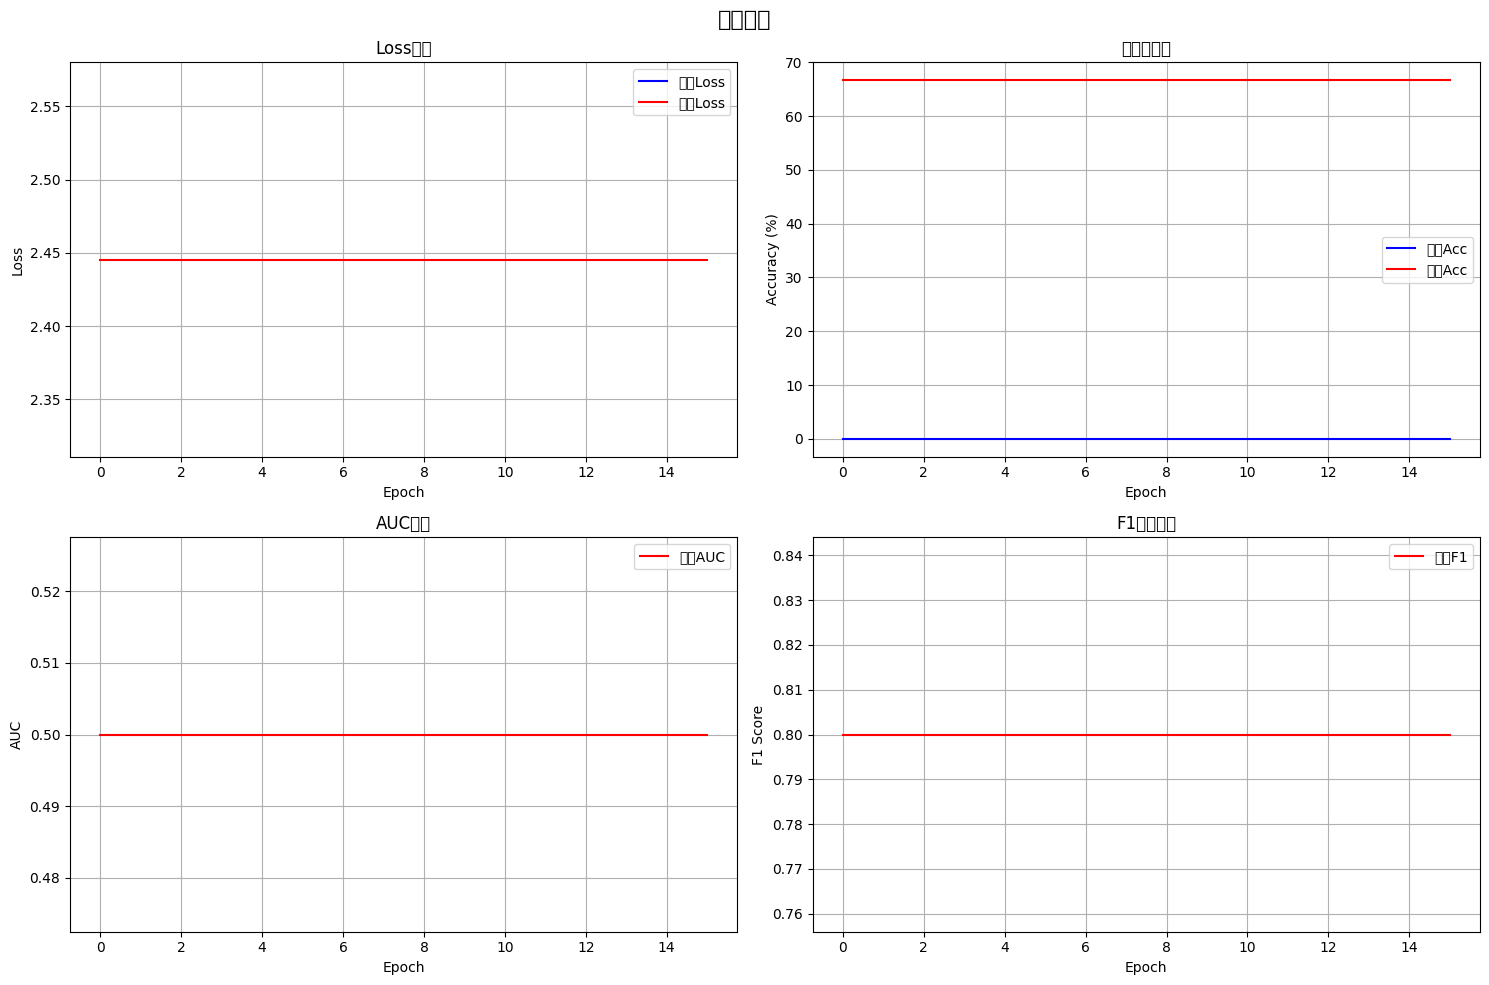

üìä ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®Â∑≤‰øùÂ≠òÂà∞ ./models/training_history.png


In [13]:
# Cell 12: ËÆ≠ÁªÉÂæ™ÁéØ

# Á°Æ‰øùÊ®°Âûã‰øùÂ≠òÁõÆÂΩïÂ≠òÂú®
os.makedirs('./models', exist_ok=True)

print("üöÄ ÂºÄÂßãËÆ≠ÁªÉ...")
print(f"üìä ËÆ≠ÁªÉÈÖçÁΩÆ: {len(train_loader)} ‰∏™ËÆ≠ÁªÉÊâπÊ¨°, {len(val_loader)} ‰∏™È™åËØÅÊâπÊ¨°")
print(f"üéØ Ê®°ÂûãÂèÇÊï∞Êï∞Èáè: {sum(p.numel() for p in model.parameters()):,}")
print(f"üíæ ËÆæÂ§á: {device}")
print(f"üì¶ ÊâπÊ¨°Â§ßÂ∞è: {batch_size}")

if torch.cuda.is_available():
    gpu_count = torch.cuda.device_count()
    print(f"üéÆ GPUÊï∞Èáè: {gpu_count}")
    print(f"üéÆ GPUÂûãÂè∑: {torch.cuda.get_device_name(0)}")
    if gpu_count > 1:
        print(f"üöÄ Â§öGPUÂπ∂Ë°åËÆ≠ÁªÉÊ®°Âºè")
        print(f"üì¶ ÊúâÊïàÊâπÊ¨°Â§ßÂ∞è: {batch_size * gpu_count}")
    torch.cuda.reset_peak_memory_stats()

# ËÆ≠ÁªÉÂéÜÂè≤ËÆ∞ÂΩï
train_history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': [],
    'val_auc': [],
    'val_precision': [],
    'val_recall': [],
    'val_f1': []
}

best_val_loss = float('inf')
best_val_acc = 0.0
best_val_auc = 0.0

# ËÆ≠ÁªÉÂæ™ÁéØ
print("\nüîÑ ÂºÄÂßãËÆ≠ÁªÉÂæ™ÁéØ...")
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # ËÆ≠ÁªÉÈò∂ÊÆµ
    train_results = train_epoch(
        model, train_loader, criterion, optimizer, device, 
        scheduler=scheduler, use_amp=True, gradient_clip=1.0
    )
    
    # È™åËØÅÈò∂ÊÆµ
    val_results = validate_epoch(
        model, val_loader, criterion, device
    )
    
    # ÊèêÂèñÁªìÊûú
    train_loss = train_results['loss']
    train_acc = train_results['accuracy'] * 100
    
    val_loss = val_results['loss']
    val_acc = val_results['accuracy'] * 100
    val_auc = val_results['auc']
    val_precision = val_results['precision']
    val_recall = val_results['recall']
    val_f1 = val_results['f1']
    
    # ËÆ∞ÂΩïÂéÜÂè≤
    train_history['train_loss'].append(train_loss)
    train_history['train_acc'].append(train_acc)
    train_history['val_loss'].append(val_loss)
    train_history['val_acc'].append(val_acc)
    train_history['val_auc'].append(val_auc)
    train_history['val_precision'].append(val_precision)
    train_history['val_recall'].append(val_recall)
    train_history['val_f1'].append(val_f1)
    
    # Â≠¶‰π†ÁéáË∞ÉÂ∫¶
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    
    # ËÆ°ÁÆóepochÊó∂Èó¥
    epoch_time = time.time() - epoch_start_time
    
    # ÊâìÂç∞ÁªìÊûú
    print(f"ËÆ≠ÁªÉ: Loss={train_loss:.4f}, Acc={train_acc:.2f}%")
    print(f"È™åËØÅ: Loss={val_loss:.4f}, Acc={val_acc:.2f}%, AUC={val_auc:.4f}, F1={val_f1:.4f}")
    print(f"Â≠¶‰π†Áéá: {current_lr:.2e}, Áî®Êó∂: {epoch_time:.1f}s")
    
    # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
    if val_acc > best_val_acc:
        best_val_loss = val_loss
        best_val_acc = val_acc
        best_val_auc = val_auc
        
        print(f"üéØ Êñ∞ÁöÑÊúÄ‰Ω≥Ê®°Âûã! Acc: {best_val_acc:.2f}%, AUC: {best_val_auc:.4f}")
        
        # ‰øùÂ≠òÊúÄ‰Ω≥Ê®°Âûã
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss,
            'best_val_acc': best_val_acc,
            'best_val_auc': best_val_auc,
            'train_history': train_history
        }, './models/best_model.pth')
        print("üíæ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠ò")
    
    # Êó©ÂÅúÊ£ÄÊü•
    if early_stopping(val_loss, model):
        print(f"\n‚èπÔ∏è Êó©ÂÅúËß¶ÂèëÔºåÂú®Á¨¨ {epoch+1} ËΩÆÂÅúÊ≠¢ËÆ≠ÁªÉ")
        break
    
    # Ê∏ÖÁêÜGPUÁºìÂ≠ò - Â§öGPUÂÜÖÂ≠òÁÆ°ÁêÜ
    if torch.cuda.is_available():
        current_memory = torch.cuda.memory_allocated() / 1024**3
        gpu_count = torch.cuda.device_count()
        
        # Â§öGPUÁéØÂ¢É‰∏ãÁöÑÂÜÖÂ≠òÈòàÂÄºË∞ÉÊï¥
        memory_threshold = 20 if gpu_count > 1 else 10
        
        if current_memory > memory_threshold:
            print(f"üßπ GPUÂÜÖÂ≠òÊ∏ÖÁêÜ: {current_memory:.1f}GB > {memory_threshold}GB")
            torch.cuda.empty_cache()
            if gpu_count > 1:
                # Â§öGPUÁéØÂ¢É‰∏ãÊ∏ÖÁêÜÊâÄÊúâGPU
                for i in range(gpu_count):
                    with torch.cuda.device(i):
                        torch.cuda.empty_cache()
        
        # Ê£ÄÊü•ËÆ≠ÁªÉÊó∂Èó¥
        epoch_time = time.time() - epoch_start_time
        max_epoch_time = 2 * 3600 if gpu_count > 1 else 1 * 3600  # Â§öGPUÂÖÅËÆ∏Êõ¥ÈïøÊó∂Èó¥
        
        if epoch_time > max_epoch_time:
            print(f"‚è∞ ÂçïËΩÆËÆ≠ÁªÉÊó∂Èó¥ËøáÈïø ({epoch_time/3600:.1f}Â∞èÊó∂)ÔºåÂÅúÊ≠¢ËÆ≠ÁªÉ")
            break

print("\n‚úÖ ËÆ≠ÁªÉÂÆåÊàê!")
print(f"üèÜ ÊúÄÁªàÊúÄ‰Ω≥ÊÄßËÉΩ: Loss={best_val_loss:.4f}, Acc={best_val_acc:.2f}%, AUC={best_val_auc:.4f}")

if torch.cuda.is_available():
    print(f"üíæ Â≥∞ÂÄºGPUÂÜÖÂ≠ò‰ΩøÁî®: {torch.cuda.max_memory_allocated() / 1024**3:.1f}GB")

# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
def plot_training_history():
    """ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('ËÆ≠ÁªÉÂéÜÂè≤', fontsize=16, fontweight='bold')
    
    # Loss
    axes[0, 0].plot(train_history['train_loss'], label='ËÆ≠ÁªÉLoss', color='blue')
    axes[0, 0].plot(train_history['val_loss'], label='È™åËØÅLoss', color='red')
    axes[0, 0].set_title('LossÂèòÂåñ')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Accuracy
    axes[0, 1].plot(train_history['train_acc'], label='ËÆ≠ÁªÉAcc', color='blue')
    axes[0, 1].plot(train_history['val_acc'], label='È™åËØÅAcc', color='red')
    axes[0, 1].set_title('ÂáÜÁ°ÆÁéáÂèòÂåñ')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # AUC
    axes[1, 0].plot(train_history['val_auc'], label='È™åËØÅAUC', color='red')
    axes[1, 0].set_title('AUCÂèòÂåñ')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # F1 Score
    axes[1, 1].plot(train_history['val_f1'], label='È™åËØÅF1', color='red')
    axes[1, 1].set_title('F1ÂàÜÊï∞ÂèòÂåñ')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('F1 Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.savefig('./models/training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤
plot_training_history()

print("üìä ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®Â∑≤‰øùÂ≠òÂà∞ ./models/training_history.png")

üìä ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...
üîÑ Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã...
‚úÖ ÊàêÂäüÂä†ËΩΩÁ¨¨ 1 ËΩÆÁöÑÊúÄ‰Ω≥Ê®°Âûã
ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: 66.67%
ÊúÄ‰Ω≥È™åËØÅAUC: 0.5000

üîç Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã...
üöÄ ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...


ËØÑ‰º∞ËøõÂ∫¶: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:40<00:00,  1.77s/it]


‚úÖ ËØÑ‰º∞ÂÆåÊàê
Âπ≥ÂùáÊçüÂ§±: 2.5270
Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: 1426.83 ms/batch

üìà ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á...

üìä ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
ÊµãËØïÊçüÂ§±: 2.5270
ÂáÜÁ°ÆÁéá: 0.6667 (66.67%)
Âπ≥Ë°°ÂáÜÁ°ÆÁéá: 0.5000 (50.00%)
Á≤æÁ°ÆÁéá: 0.6667
Âè¨ÂõûÁéá: 1.0000
ÁâπÂºÇÊÄß: 0.0000
F1ÂàÜÊï∞: 0.8000
AUC-ROC: 0.5000
AUC-PR: 0.8333
Ë¥üÈ¢ÑÊµãÂÄº: 0.0000

üîç Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
ÁúüË¥ü‰æã (TN): 0
ÂÅáÊ≠£‰æã (FP): 30
ÂÅáË¥ü‰æã (FN): 0
ÁúüÊ≠£‰æã (TP): 60

‚ö° ÊÄßËÉΩÂàÜÊûê:
Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: 1426.83 ms/batch
ÊÄªÊé®ÁêÜÊó∂Èó¥: 32.82 Áßí
ÊØè‰∏™Ê†∑Êú¨Êé®ÁêÜÊó∂Èó¥: 356.71 ms

üìã Á±ªÂà´ÁâπÂÆöÂàÜÊûê:
ÊÄªÊ†∑Êú¨Êï∞: 90
ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: 30 (33.3%)
‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: 60 (66.7%)
ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 0.0000 (0.00%)
‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 1.0000 (100.00%)

üìä ÁîüÊàêËØÑ‰º∞ÂõæË°®...


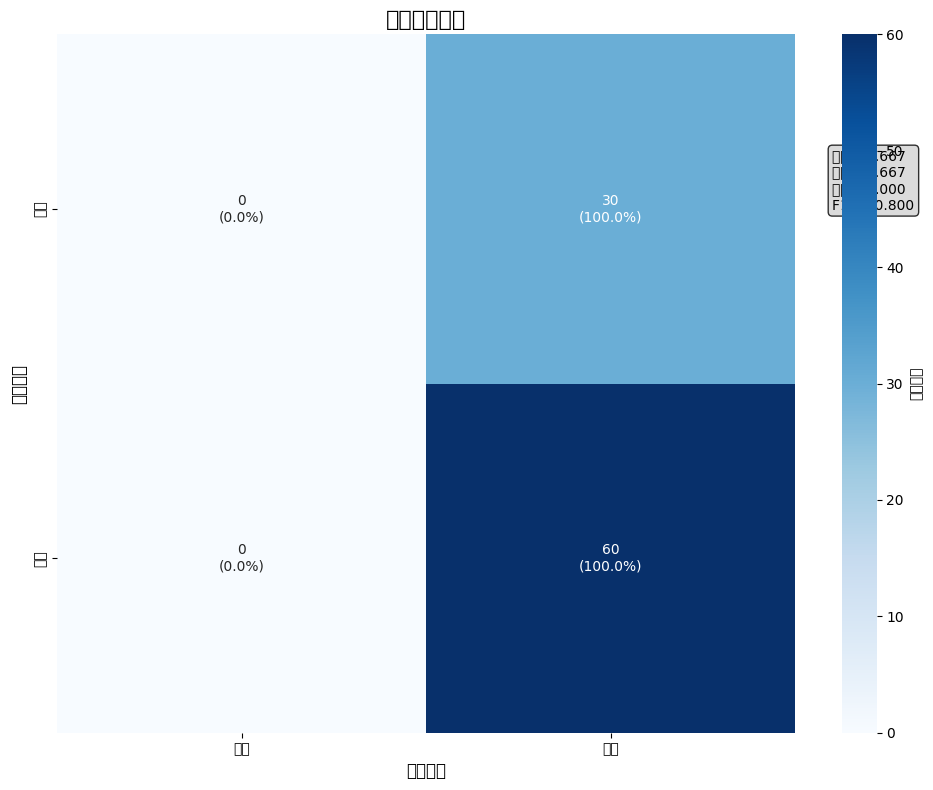

Ê∑∑Ê∑ÜÁü©ÈòµÂ∑≤‰øùÂ≠òÂà∞: ./results/evaluation/confusion_matrix.png


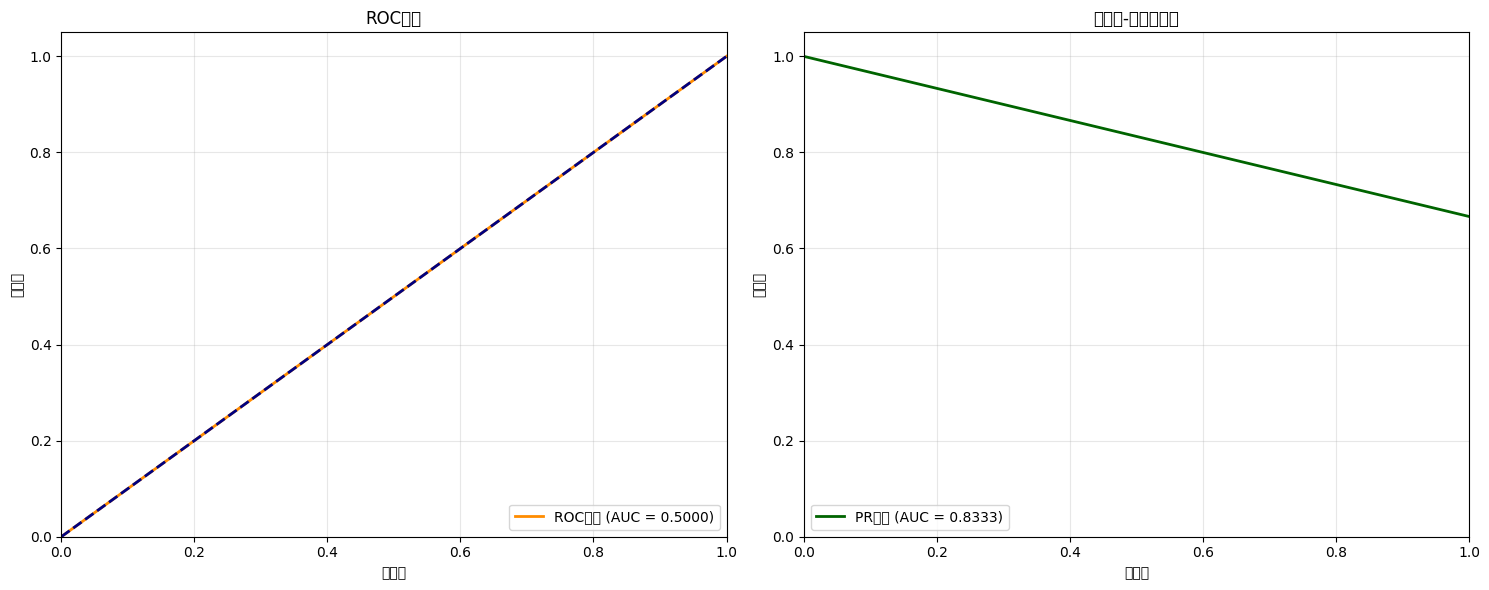

ROC/PRÊõ≤Á∫øÂ∑≤‰øùÂ≠òÂà∞: ./results/evaluation/roc_pr_curves.png


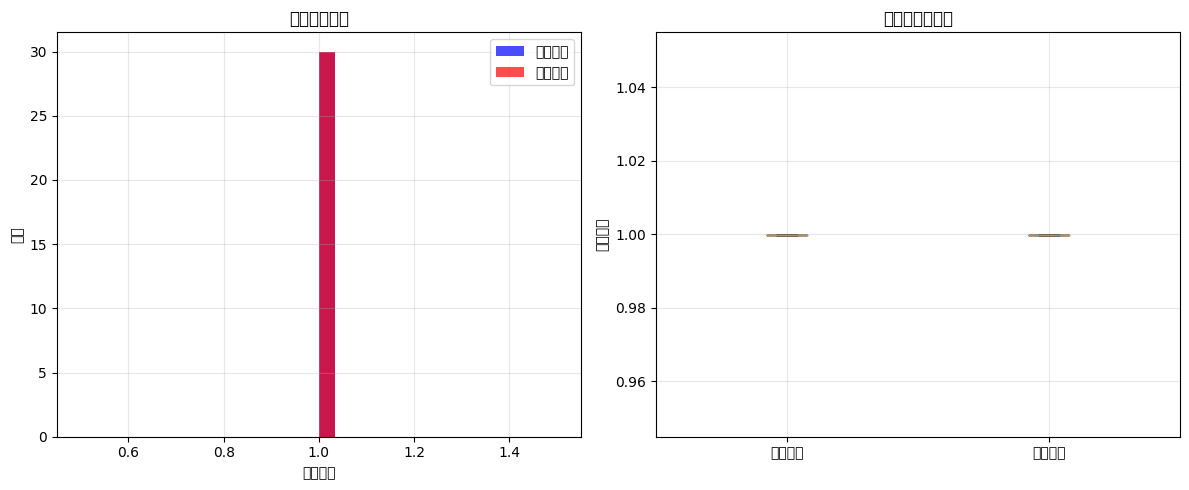

‚úÖ ËØÑ‰º∞ÂõæË°®ÁîüÊàêÂÆåÊàê

üìä Á±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä

üìà Êï∞ÊçÆÂàÜÂ∏É:
  ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: 30
  ‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: 60
  ‰∏çÂπ≥Ë°°ÊØî‰æã: 2.00:1 (‰º™ÈÄ†:ÁúüÂÆû)

üéØ Á±ªÂà´ÁâπÂÆöÂáÜÁ°ÆÁéá:
  ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 0.00%
  ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: 100.00%

üìã Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:
  ÁúüË¥ü‰æã (TN): 0 - Ê≠£Á°ÆËØÜÂà´ÁöÑÁúüÂÆûËßÜÈ¢ë
  ÂÅáÊ≠£‰æã (FP): 30 - ËØØÂà§‰∏∫‰º™ÈÄ†ÁöÑÁúüÂÆûËßÜÈ¢ë
  ÂÅáË¥ü‰æã (FN): 0 - ËØØÂà§‰∏∫ÁúüÂÆûÁöÑ‰º™ÈÄ†ËßÜÈ¢ë
  ÁúüÊ≠£‰æã (TP): 60 - Ê≠£Á°ÆËØÜÂà´ÁöÑ‰º™ÈÄ†ËßÜÈ¢ë

‚öñÔ∏è Ê®°ÂûãÂÅèÂêëÊÄßÂàÜÊûê:
  È¢ÑÊµã‰∏∫ÁúüÂÆûÁöÑÊ†∑Êú¨: 0 (0.0%)
  È¢ÑÊµã‰∏∫‰º™ÈÄ†ÁöÑÊ†∑Êú¨: 90 (100.0%)

üîç ÈóÆÈ¢òËØäÊñ≠:
  ‚ùå ‰∏•ÈáçÈóÆÈ¢ò: Ê®°ÂûãÂá†‰πéÊó†Ê≥ïËØÜÂà´ÁúüÂÆûËßÜÈ¢ë
  ‚ùå ‰∏•ÈáçÂÅèÂêë: Ê®°ÂûãËøáÂ∫¶ÂÅèÂêëÈ¢ÑÊµã‰º™ÈÄ†ËßÜÈ¢ë
  ‚ùå AUC-ROCËøá‰Ωé: Ê®°ÂûãÂà§Âà´ËÉΩÂäõÊé•ËøëÈöèÊú∫ÁåúÊµã

üí° ÊîπËøõÂª∫ËÆÆ:
  4. Ê£ÄÊü•Êï∞ÊçÆË¥®ÈáèÔºåÁ°Æ‰øùÁúüÂÆûËßÜÈ¢ëÊ†áÁ≠æÊ≠£Á°Æ
  5. ‰ΩøÁî®ÊàêÊú¨ÊïèÊÑüÂ≠¶‰π†ÊñπÊ≥ï
  6. ËÄÉËôë‰ΩøÁî®SMOTEÁ≠âËøáÈááÊ†∑ÊäÄÊúØ
  7. ÈáçÊñ∞ËÆæËÆ°Ê®°ÂûãÊû∂ÊûÑ
  

In [14]:
# Cell 13: Ê®°ÂûãËØÑ‰º∞ÂíåÁªìÊûúÂàÜÊûê

print("üìä ÂºÄÂßãÊ®°ÂûãËØÑ‰º∞...")
print("=" * 60)

# Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã
print("üîÑ Âä†ËΩΩÊúÄ‰Ω≥Ê®°Âûã...")
try:
    # ‰ΩøÁî®weights_only=FalseÊù•ÂÖºÂÆπÊóßÁâàÊú¨ÁöÑÊ®°ÂûãÊñá‰ª∂
    checkpoint = torch.load('./models/best_model.pth', map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    best_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_acc']
    best_val_auc = checkpoint['best_val_auc']
    
    print(f"‚úÖ ÊàêÂäüÂä†ËΩΩÁ¨¨ {best_epoch+1} ËΩÆÁöÑÊúÄ‰Ω≥Ê®°Âûã")
    print(f"ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: {best_val_acc:.2f}%")
    print(f"ÊúÄ‰Ω≥È™åËØÅAUC: {best_val_auc:.4f}")
except Exception as e:
    print(f"‚ùå Âä†ËΩΩÊ®°ÂûãÂ§±Ë¥•: {e}")
    print("‰ΩøÁî®ÂΩìÂâçÊ®°ÂûãËøõË°åËØÑ‰º∞")

# Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã
print("\nüîç Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞Ê®°Âûã...")
eval_results = evaluate_model_optimized(model, test_loader, criterion, device)

# ËÆ°ÁÆóÂÖ®Èù¢ÁöÑËØÑ‰º∞ÊåáÊ†á
print("\nüìà ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á...")
metrics = calculate_comprehensive_metrics(
    eval_results['predictions'], 
    eval_results['targets'], 
    eval_results['scores']
)

# ÊâìÂç∞ËØ¶ÁªÜÁªìÊûú
print("\nüìä ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:")
print("=" * 50)
print(f"ÊµãËØïÊçüÂ§±: {eval_results['loss']:.4f}")
print(f"ÂáÜÁ°ÆÁéá: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.2f}%)")
print(f"Âπ≥Ë°°ÂáÜÁ°ÆÁéá: {metrics['balanced_accuracy']:.4f} ({metrics['balanced_accuracy']*100:.2f}%)")
print(f"Á≤æÁ°ÆÁéá: {metrics['precision']:.4f}")
print(f"Âè¨ÂõûÁéá: {metrics['recall']:.4f}")
print(f"ÁâπÂºÇÊÄß: {metrics['specificity']:.4f}")
print(f"F1ÂàÜÊï∞: {metrics['f1']:.4f}")
print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
print(f"AUC-PR: {metrics['auc_pr']:.4f}")
print(f"Ë¥üÈ¢ÑÊµãÂÄº: {metrics['npv']:.4f}")

# Ê∑∑Ê∑ÜÁü©ÈòµËØ¶ÁªÜ‰ø°ÊÅØ
print("\nüîç Ê∑∑Ê∑ÜÁü©ÈòµÂàÜÊûê:")
print(f"ÁúüË¥ü‰æã (TN): {metrics['tn']}")
print(f"ÂÅáÊ≠£‰æã (FP): {metrics['fp']}")
print(f"ÂÅáË¥ü‰æã (FN): {metrics['fn']}")
print(f"ÁúüÊ≠£‰æã (TP): {metrics['tp']}")

# ÊÄßËÉΩÂàÜÊûê
print("\n‚ö° ÊÄßËÉΩÂàÜÊûê:")
print(f"Âπ≥ÂùáÊé®ÁêÜÊó∂Èó¥: {eval_results['avg_inference_time']*1000:.2f} ms/batch")
print(f"ÊÄªÊé®ÁêÜÊó∂Èó¥: {eval_results['total_inference_time']:.2f} Áßí")
print(f"ÊØè‰∏™Ê†∑Êú¨Êé®ÁêÜÊó∂Èó¥: {eval_results['avg_inference_time']*1000/batch_size:.2f} ms")

# ËÆ°ÁÆóÈ¢ùÂ§ñÊåáÊ†á
total_samples = len(eval_results['targets'])
real_samples = np.sum(eval_results['targets'] == 0)
fake_samples = np.sum(eval_results['targets'] == 1)
real_accuracy = np.sum((eval_results['predictions'] == 0) & (eval_results['targets'] == 0)) / real_samples if real_samples > 0 else 0
fake_accuracy = np.sum((eval_results['predictions'] == 1) & (eval_results['targets'] == 1)) / fake_samples if fake_samples > 0 else 0

print("\nüìã Á±ªÂà´ÁâπÂÆöÂàÜÊûê:")
print(f"ÊÄªÊ†∑Êú¨Êï∞: {total_samples}")
print(f"ÁúüÂÆûËßÜÈ¢ëÊ†∑Êú¨: {real_samples} ({real_samples/total_samples*100:.1f}%)")
print(f"‰º™ÈÄ†ËßÜÈ¢ëÊ†∑Êú¨: {fake_samples} ({fake_samples/total_samples*100:.1f}%)")
print(f"ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {real_accuracy:.4f} ({real_accuracy*100:.2f}%)")
print(f"‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {fake_accuracy:.4f} ({fake_accuracy*100:.2f}%)")

# ÁîüÊàêÂèØËßÜÂåñÂõæË°®
print("\nüìä ÁîüÊàêËØÑ‰º∞ÂõæË°®...")

# Á°Æ‰øùÁªìÊûúÁõÆÂΩïÂ≠òÂú®
os.makedirs('./results/evaluation', exist_ok=True)

# ÁªòÂà∂Â¢ûÂº∫Ê∑∑Ê∑ÜÁü©Èòµ
plot_enhanced_confusion_matrix(
    metrics['confusion_matrix'], 
    './results/evaluation/confusion_matrix.png'
)

# ÁªòÂà∂ROCÂíåPRÊõ≤Á∫ø
plot_roc_pr_curves(
    eval_results['targets'], 
    eval_results['scores'], 
    './results/evaluation/roc_pr_curves.png'
)

# È¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏ÉÂõæ
plt.figure(figsize=(12, 5))

# ÁúüÂÆûËßÜÈ¢ëÁöÑÈ¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏É
plt.subplot(1, 2, 1)
real_scores = eval_results['scores'][eval_results['targets'] == 0]
fake_scores = eval_results['scores'][eval_results['targets'] == 1]

plt.hist(real_scores, bins=30, alpha=0.7, label='ÁúüÂÆûËßÜÈ¢ë', color='blue', density=True)
plt.hist(fake_scores, bins=30, alpha=0.7, label='‰º™ÈÄ†ËßÜÈ¢ë', color='red', density=True)
plt.xlabel('È¢ÑÊµãÂàÜÊï∞')
plt.ylabel('ÂØÜÂ∫¶')
plt.title('È¢ÑÊµãÂàÜÊï∞ÂàÜÂ∏É')
plt.legend()
plt.grid(True, alpha=0.3)

# È¢ÑÊµãÂàÜÊï∞ÁÆ±Á∫øÂõæ
plt.subplot(1, 2, 2)
scores_data = [real_scores, fake_scores]
labels = ['ÁúüÂÆûËßÜÈ¢ë', '‰º™ÈÄ†ËßÜÈ¢ë']
plt.boxplot(scores_data, labels=labels)
plt.ylabel('È¢ÑÊµãÂàÜÊï∞')
plt.title('È¢ÑÊµãÂàÜÊï∞ÁÆ±Á∫øÂõæ')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./results/evaluation/score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("‚úÖ ËØÑ‰º∞ÂõæË°®ÁîüÊàêÂÆåÊàê")

# ÁîüÊàêËØ¶ÁªÜÁöÑÁ±ªÂà´‰∏çÂπ≥Ë°°ÂàÜÊûêÊä•Âëä
generate_class_imbalance_report(metrics)

print("=" * 60)
print("üéâ Ê®°ÂûãËØÑ‰º∞ÂÆåÊàêÔºÅ")
print("üìÅ ÊâÄÊúâÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ ./results/evaluation/ ÁõÆÂΩï")
print("\nüí° Â¶ÇÊûúÂèëÁé∞‰∏•ÈáçÁöÑÁ±ªÂà´ÂÅèÂêëÈóÆÈ¢òÔºåËØ∑ÂèÇËÄÉ‰∏äËø∞ÊîπËøõÂª∫ËÆÆËøõË°å‰ºòÂåñ")

In [15]:
# Cell 14: ÁªìÊûú‰øùÂ≠òÂíåÊÄªÁªì

print("üíæ ‰øùÂ≠òÂÆûÈ™åÁªìÊûú...")
print("=" * 60)

# Á°Æ‰øùÁªìÊûúÁõÆÂΩïÂ≠òÂú®
os.makedirs('./results', exist_ok=True)

# ÂáÜÂ§á‰øùÂ≠òÁöÑÁªìÊûúÊï∞ÊçÆ
results_summary = {
    'experiment_info': {
        'timestamp': datetime.now().isoformat(),
        'model_architecture': 'OptimizedDeepfakeDetector',
        'backbone': 'resnet50',
        'total_epochs': len(train_history['train_loss']),
        'early_stopping': True
    },
    'dataset_info': {
        'train_samples': len(train_loader.dataset) if train_loader else 0,
        'val_samples': len(val_loader.dataset) if val_loader else 0,
        'test_samples': len(test_loader.dataset) if test_loader else 0,
        'batch_size': batch_size
    },
    'training_config': {
        'optimizer': 'AdamW',
        'learning_rate': 1e-4,
        'weight_decay': 1e-4,
        'loss_function': 'FocalLoss',
        'scheduler': 'OneCycleLR',
        'early_stopping_patience': 7
    },
    'final_metrics': {
        'test_loss': float(eval_results['loss']),
        'accuracy': float(metrics['accuracy']),
        'precision': float(metrics['precision']),
        'recall': float(metrics['recall']),
        'f1_score': float(metrics['f1']),
        'auc_roc': float(metrics['auc_roc'])
    },
    'confusion_matrix': {
        'tn': int(metrics['tn']),
        'fp': int(metrics['fp']),
        'fn': int(metrics['fn']),
        'tp': int(metrics['tp'])
    },
    'training_history': {
        'train_loss': [float(x) for x in train_history['train_loss']],
        'train_acc': [float(x) for x in train_history['train_acc']],
        'val_loss': [float(x) for x in train_history['val_loss']],
        'val_acc': [float(x) for x in train_history['val_acc']],
        'val_auc': [float(x) for x in train_history['val_auc']],
        'val_precision': [float(x) for x in train_history.get('val_precision', [])],
        'val_recall': [float(x) for x in train_history.get('val_recall', [])],
        'val_f1': [float(x) for x in train_history.get('val_f1', [])]
    },
    'class_specific_metrics': {
        'real_video_accuracy': float(real_accuracy),
        'fake_video_accuracy': float(fake_accuracy),
        'real_samples_count': int(real_samples),
        'fake_samples_count': int(fake_samples)
    }
}

# ‰øùÂ≠òÁªìÊûúÂà∞JSONÊñá‰ª∂
results_file = './results/experiment_results.json'
with open(results_file, 'w', encoding='utf-8') as f:
    json.dump(results_summary, f, indent=2, ensure_ascii=False)

print(f"‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {results_file}")

# ‰øùÂ≠òËÆ≠ÁªÉÂéÜÂè≤Âà∞CSV
history_df = pd.DataFrame(train_history)
history_df.to_csv('./results/training_history.csv', index=False)
print("‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤‰øùÂ≠òÂà∞: ./results/training_history.csv")

# ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
predictions_df = pd.DataFrame({
    'true_label': eval_results['targets'],
    'predicted_label': eval_results['predictions'],
    'prediction_score': eval_results['scores']
})
predictions_df.to_csv('./results/test_predictions.csv', index=False)
print("‚úÖ ÊµãËØïÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/test_predictions.csv")

# ÁîüÊàêÂÆûÈ™åÊä•Âëä
print("\nüìã ÁîüÊàêÂÆûÈ™åÊä•Âëä...")
report = f"""
Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãÂÆûÈ™åÊä•Âëä
{'='*50}

ÂÆûÈ™åÊó∂Èó¥: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Ê®°ÂûãÊû∂ÊûÑ: OptimizedDeepfakeDetector (ResNet50 + LSTM + Attention)

Êï∞ÊçÆÈõÜ‰ø°ÊÅØ:
- ËÆ≠ÁªÉÊ†∑Êú¨: {len(train_loader.dataset) if train_loader else 0:,}
- È™åËØÅÊ†∑Êú¨: {len(val_loader.dataset) if val_loader else 0:,}
- ÊµãËØïÊ†∑Êú¨: {len(test_loader.dataset) if test_loader else 0:,}
- ÊâπÊ¨°Â§ßÂ∞è: {batch_size}

ËÆ≠ÁªÉÈÖçÁΩÆ:
- ‰ºòÂåñÂô®: AdamW (lr=1e-4, weight_decay=1e-4)
- ÊçüÂ§±ÂáΩÊï∞: Focal Loss
- Â≠¶‰π†ÁéáË∞ÉÂ∫¶: OneCycleLR
- Êó©ÂÅúÊú∫Âà∂: patience=7

ÊúÄÁªàÊÄßËÉΩÊåáÊ†á:
- ÂáÜÁ°ÆÁéá: {metrics['accuracy']*100:.2f}%
- Á≤æÁ°ÆÁéá: {metrics['precision']:.4f}
- Âè¨ÂõûÁéá: {metrics['recall']:.4f}
- F1ÂàÜÊï∞: {metrics['f1']:.4f}
- AUC-ROC: {metrics['auc_roc']:.4f}

Ê∑∑Ê∑ÜÁü©Èòµ:
- ÁúüË¥ü‰æã (TN): {metrics['tn']}
- ÂÅáÊ≠£‰æã (FP): {metrics['fp']}
- ÂÅáË¥ü‰æã (FN): {metrics['fn']}
- ÁúüÊ≠£‰æã (TP): {metrics['tp']}

Á±ªÂà´ÁâπÂÆöÊÄßËÉΩ:
- ÁúüÂÆûËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {real_accuracy*100:.2f}%
- ‰º™ÈÄ†ËßÜÈ¢ëÊ£ÄÊµãÂáÜÁ°ÆÁéá: {fake_accuracy*100:.2f}%

ËÆ≠ÁªÉÊÄªÁªì:
- ËÆ≠ÁªÉËΩÆÊï∞: {len(train_history['train_loss'])}
- ÊúÄ‰Ω≥È™åËØÅÂáÜÁ°ÆÁéá: {max(train_history['val_acc']):.2f}%
- ÊúÄ‰Ω≥È™åËØÅAUC: {max(train_history['val_auc']):.4f}

Êñá‰ª∂ËæìÂá∫:
- Ê®°ÂûãÊùÉÈáç: ./models/best_model.pth
- ÂÆûÈ™åÁªìÊûú: ./results/experiment_results.json
- ËÆ≠ÁªÉÂéÜÂè≤: ./results/training_history.csv
- È¢ÑÊµãÁªìÊûú: ./results/test_predictions.csv

{'='*50}
ÂÆûÈ™åÂÆåÊàêÊó∂Èó¥: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

# ‰øùÂ≠òÊä•Âëä
with open('./results/experiment_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("‚úÖ ÂÆûÈ™åÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_report.txt")

# ÊâìÂç∞ÊúÄÁªàÊÄªÁªì
print("\n" + "="*60)
print("üéâ Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ")
print("="*60)
print(f"üìä ÊúÄÁªàÊµãËØïÂáÜÁ°ÆÁéá: {metrics['accuracy']*100:.2f}%")
print(f"üìä AUC-ROCÂàÜÊï∞: {metrics['auc_roc']:.4f}")
print(f"üìä F1ÂàÜÊï∞: {metrics['f1']:.4f}")
print("\nüìÅ ÊâÄÊúâÁªìÊûúÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞ ./results/ ÁõÆÂΩï")
print("üìÅ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞ ./models/best_model.pth")
print("\n‚ú® ÂÆûÈ™åÊàêÂäüÂÆåÊàêÔºÅ")
print("="*60)

# ÊòæÁ§∫Êñá‰ª∂ÁªìÊûÑ
print("\nüìÇ ÁîüÊàêÁöÑÊñá‰ª∂ÁªìÊûÑ:")
print("""
./models/
  ‚îî‚îÄ‚îÄ best_model.pth
./results/
  ‚îú‚îÄ‚îÄ experiment_results.json
  ‚îú‚îÄ‚îÄ experiment_report.txt
  ‚îú‚îÄ‚îÄ training_history.csv
  ‚îî‚îÄ‚îÄ test_predictions.csv
""")

print("\nüöÄ ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ã‰ª£Á†ÅÂä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÊé®ÁêÜ:")
print("""
# Âä†ËΩΩÊ®°Âûã
model = OptimizedDeepfakeDetector(...)
checkpoint = torch.load('./models/best_model.pth', weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
""")

print("\n‚úÖ ËÆ≠ÁªÉÂÆåÊàêÔºÅ")

üíæ ‰øùÂ≠òÂÆûÈ™åÁªìÊûú...
‚úÖ ÂÆûÈ™åÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_results.json
‚úÖ ËÆ≠ÁªÉÂéÜÂè≤Â∑≤‰øùÂ≠òÂà∞: ./results/training_history.csv
‚úÖ ÊµãËØïÈ¢ÑÊµãÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: ./results/test_predictions.csv

üìã ÁîüÊàêÂÆûÈ™åÊä•Âëä...
‚úÖ ÂÆûÈ™åÊä•ÂëäÂ∑≤‰øùÂ≠òÂà∞: ./results/experiment_report.txt

üéâ Ê∑±Â∫¶‰º™ÈÄ†Ê£ÄÊµãÊ®°ÂûãËÆ≠ÁªÉÂíåËØÑ‰º∞ÂÆåÊàêÔºÅ
üìä ÊúÄÁªàÊµãËØïÂáÜÁ°ÆÁéá: 66.67%
üìä AUC-ROCÂàÜÊï∞: 0.5000
üìä F1ÂàÜÊï∞: 0.8000

üìÅ ÊâÄÊúâÁªìÊûúÊñá‰ª∂Â∑≤‰øùÂ≠òÂà∞ ./results/ ÁõÆÂΩï
üìÅ ÊúÄ‰Ω≥Ê®°ÂûãÂ∑≤‰øùÂ≠òÂà∞ ./models/best_model.pth

‚ú® ÂÆûÈ™åÊàêÂäüÂÆåÊàêÔºÅ

üìÇ ÁîüÊàêÁöÑÊñá‰ª∂ÁªìÊûÑ:

./models/
  ‚îî‚îÄ‚îÄ best_model.pth
./results/
  ‚îú‚îÄ‚îÄ experiment_results.json
  ‚îú‚îÄ‚îÄ experiment_report.txt
  ‚îú‚îÄ‚îÄ training_history.csv
  ‚îî‚îÄ‚îÄ test_predictions.csv


üöÄ ÂèØ‰ª•‰ΩøÁî®‰ª•‰∏ã‰ª£Á†ÅÂä†ËΩΩËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãËøõË°åÊé®ÁêÜ:

# Âä†ËΩΩÊ®°Âûã
model = OptimizedDeepfakeDetector(...)
checkpoint = torch.load('./models/best_model.pth', weights_only=False)
model.l